In [1]:
# -*- coding: utf-8 -*-

In [2]:
import os
import sys
import logging
import gymnasium as gym
import torch

import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import importlib
import cyberbattle._env.cyberbattle_env as cyberbattle_env
import cyberbattle._env.cyberbattle_chain as cyberbattle_chain

importlib.reload(learner)
importlib.reload(cyberbattle_env)
importlib.reload(cyberbattle_chain)

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

%matplotlib inline

In [3]:
plots_dir = "notebooks/output/transfer_dql/plots"
plot_prefix = "transfer_dql"

from pathlib import Path
import matplotlib.pyplot as plt

PLOTS_DIR = Path(plots_dir)
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

_plot_idx = 0
def _next_name(name=None):
    global _plot_idx
    _plot_idx += 1
    return name or f"{plot_prefix}-{_plot_idx:03d}"

def save_png_mpl(fig=None, name=None):
    out = PLOTS_DIR / f"{_next_name(name)}.png"
    f = fig if fig is not None else plt.gcf()
    f.savefig(out, dpi=200, bbox_inches="tight")

_orig_plt_show = plt.show
def _plt_show(*args, **kwargs):
    save_png_mpl(plt.gcf())
    ret = _orig_plt_show(*args, **kwargs)
    return ret

plt.show = _plt_show

In [4]:
torch.cuda.is_available()

False

In [5]:
cyberbattlechain_4 = gym.make("CyberBattleChain-v0", size=4, attacker_goal=cyberbattle_env.AttackerGoal(own_atleast_percent=1.0)).unwrapped
cyberbattlechain_10 = gym.make("CyberBattleChain-v0", size=10, attacker_goal=cyberbattle_env.AttackerGoal(own_atleast_percent=1.0)).unwrapped
cyberbattlechain_20 = gym.make("CyberBattleChain-v0", size=20, attacker_goal=cyberbattle_env.AttackerGoal(own_atleast_percent=1.0)).unwrapped

assert isinstance(cyberbattlechain_4, cyberbattle_env.CyberBattleEnv)
assert isinstance(cyberbattlechain_10, cyberbattle_env.CyberBattleEnv)
assert isinstance(cyberbattlechain_20, cyberbattle_env.CyberBattleEnv)

ep = w.EnvironmentBounds.of_identifiers(maximum_total_credentials=22, maximum_node_count=22, identifiers=cyberbattlechain_10.identifiers)

In [ ]:
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 10
plots_dir = "output/plots"

In [7]:
# Parameters
iteration_count = 200
training_episode_count = 5
eval_episode_count = 2
plots_dir = "notebooks/output/transfer_dql/plots"


In [8]:
os.makedirs(plots_dir, exist_ok=True)

###### DQL
Learning with: episode_count=5,iteration_count=200,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/5 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 1|Iteration 12|reward:   18.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 1|Iteration 12|reward:   18.0|last_reward_at:   12|Elapsed Time: 0:00:00||

/mnt/c/Users/cabin/git_repo/CyberSecurity-RL/cyberbattle/agents/baseline/agent_dql.py:408: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /croot/libtorch_1751464468084/work/torch/csrc/utils/tensor_new.cpp:254.)
  state_batch = torch.tensor(states_to_consider).to(device)

Episode 1|Iteration 20|reward:   20.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 1|Iteration 20|reward:   20.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 1|Iteration 35|reward:  120.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 1|Iteration 35|reward:  120.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 1|Iteration 48|reward:  134.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 1|Iteration 48|reward:  134.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 1|Iteration 53|reward:  140.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 1|Iteration 53|reward:  140.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 1|Iteration 62|reward:  146.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 1|Iteration 62|reward:  146.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 1|Iteration 83|reward:  154.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 1|Iteration 83|reward:  154.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 1|Iteration 107|reward:  154.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 1|Iteration 135|reward:  254.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 1|Iteration 135|reward:  254.0|last_reward_at:  135|Elapsed Time: 0:00:00||


Episode 1|Iteration 143|reward:  265.0|last_reward_at:  135|Elapsed Time: 0:00:00||


Episode 1|Iteration 143|reward:  265.0|last_reward_at:  143|Elapsed Time: 0:00:00||


Episode 1|Iteration 153|reward:  267.0|last_reward_at:  143|Elapsed Time: 0:00:00||


Episode 1|Iteration 153|reward:  267.0|last_reward_at:  153|Elapsed Time: 0:00:00||


Episode 1|Iteration 162|reward:  276.0|last_reward_at:  153|Elapsed Time: 0:00:00||


Episode 1|Iteration 162|reward:  276.0|last_reward_at:  162|Elapsed Time: 0:00:00||


Episode 1|Iteration 190|reward:  276.0|last_reward_at:  162|Elapsed Time: 0:00:00||


Episode 1|Iteration 200|reward:  276.0|last_reward_at:  162|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/28 (0.15)
    explore-remote: 5/66 (0.07)
    explore-connect: 1/76 (0.01)
    exploit-local: 0/14 (0.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/4 (0.20)
  exploit deflected to exploration: 2
  ## Episode: 2/5 'DQL' ϵ=0.8688, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 2|Iteration 3|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 2|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 5|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 5|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 2|Iteration 9|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 2|Iteration 9|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 2|Iteration 14|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 2|Iteration 14|reward:  134.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 2|Iteration 18|reward:  142.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 2|Iteration 18|reward:  142.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 2|Iteration 28|reward:  148.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 2|Iteration 28|reward:  148.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 2|Iteration 42|reward:  154.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 2|Iteration 42|reward:  154.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 2|Iteration 84|reward:  154.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 2|Iteration 127|reward:  154.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 2|Iteration 143|reward:  254.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 2|Iteration 143|reward:  254.0|last_reward_at:  143|Elapsed Time: 0:00:00||


Episode 2|Iteration 153|reward:  268.0|last_reward_at:  143|Elapsed Time: 0:00:00||


Episode 2|Iteration 153|reward:  268.0|last_reward_at:  153|Elapsed Time: 0:00:00||


Episode 2|Iteration 172|reward:  272.0|last_reward_at:  153|Elapsed Time: 0:00:00||


Episode 2|Iteration 172|reward:  272.0|last_reward_at:  172|Elapsed Time: 0:00:00||


Episode 2|Iteration 180|reward:  278.0|last_reward_at:  172|Elapsed Time: 0:00:00||


Episode 2|Iteration 180|reward:  278.0|last_reward_at:  180|Elapsed Time: 0:00:00||


Episode 2|Iteration 200|reward:  278.0|last_reward_at:  180|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/29 (0.15)
    explore-remote: 5/77 (0.06)
    explore-connect: 2/61 (0.03)
    exploit-local: 0/15 (0.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/6 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'DQL' ϵ=0.8386, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 3|Iteration 6|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 3|Iteration 6|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 3|Iteration 10|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 3|Iteration 10|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 17|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 17|reward:  120.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 3|Iteration 27|reward:  131.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 3|Iteration 27|reward:  131.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 3|Iteration 35|reward:  140.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 3|Iteration 35|reward:  140.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 3|Iteration 45|reward:  148.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 3|Iteration 45|reward:  148.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 3|Iteration 49|reward:  248.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 3|Iteration 49|reward:  248.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 3|Iteration 53|reward:  254.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 3|Iteration 53|reward:  254.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 3|Iteration 57|reward:  268.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 3|Iteration 57|reward:  268.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 3|Iteration 59|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 3|Iteration 59|reward:  270.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 3|Iteration 70|reward:  276.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 3|Iteration 70|reward:  276.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 3|Iteration 72|reward:  280.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 3|Iteration 72|reward:  280.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 3|Iteration 90|reward:  280.0|last_reward_at:   72|Elapsed Time: 0:00:01||


Episode 3|Iteration 91|reward:  280.0|last_reward_at:   72|Elapsed Time: 0:00:02||


Episode 3|Iteration 92|reward:  280.0|last_reward_at:   72|Elapsed Time: 0:00:03||


Episode 3|Iteration 93|reward:  280.0|last_reward_at:   72|Elapsed Time: 0:00:04||


Episode 3|Iteration 94|reward:  280.0|last_reward_at:   72|Elapsed Time: 0:00:05||


Episode 3|Iteration 95|reward:  380.0|last_reward_at:   72|Elapsed Time: 0:00:07||


Episode 3|Iteration 95|reward:  380.0|last_reward_at:   95|Elapsed Time: 0:00:07||


Episode 3|Iteration 96|reward:  380.0|last_reward_at:   95|Elapsed Time: 0:00:09||


Episode 3|Iteration 97|reward:  380.0|last_reward_at:   95|Elapsed Time: 0:00:10||


Episode 3|Iteration 98|reward:  380.0|last_reward_at:   95|Elapsed Time: 0:00:12||


Episode 3|Iteration 99|reward:  380.0|last_reward_at:   95|Elapsed Time: 0:00:16||


Episode 3|Iteration 100|reward:  380.0|last_reward_at:   95|Elapsed Time: 0:00:25||


Episode 3|Iteration 101|reward:  380.0|last_reward_at:   95|Elapsed Time: 0:00:26||


Episode 3|Iteration 102|reward:  380.0|last_reward_at:   95|Elapsed Time: 0:00:28||


Episode 3|Iteration 103|reward:  380.0|last_reward_at:   95|Elapsed Time: 0:00:29||


Episode 3|Iteration 104|reward:  380.0|last_reward_at:   95|Elapsed Time: 0:00:31||


Episode 3|Iteration 105|reward:  380.0|last_reward_at:   95|Elapsed Time: 0:00:32||


Episode 3|Iteration 106|reward:  380.0|last_reward_at:   95|Elapsed Time: 0:00:34||


Episode 3|Iteration 107|reward:  380.0|last_reward_at:   95|Elapsed Time: 0:00:35||


Episode 3|Iteration 108|reward:  394.0|last_reward_at:   95|Elapsed Time: 0:00:44||


Episode 3|Iteration 108|reward:  394.0|last_reward_at:  108|Elapsed Time: 0:00:44||


Episode 3|Iteration 109|reward:  394.0|last_reward_at:  108|Elapsed Time: 0:00:45||


Episode 3|Iteration 110|reward:  394.0|last_reward_at:  108|Elapsed Time: 0:00:47||


Episode 3|Iteration 111|reward:  394.0|last_reward_at:  108|Elapsed Time: 0:00:48||


Episode 3|Iteration 112|reward:  394.0|last_reward_at:  108|Elapsed Time: 0:00:50||


Episode 3|Iteration 113|reward:  394.0|last_reward_at:  108|Elapsed Time: 0:00:52||


Episode 3|Iteration 114|reward:  394.0|last_reward_at:  108|Elapsed Time: 0:00:54||


Episode 3|Iteration 115|reward:  394.0|last_reward_at:  108|Elapsed Time: 0:00:55||


Episode 3|Iteration 116|reward:  394.0|last_reward_at:  108|Elapsed Time: 0:00:57||


Episode 3|Iteration 117|reward:  394.0|last_reward_at:  108|Elapsed Time: 0:00:59||


Episode 3|Iteration 118|reward:  394.0|last_reward_at:  108|Elapsed Time: 0:01:01||


Episode 3|Iteration 119|reward:  394.0|last_reward_at:  108|Elapsed Time: 0:01:03||


Episode 3|Iteration 120|reward:  402.0|last_reward_at:  108|Elapsed Time: 0:01:04||


Episode 3|Iteration 120|reward:  402.0|last_reward_at:  120|Elapsed Time: 0:01:04||


Episode 3|Iteration 121|reward:  402.0|last_reward_at:  120|Elapsed Time: 0:01:06||


Episode 3|Iteration 122|reward:  402.0|last_reward_at:  120|Elapsed Time: 0:01:08||


Episode 3|Iteration 123|reward:  402.0|last_reward_at:  120|Elapsed Time: 0:01:10||


Episode 3|Iteration 124|reward:  402.0|last_reward_at:  120|Elapsed Time: 0:01:12||


Episode 3|Iteration 125|reward:  402.0|last_reward_at:  120|Elapsed Time: 0:01:14||


Episode 3|Iteration 126|reward:  402.0|last_reward_at:  120|Elapsed Time: 0:01:15||


Episode 3|Iteration 127|reward:  502.0|last_reward_at:  120|Elapsed Time: 0:01:18||


Episode 3|Iteration 127|reward:  502.0|last_reward_at:  127|Elapsed Time: 0:01:18||


Episode 3|Iteration 128|reward:  502.0|last_reward_at:  127|Elapsed Time: 0:01:19||


Episode 3|Iteration 129|reward:  502.0|last_reward_at:  127|Elapsed Time: 0:01:21||


Episode 3|Iteration 130|reward:  516.0|last_reward_at:  127|Elapsed Time: 0:01:25||


Episode 3|Iteration 130|reward:  516.0|last_reward_at:  130|Elapsed Time: 0:01:25||


Episode 3|Iteration 131|reward:  516.0|last_reward_at:  130|Elapsed Time: 0:01:27||


Episode 3|Iteration 132|reward:  516.0|last_reward_at:  130|Elapsed Time: 0:01:28||


Episode 3|Iteration 133|reward:  516.0|last_reward_at:  130|Elapsed Time: 0:01:30||


Episode 3|Iteration 134|reward:  616.0|last_reward_at:  130|Elapsed Time: 0:01:32||


Episode 3|Iteration 134|reward:  616.0|last_reward_at:  134|Elapsed Time: 0:01:32||


Episode 3|Iteration 135|reward:  616.0|last_reward_at:  134|Elapsed Time: 0:01:34||


Episode 3|Iteration 136|reward:  616.0|last_reward_at:  134|Elapsed Time: 0:01:36||


Episode 3|Iteration 137|reward:  622.0|last_reward_at:  134|Elapsed Time: 0:01:37||


Episode 3|Iteration 137|reward:  622.0|last_reward_at:  137|Elapsed Time: 0:01:37||


Episode 3|Iteration 138|reward:  622.0|last_reward_at:  137|Elapsed Time: 0:01:39||


Episode 3|Iteration 139|reward:  622.0|last_reward_at:  137|Elapsed Time: 0:01:41||


Episode 3|Iteration 140|reward:  624.0|last_reward_at:  137|Elapsed Time: 0:01:43||


Episode 3|Iteration 140|reward:  624.0|last_reward_at:  140|Elapsed Time: 0:01:43||


Episode 3|Iteration 141|reward:  624.0|last_reward_at:  140|Elapsed Time: 0:01:44||


Episode 3|Iteration 142|reward:  624.0|last_reward_at:  140|Elapsed Time: 0:01:46||


Episode 3|Iteration 143|reward:  624.0|last_reward_at:  140|Elapsed Time: 0:01:48||


Episode 3|Iteration 144|reward:  630.0|last_reward_at:  140|Elapsed Time: 0:01:50||


Episode 3|Iteration 144|reward:  630.0|last_reward_at:  144|Elapsed Time: 0:01:50||


Episode 3|Iteration 145|reward:  630.0|last_reward_at:  144|Elapsed Time: 0:01:52||


Episode 3|Iteration 146|reward:  630.0|last_reward_at:  144|Elapsed Time: 0:01:53||


Episode 3|Iteration 147|reward:  630.0|last_reward_at:  144|Elapsed Time: 0:01:55||


Episode 3|Iteration 148|reward:  644.0|last_reward_at:  144|Elapsed Time: 0:01:57||


Episode 3|Iteration 148|reward:  644.0|last_reward_at:  148|Elapsed Time: 0:01:57||


Episode 3|Iteration 149|reward:  650.0|last_reward_at:  148|Elapsed Time: 0:01:58||


Episode 3|Iteration 149|reward:  650.0|last_reward_at:  149|Elapsed Time: 0:01:58||


Episode 3|Iteration 150|reward:  650.0|last_reward_at:  149|Elapsed Time: 0:02:00||


Episode 3|Iteration 151|reward:  650.0|last_reward_at:  149|Elapsed Time: 0:02:02||


Episode 3|Iteration 152|reward:  650.0|last_reward_at:  149|Elapsed Time: 0:02:04||


Episode 3|Iteration 153|reward:  650.0|last_reward_at:  149|Elapsed Time: 0:02:05||


Episode 3|Iteration 154|reward:  650.0|last_reward_at:  149|Elapsed Time: 0:02:07||


Episode 3|Iteration 155|reward:  750.0|last_reward_at:  149|Elapsed Time: 0:02:09||


Episode 3|Iteration 155|reward:  750.0|last_reward_at:  155|Elapsed Time: 0:02:09||


Episode 3|Iteration 156|reward:  750.0|last_reward_at:  155|Elapsed Time: 0:02:11||


Episode 3|Iteration 157|reward:  750.0|last_reward_at:  155|Elapsed Time: 0:02:13||


Episode 3|Iteration 158|reward:  750.0|last_reward_at:  155|Elapsed Time: 0:02:15||


Episode 3|Iteration 159|reward:  750.0|last_reward_at:  155|Elapsed Time: 0:02:16||


Episode 3|Iteration 160|reward:  750.0|last_reward_at:  155|Elapsed Time: 0:02:18||


Episode 3|Iteration 161|reward:  750.0|last_reward_at:  155|Elapsed Time: 0:02:20||


Episode 3|Iteration 162|reward:  750.0|last_reward_at:  155|Elapsed Time: 0:02:22||


Episode 3|Iteration 163|reward:  750.0|last_reward_at:  155|Elapsed Time: 0:02:23||


Episode 3|Iteration 164|reward:  750.0|last_reward_at:  155|Elapsed Time: 0:02:25||


Episode 3|Iteration 165|reward:  750.0|last_reward_at:  155|Elapsed Time: 0:02:27||


Episode 3|Iteration 166|reward:  756.0|last_reward_at:  155|Elapsed Time: 0:02:29||


Episode 3|Iteration 166|reward:  756.0|last_reward_at:  166|Elapsed Time: 0:02:29||


Episode 3|Iteration 167|reward:  756.0|last_reward_at:  166|Elapsed Time: 0:02:30||


Episode 3|Iteration 168|reward:  756.0|last_reward_at:  166|Elapsed Time: 0:02:32||


Episode 3|Iteration 169|reward:  756.0|last_reward_at:  166|Elapsed Time: 0:02:34||


Episode 3|Iteration 170|reward:  756.0|last_reward_at:  166|Elapsed Time: 0:02:35||


Episode 3|Iteration 171|reward:  756.0|last_reward_at:  166|Elapsed Time: 0:02:37||


Episode 3|Iteration 172|reward:  756.0|last_reward_at:  166|Elapsed Time: 0:02:39||


Episode 3|Iteration 173|reward:  756.0|last_reward_at:  166|Elapsed Time: 0:02:40||


Episode 3|Iteration 174|reward:  756.0|last_reward_at:  166|Elapsed Time: 0:02:42||


Episode 3|Iteration 175|reward:  756.0|last_reward_at:  166|Elapsed Time: 0:02:44||


Episode 3|Iteration 176|reward:  756.0|last_reward_at:  166|Elapsed Time: 0:02:46||


Episode 3|Iteration 177|reward:  756.0|last_reward_at:  166|Elapsed Time: 0:02:48||


Episode 3|Iteration 178|reward:  756.0|last_reward_at:  166|Elapsed Time: 0:02:49||


Episode 3|Iteration 179|reward:  756.0|last_reward_at:  166|Elapsed Time: 0:02:51||


Episode 3|Iteration 180|reward:  756.0|last_reward_at:  166|Elapsed Time: 0:02:53||


Episode 3|Iteration 181|reward:  756.0|last_reward_at:  166|Elapsed Time: 0:02:55||


Episode 3|Iteration 182|reward:  756.0|last_reward_at:  166|Elapsed Time: 0:02:56||


Episode 3|Iteration 183|reward:  762.0|last_reward_at:  166|Elapsed Time: 0:02:58||


Episode 3|Iteration 183|reward:  762.0|last_reward_at:  183|Elapsed Time: 0:02:58||


Episode 3|Iteration 184|reward:  762.0|last_reward_at:  183|Elapsed Time: 0:03:00||


Episode 3|Iteration 185|reward:  762.0|last_reward_at:  183|Elapsed Time: 0:03:02||


Episode 3|Iteration 186|reward:  762.0|last_reward_at:  183|Elapsed Time: 0:03:04||


Episode 3|Iteration 187|reward:  762.0|last_reward_at:  183|Elapsed Time: 0:03:06||


Episode 3|Iteration 188|reward:  762.0|last_reward_at:  183|Elapsed Time: 0:03:07||


Episode 3|Iteration 189|reward:  762.0|last_reward_at:  183|Elapsed Time: 0:03:09||


Episode 3|Iteration 190|reward:  762.0|last_reward_at:  183|Elapsed Time: 0:03:11||


Episode 3|Iteration 191|reward:  762.0|last_reward_at:  183|Elapsed Time: 0:03:13||


Episode 3|Iteration 192|reward:  762.0|last_reward_at:  183|Elapsed Time: 0:03:15||


Episode 3|Iteration 193|reward:  762.0|last_reward_at:  183|Elapsed Time: 0:03:16||


Episode 3|Iteration 194|reward:  762.0|last_reward_at:  183|Elapsed Time: 0:03:18||


Episode 3|Iteration 195|reward:  768.0|last_reward_at:  183|Elapsed Time: 0:03:20||


Episode 3|Iteration 195|reward:  768.0|last_reward_at:  195|Elapsed Time: 0:03:20||


Episode 3|Iteration 196|reward:  768.0|last_reward_at:  195|Elapsed Time: 0:03:22||


Episode 3|Iteration 197|reward:  768.0|last_reward_at:  195|Elapsed Time: 0:03:23||


Episode 3|Iteration 198|reward:  768.0|last_reward_at:  195|Elapsed Time: 0:03:25||


Episode 3|Iteration 199|reward:  768.0|last_reward_at:  195|Elapsed Time: 0:03:27||


Episode 3|Iteration 200|reward:  768.0|last_reward_at:  195|Elapsed Time: 0:03:29||


Episode 3|Iteration 200|reward:  768.0|last_reward_at:  195|Elapsed Time: 0:03:29||

  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/30 (0.21)
    explore-remote: 11/58 (0.16)
    explore-connect: 1/70 (0.01)
    exploit-local: 3/6 (0.33)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 5/7 (0.42)
  exploit deflected to exploration: 4
  ## Episode: 4/5 'DQL' ϵ=0.8097, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||


Episode 4|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:03||


Episode 4|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:03||


Episode 4|Iteration 3|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:05||


Episode 4|Iteration 4|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:07||


Episode 4|Iteration 5|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:09||


Episode 4|Iteration 6|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:10||


Episode 4|Iteration 7|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:12||


Episode 4|Iteration 8|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:14||


Episode 4|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:14||


Episode 4|Iteration 9|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:16||


Episode 4|Iteration 9|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:16||


Episode 4|Iteration 10|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:17||


Episode 4|Iteration 11|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:19||


Episode 4|Iteration 12|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:21||


Episode 4|Iteration 13|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:22||


Episode 4|Iteration 14|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:24||


Episode 4|Iteration 15|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:26||


Episode 4|Iteration 16|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:28||


Episode 4|Iteration 17|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:30||


Episode 4|Iteration 18|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:31||


Episode 4|Iteration 19|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:33||


Episode 4|Iteration 20|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:35||


Episode 4|Iteration 21|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:37||


Episode 4|Iteration 22|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:38||


Episode 4|Iteration 23|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:40||


Episode 4|Iteration 24|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:42||


Episode 4|Iteration 25|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:44||


Episode 4|Iteration 26|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:46||


Episode 4|Iteration 27|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:48||


Episode 4|Iteration 28|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:49||


Episode 4|Iteration 29|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:51||


Episode 4|Iteration 29|reward:  134.0|last_reward_at:   29|Elapsed Time: 0:00:51||


Episode 4|Iteration 30|reward:  134.0|last_reward_at:   29|Elapsed Time: 0:00:53||


Episode 4|Iteration 31|reward:  134.0|last_reward_at:   29|Elapsed Time: 0:00:55||


Episode 4|Iteration 32|reward:  134.0|last_reward_at:   29|Elapsed Time: 0:00:56||


Episode 4|Iteration 33|reward:  134.0|last_reward_at:   29|Elapsed Time: 0:00:58||


Episode 4|Iteration 34|reward:  140.0|last_reward_at:   29|Elapsed Time: 0:01:00||


Episode 4|Iteration 34|reward:  140.0|last_reward_at:   34|Elapsed Time: 0:01:00||


Episode 4|Iteration 35|reward:  140.0|last_reward_at:   34|Elapsed Time: 0:01:02||


Episode 4|Iteration 36|reward:  148.0|last_reward_at:   34|Elapsed Time: 0:01:04||


Episode 4|Iteration 36|reward:  148.0|last_reward_at:   36|Elapsed Time: 0:01:04||


Episode 4|Iteration 37|reward:  148.0|last_reward_at:   36|Elapsed Time: 0:01:06||


Episode 4|Iteration 38|reward:  148.0|last_reward_at:   36|Elapsed Time: 0:01:07||


Episode 4|Iteration 39|reward:  248.0|last_reward_at:   36|Elapsed Time: 0:01:09||


Episode 4|Iteration 39|reward:  248.0|last_reward_at:   39|Elapsed Time: 0:01:09||


Episode 4|Iteration 40|reward:  248.0|last_reward_at:   39|Elapsed Time: 0:01:11||


Episode 4|Iteration 41|reward:  248.0|last_reward_at:   39|Elapsed Time: 0:01:13||


Episode 4|Iteration 42|reward:  248.0|last_reward_at:   39|Elapsed Time: 0:01:14||


Episode 4|Iteration 43|reward:  262.0|last_reward_at:   39|Elapsed Time: 0:01:16||


Episode 4|Iteration 43|reward:  262.0|last_reward_at:   43|Elapsed Time: 0:01:16||


Episode 4|Iteration 44|reward:  262.0|last_reward_at:   43|Elapsed Time: 0:01:18||


Episode 4|Iteration 45|reward:  262.0|last_reward_at:   43|Elapsed Time: 0:01:20||


Episode 4|Iteration 46|reward:  362.0|last_reward_at:   43|Elapsed Time: 0:01:21||


Episode 4|Iteration 46|reward:  362.0|last_reward_at:   46|Elapsed Time: 0:01:21||


Episode 4|Iteration 47|reward:  362.0|last_reward_at:   46|Elapsed Time: 0:01:23||


Episode 4|Iteration 48|reward:  376.0|last_reward_at:   46|Elapsed Time: 0:01:24||


Episode 4|Iteration 48|reward:  376.0|last_reward_at:   48|Elapsed Time: 0:01:24||


Episode 4|Iteration 49|reward:  378.0|last_reward_at:   48|Elapsed Time: 0:01:26||


Episode 4|Iteration 49|reward:  378.0|last_reward_at:   49|Elapsed Time: 0:01:26||


Episode 4|Iteration 50|reward:  378.0|last_reward_at:   49|Elapsed Time: 0:01:28||


Episode 4|Iteration 51|reward:  378.0|last_reward_at:   49|Elapsed Time: 0:01:30||


Episode 4|Iteration 52|reward:  478.0|last_reward_at:   49|Elapsed Time: 0:01:32||


Episode 4|Iteration 52|reward:  478.0|last_reward_at:   52|Elapsed Time: 0:01:32||


Episode 4|Iteration 53|reward:  478.0|last_reward_at:   52|Elapsed Time: 0:01:34||


Episode 4|Iteration 54|reward:  478.0|last_reward_at:   52|Elapsed Time: 0:01:36||


Episode 4|Iteration 55|reward:  478.0|last_reward_at:   52|Elapsed Time: 0:01:37||


Episode 4|Iteration 56|reward:  484.0|last_reward_at:   52|Elapsed Time: 0:01:39||


Episode 4|Iteration 56|reward:  484.0|last_reward_at:   56|Elapsed Time: 0:01:39||


Episode 4|Iteration 57|reward:  498.0|last_reward_at:   56|Elapsed Time: 0:01:41||


Episode 4|Iteration 57|reward:  498.0|last_reward_at:   57|Elapsed Time: 0:01:41||


Episode 4|Iteration 58|reward:  498.0|last_reward_at:   57|Elapsed Time: 0:01:43||


Episode 4|Iteration 59|reward:  498.0|last_reward_at:   57|Elapsed Time: 0:01:45||


Episode 4|Iteration 60|reward:  504.0|last_reward_at:   57|Elapsed Time: 0:01:46||


Episode 4|Iteration 60|reward:  504.0|last_reward_at:   60|Elapsed Time: 0:01:46||


Episode 4|Iteration 61|reward:  504.0|last_reward_at:   60|Elapsed Time: 0:01:48||


Episode 4|Iteration 62|reward:  604.0|last_reward_at:   60|Elapsed Time: 0:01:50||


Episode 4|Iteration 62|reward:  604.0|last_reward_at:   62|Elapsed Time: 0:01:50||


Episode 4|Iteration 63|reward:  604.0|last_reward_at:   62|Elapsed Time: 0:01:52||


Episode 4|Iteration 64|reward:  604.0|last_reward_at:   62|Elapsed Time: 0:01:53||


Episode 4|Iteration 65|reward:  604.0|last_reward_at:   62|Elapsed Time: 0:01:55||


Episode 4|Iteration 66|reward:  604.0|last_reward_at:   62|Elapsed Time: 0:01:57||


Episode 4|Iteration 67|reward:  604.0|last_reward_at:   62|Elapsed Time: 0:01:58||


Episode 4|Iteration 68|reward:  618.0|last_reward_at:   62|Elapsed Time: 0:02:00||


Episode 4|Iteration 68|reward:  618.0|last_reward_at:   68|Elapsed Time: 0:02:00||


Episode 4|Iteration 69|reward:  618.0|last_reward_at:   68|Elapsed Time: 0:02:02||


Episode 4|Iteration 70|reward:  618.0|last_reward_at:   68|Elapsed Time: 0:02:04||


Episode 4|Iteration 71|reward:  618.0|last_reward_at:   68|Elapsed Time: 0:02:05||


Episode 4|Iteration 72|reward:  618.0|last_reward_at:   68|Elapsed Time: 0:02:07||


Episode 4|Iteration 73|reward:  618.0|last_reward_at:   68|Elapsed Time: 0:02:09||


Episode 4|Iteration 74|reward:  620.0|last_reward_at:   68|Elapsed Time: 0:02:11||


Episode 4|Iteration 74|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:02:11||


Episode 4|Iteration 75|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:02:12||


Episode 4|Iteration 76|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:02:14||


Episode 4|Iteration 77|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:02:16||


Episode 4|Iteration 78|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:02:18||


Episode 4|Iteration 79|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:02:20||


Episode 4|Iteration 80|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:02:21||


Episode 4|Iteration 81|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:02:23||


Episode 4|Iteration 82|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:02:25||


Episode 4|Iteration 83|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:02:27||


Episode 4|Iteration 84|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:02:29||


Episode 4|Iteration 85|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:02:31||


Episode 4|Iteration 86|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:02:32||


Episode 4|Iteration 87|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:02:34||


Episode 4|Iteration 88|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:02:36||


Episode 4|Iteration 89|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:02:38||


Episode 4|Iteration 90|reward:  626.0|last_reward_at:   74|Elapsed Time: 0:02:39||


Episode 4|Iteration 90|reward:  626.0|last_reward_at:   90|Elapsed Time: 0:02:39||


Episode 4|Iteration 91|reward:  726.0|last_reward_at:   90|Elapsed Time: 0:02:41||


Episode 4|Iteration 91|reward:  726.0|last_reward_at:   91|Elapsed Time: 0:02:41||


Episode 4|Iteration 92|reward:  726.0|last_reward_at:   91|Elapsed Time: 0:02:43||


Episode 4|Iteration 93|reward:  726.0|last_reward_at:   91|Elapsed Time: 0:02:45||


Episode 4|Iteration 94|reward:  726.0|last_reward_at:   91|Elapsed Time: 0:02:46||


Episode 4|Iteration 95|reward:  726.0|last_reward_at:   91|Elapsed Time: 0:02:48||


Episode 4|Iteration 96|reward:  728.0|last_reward_at:   91|Elapsed Time: 0:02:50||


Episode 4|Iteration 96|reward:  728.0|last_reward_at:   96|Elapsed Time: 0:02:50||


Episode 4|Iteration 97|reward:  728.0|last_reward_at:   96|Elapsed Time: 0:02:52||


Episode 4|Iteration 98|reward:  728.0|last_reward_at:   96|Elapsed Time: 0:02:53||


Episode 4|Iteration 99|reward:  734.0|last_reward_at:   96|Elapsed Time: 0:02:55||


Episode 4|Iteration 99|reward:  734.0|last_reward_at:   99|Elapsed Time: 0:02:55||


Episode 4|Iteration 100|reward:  734.0|last_reward_at:   99|Elapsed Time: 0:02:57||


Episode 4|Iteration 101|reward:  734.0|last_reward_at:   99|Elapsed Time: 0:03:04||


Episode 4|Iteration 102|reward:  734.0|last_reward_at:   99|Elapsed Time: 0:03:06||


Episode 4|Iteration 103|reward:  734.0|last_reward_at:   99|Elapsed Time: 0:03:08||


Episode 4|Iteration 104|reward:  734.0|last_reward_at:   99|Elapsed Time: 0:03:09||


Episode 4|Iteration 105|reward:  748.0|last_reward_at:   99|Elapsed Time: 0:03:11||


Episode 4|Iteration 105|reward:  748.0|last_reward_at:  105|Elapsed Time: 0:03:11||


Episode 4|Iteration 106|reward:  748.0|last_reward_at:  105|Elapsed Time: 0:03:13||


Episode 4|Iteration 107|reward:  754.0|last_reward_at:  105|Elapsed Time: 0:03:15||


Episode 4|Iteration 107|reward:  754.0|last_reward_at:  107|Elapsed Time: 0:03:15||


Episode 4|Iteration 108|reward:  854.0|last_reward_at:  107|Elapsed Time: 0:03:17||


Episode 4|Iteration 108|reward:  854.0|last_reward_at:  108|Elapsed Time: 0:03:17||


Episode 4|Iteration 109|reward:  860.0|last_reward_at:  108|Elapsed Time: 0:03:19||


Episode 4|Iteration 109|reward:  860.0|last_reward_at:  109|Elapsed Time: 0:03:19||


Episode 4|Iteration 110|reward:  862.0|last_reward_at:  109|Elapsed Time: 0:03:21||


Episode 4|Iteration 110|reward:  862.0|last_reward_at:  110|Elapsed Time: 0:03:21||


Episode 4|Iteration 111|reward:  862.0|last_reward_at:  110|Elapsed Time: 0:03:23||


Episode 4|Iteration 112|reward:  862.0|last_reward_at:  110|Elapsed Time: 0:03:24||


Episode 4|Iteration 113|reward:  862.0|last_reward_at:  110|Elapsed Time: 0:03:26||


Episode 4|Iteration 114|reward:  876.0|last_reward_at:  110|Elapsed Time: 0:03:29||


Episode 4|Iteration 114|reward:  876.0|last_reward_at:  114|Elapsed Time: 0:03:29||


Episode 4|Iteration 115|reward:  876.0|last_reward_at:  114|Elapsed Time: 0:03:31||


Episode 4|Iteration 116|reward:  876.0|last_reward_at:  114|Elapsed Time: 0:03:33||


Episode 4|Iteration 117|reward:  976.0|last_reward_at:  114|Elapsed Time: 0:03:35||


Episode 4|Iteration 117|reward:  976.0|last_reward_at:  117|Elapsed Time: 0:03:35||


Episode 4|Iteration 118|reward:  990.0|last_reward_at:  117|Elapsed Time: 0:03:41||


Episode 4|Iteration 118|reward:  990.0|last_reward_at:  118|Elapsed Time: 0:03:41||


Episode 4|Iteration 119|reward:  990.0|last_reward_at:  118|Elapsed Time: 0:03:42||


Episode 4|Iteration 120|reward:  990.0|last_reward_at:  118|Elapsed Time: 0:03:44||


Episode 4|Iteration 121|reward:  990.0|last_reward_at:  118|Elapsed Time: 0:03:46||


Episode 4|Iteration 122|reward:  990.0|last_reward_at:  118|Elapsed Time: 0:03:48||


Episode 4|Iteration 123|reward:  990.0|last_reward_at:  118|Elapsed Time: 0:03:49||


Episode 4|Iteration 124|reward:  990.0|last_reward_at:  118|Elapsed Time: 0:03:51||


Episode 4|Iteration 125|reward:  990.0|last_reward_at:  118|Elapsed Time: 0:03:53||


Episode 4|Iteration 126|reward:  996.0|last_reward_at:  118|Elapsed Time: 0:03:55||


Episode 4|Iteration 126|reward:  996.0|last_reward_at:  126|Elapsed Time: 0:03:55||


Episode 4|Iteration 127|reward:  996.0|last_reward_at:  126|Elapsed Time: 0:03:57||


Episode 4|Iteration 128|reward: 1002.0|last_reward_at:  126|Elapsed Time: 0:03:58||


Episode 4|Iteration 128|reward: 1002.0|last_reward_at:  128|Elapsed Time: 0:03:58||


Episode 4|Iteration 129|reward: 1002.0|last_reward_at:  128|Elapsed Time: 0:04:00||


Episode 4|Iteration 130|reward: 1002.0|last_reward_at:  128|Elapsed Time: 0:04:02||


Episode 4|Iteration 131|reward: 1002.0|last_reward_at:  128|Elapsed Time: 0:04:03||


Episode 4|Iteration 132|reward: 1102.0|last_reward_at:  128|Elapsed Time: 0:04:05||


Episode 4|Iteration 132|reward: 1102.0|last_reward_at:  132|Elapsed Time: 0:04:05||


Episode 4|Iteration 133|reward: 1102.0|last_reward_at:  132|Elapsed Time: 0:04:07||


Episode 4|Iteration 134|reward: 1102.0|last_reward_at:  132|Elapsed Time: 0:04:09||


Episode 4|Iteration 135|reward: 1102.0|last_reward_at:  132|Elapsed Time: 0:04:11||


Episode 4|Iteration 136|reward: 1102.0|last_reward_at:  132|Elapsed Time: 0:04:13||


Episode 4|Iteration 137|reward: 1102.0|last_reward_at:  132|Elapsed Time: 0:04:15||


Episode 4|Iteration 138|reward: 1102.0|last_reward_at:  132|Elapsed Time: 0:04:16||


Episode 4|Iteration 139|reward: 1102.0|last_reward_at:  132|Elapsed Time: 0:04:18||


Episode 4|Iteration 140|reward: 1108.0|last_reward_at:  132|Elapsed Time: 0:04:20||


Episode 4|Iteration 140|reward: 1108.0|last_reward_at:  140|Elapsed Time: 0:04:20||


Episode 4|Iteration 141|reward: 1108.0|last_reward_at:  140|Elapsed Time: 0:04:22||


Episode 4|Iteration 142|reward: 1108.0|last_reward_at:  140|Elapsed Time: 0:04:23||


Episode 4|Iteration 143|reward: 1108.0|last_reward_at:  140|Elapsed Time: 0:04:25||


Episode 4|Iteration 144|reward: 1122.0|last_reward_at:  140|Elapsed Time: 0:04:31||


Episode 4|Iteration 144|reward: 1122.0|last_reward_at:  144|Elapsed Time: 0:04:31||


Episode 4|Iteration 145|reward: 1122.0|last_reward_at:  144|Elapsed Time: 0:04:32||


Episode 4|Iteration 146|reward: 1122.0|last_reward_at:  144|Elapsed Time: 0:04:34||


Episode 4|Iteration 147|reward: 1122.0|last_reward_at:  144|Elapsed Time: 0:04:36||


Episode 4|Iteration 148|reward: 1222.0|last_reward_at:  144|Elapsed Time: 0:04:38||


Episode 4|Iteration 148|reward: 1222.0|last_reward_at:  148|Elapsed Time: 0:04:38||


Episode 4|Iteration 149|reward: 1222.0|last_reward_at:  148|Elapsed Time: 0:04:40||


Episode 4|Iteration 150|reward: 1224.0|last_reward_at:  148|Elapsed Time: 0:04:41||


Episode 4|Iteration 150|reward: 1224.0|last_reward_at:  150|Elapsed Time: 0:04:41||


Episode 4|Iteration 151|reward: 1224.0|last_reward_at:  150|Elapsed Time: 0:04:43||


Episode 4|Iteration 152|reward: 1224.0|last_reward_at:  150|Elapsed Time: 0:04:45||


Episode 4|Iteration 153|reward: 1224.0|last_reward_at:  150|Elapsed Time: 0:04:47||


Episode 4|Iteration 154|reward: 1224.0|last_reward_at:  150|Elapsed Time: 0:04:49||


Episode 4|Iteration 155|reward: 1224.0|last_reward_at:  150|Elapsed Time: 0:04:50||


Episode 4|Iteration 156|reward: 1224.0|last_reward_at:  150|Elapsed Time: 0:04:52||


Episode 4|Iteration 157|reward: 1224.0|last_reward_at:  150|Elapsed Time: 0:04:54||


Episode 4|Iteration 158|reward: 1238.0|last_reward_at:  150|Elapsed Time: 0:04:56||


Episode 4|Iteration 158|reward: 1238.0|last_reward_at:  158|Elapsed Time: 0:04:56||


Episode 4|Iteration 159|reward: 1238.0|last_reward_at:  158|Elapsed Time: 0:04:57||


Episode 4|Iteration 160|reward: 1238.0|last_reward_at:  158|Elapsed Time: 0:04:59||


Episode 4|Iteration 161|reward: 1238.0|last_reward_at:  158|Elapsed Time: 0:05:01||


Episode 4|Iteration 162|reward: 1238.0|last_reward_at:  158|Elapsed Time: 0:05:03||


Episode 4|Iteration 163|reward: 1238.0|last_reward_at:  158|Elapsed Time: 0:05:05||


Episode 4|Iteration 164|reward: 6238.0|last_reward_at:  158|Elapsed Time: 0:05:07||


Episode 4|Iteration 164|reward: 6238.0|last_reward_at:  164|Elapsed Time: 0:05:07||

  Episode 4 ended at t=164 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/23 (0.18)
    explore-remote: 13/37 (0.26)
    explore-connect: 1/62 (0.02)
    exploit-local: 10/2 (0.83)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'DQL' ϵ=0.7868, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||


Episode 5|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:03||


Episode 5|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:03||


Episode 5|Iteration 3|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:06||


Episode 5|Iteration 4|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:08||


Episode 5|Iteration 5|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:10||


Episode 5|Iteration 6|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:12||


Episode 5|Iteration 7|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:13||


Episode 5|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:13||


Episode 5|Iteration 8|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:15||


Episode 5|Iteration 8|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:15||


Episode 5|Iteration 9|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:17||


Episode 5|Iteration 10|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:18||


Episode 5|Iteration 11|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:20||


Episode 5|Iteration 12|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:22||


Episode 5|Iteration 13|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:24||


Episode 5|Iteration 14|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:25||


Episode 5|Iteration 15|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:27||


Episode 5|Iteration 16|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:29||


Episode 5|Iteration 16|reward:  230.0|last_reward_at:   16|Elapsed Time: 0:00:29||


Episode 5|Iteration 17|reward:  230.0|last_reward_at:   16|Elapsed Time: 0:00:31||


Episode 5|Iteration 18|reward:  230.0|last_reward_at:   16|Elapsed Time: 0:00:32||


Episode 5|Iteration 19|reward:  230.0|last_reward_at:   16|Elapsed Time: 0:00:34||


Episode 5|Iteration 20|reward:  236.0|last_reward_at:   16|Elapsed Time: 0:00:36||


Episode 5|Iteration 20|reward:  236.0|last_reward_at:   20|Elapsed Time: 0:00:36||


Episode 5|Iteration 21|reward:  242.0|last_reward_at:   20|Elapsed Time: 0:00:37||


Episode 5|Iteration 21|reward:  242.0|last_reward_at:   21|Elapsed Time: 0:00:37||


Episode 5|Iteration 22|reward:  242.0|last_reward_at:   21|Elapsed Time: 0:00:39||


Episode 5|Iteration 23|reward:  242.0|last_reward_at:   21|Elapsed Time: 0:00:41||


Episode 5|Iteration 24|reward:  253.0|last_reward_at:   21|Elapsed Time: 0:00:43||


Episode 5|Iteration 24|reward:  253.0|last_reward_at:   24|Elapsed Time: 0:00:43||


Episode 5|Iteration 25|reward:  253.0|last_reward_at:   24|Elapsed Time: 0:00:45||


Episode 5|Iteration 26|reward:  262.0|last_reward_at:   24|Elapsed Time: 0:00:50||


Episode 5|Iteration 26|reward:  262.0|last_reward_at:   26|Elapsed Time: 0:00:50||


Episode 5|Iteration 27|reward:  262.0|last_reward_at:   26|Elapsed Time: 0:00:52||


Episode 5|Iteration 28|reward:  362.0|last_reward_at:   26|Elapsed Time: 0:00:53||


Episode 5|Iteration 28|reward:  362.0|last_reward_at:   28|Elapsed Time: 0:00:53||


Episode 5|Iteration 29|reward:  376.0|last_reward_at:   28|Elapsed Time: 0:00:55||


Episode 5|Iteration 29|reward:  376.0|last_reward_at:   29|Elapsed Time: 0:00:55||


Episode 5|Iteration 30|reward:  476.0|last_reward_at:   29|Elapsed Time: 0:00:57||


Episode 5|Iteration 30|reward:  476.0|last_reward_at:   30|Elapsed Time: 0:00:57||


Episode 5|Iteration 31|reward:  490.0|last_reward_at:   30|Elapsed Time: 0:00:59||


Episode 5|Iteration 31|reward:  490.0|last_reward_at:   31|Elapsed Time: 0:00:59||


Episode 5|Iteration 32|reward:  590.0|last_reward_at:   31|Elapsed Time: 0:01:01||


Episode 5|Iteration 32|reward:  590.0|last_reward_at:   32|Elapsed Time: 0:01:01||


Episode 5|Iteration 33|reward:  590.0|last_reward_at:   32|Elapsed Time: 0:01:02||


Episode 5|Iteration 34|reward:  590.0|last_reward_at:   32|Elapsed Time: 0:01:04||


Episode 5|Iteration 35|reward:  590.0|last_reward_at:   32|Elapsed Time: 0:01:06||


Episode 5|Iteration 36|reward:  590.0|last_reward_at:   32|Elapsed Time: 0:01:07||


Episode 5|Iteration 37|reward:  601.0|last_reward_at:   32|Elapsed Time: 0:01:09||


Episode 5|Iteration 37|reward:  601.0|last_reward_at:   37|Elapsed Time: 0:01:09||


Episode 5|Iteration 38|reward:  603.0|last_reward_at:   37|Elapsed Time: 0:01:11||


Episode 5|Iteration 38|reward:  603.0|last_reward_at:   38|Elapsed Time: 0:01:11||


Episode 5|Iteration 39|reward:  603.0|last_reward_at:   38|Elapsed Time: 0:01:13||


Episode 5|Iteration 40|reward:  603.0|last_reward_at:   38|Elapsed Time: 0:01:15||


Episode 5|Iteration 41|reward:  603.0|last_reward_at:   38|Elapsed Time: 0:01:23||


Episode 5|Iteration 42|reward:  603.0|last_reward_at:   38|Elapsed Time: 0:01:25||


Episode 5|Iteration 43|reward:  609.0|last_reward_at:   38|Elapsed Time: 0:01:29||


Episode 5|Iteration 43|reward:  609.0|last_reward_at:   43|Elapsed Time: 0:01:29||


Episode 5|Iteration 44|reward:  615.0|last_reward_at:   43|Elapsed Time: 0:01:32||


Episode 5|Iteration 44|reward:  615.0|last_reward_at:   44|Elapsed Time: 0:01:32||


Episode 5|Iteration 45|reward:  615.0|last_reward_at:   44|Elapsed Time: 0:01:34||


Episode 5|Iteration 46|reward:  615.0|last_reward_at:   44|Elapsed Time: 0:01:36||


Episode 5|Iteration 47|reward:  617.0|last_reward_at:   44|Elapsed Time: 0:01:38||


Episode 5|Iteration 47|reward:  617.0|last_reward_at:   47|Elapsed Time: 0:01:38||


Episode 5|Iteration 48|reward:  617.0|last_reward_at:   47|Elapsed Time: 0:01:39||


Episode 5|Iteration 49|reward:  617.0|last_reward_at:   47|Elapsed Time: 0:01:41||


Episode 5|Iteration 50|reward:  617.0|last_reward_at:   47|Elapsed Time: 0:01:43||


Episode 5|Iteration 51|reward:  619.0|last_reward_at:   47|Elapsed Time: 0:01:44||


Episode 5|Iteration 51|reward:  619.0|last_reward_at:   51|Elapsed Time: 0:01:44||


Episode 5|Iteration 52|reward:  625.0|last_reward_at:   51|Elapsed Time: 0:01:46||


Episode 5|Iteration 52|reward:  625.0|last_reward_at:   52|Elapsed Time: 0:01:46||


Episode 5|Iteration 53|reward:  627.0|last_reward_at:   52|Elapsed Time: 0:01:48||


Episode 5|Iteration 53|reward:  627.0|last_reward_at:   53|Elapsed Time: 0:01:48||


Episode 5|Iteration 54|reward:  627.0|last_reward_at:   53|Elapsed Time: 0:01:50||


Episode 5|Iteration 55|reward:  627.0|last_reward_at:   53|Elapsed Time: 0:01:52||


Episode 5|Iteration 56|reward:  627.0|last_reward_at:   53|Elapsed Time: 0:01:55||


Episode 5|Iteration 57|reward:  627.0|last_reward_at:   53|Elapsed Time: 0:01:57||


Episode 5|Iteration 58|reward:  627.0|last_reward_at:   53|Elapsed Time: 0:01:58||


Episode 5|Iteration 59|reward:  627.0|last_reward_at:   53|Elapsed Time: 0:02:00||


Episode 5|Iteration 60|reward:  627.0|last_reward_at:   53|Elapsed Time: 0:02:02||


Episode 5|Iteration 61|reward:  627.0|last_reward_at:   53|Elapsed Time: 0:02:04||


Episode 5|Iteration 62|reward:  627.0|last_reward_at:   53|Elapsed Time: 0:02:06||


Episode 5|Iteration 63|reward:  633.0|last_reward_at:   53|Elapsed Time: 0:02:08||


Episode 5|Iteration 63|reward:  633.0|last_reward_at:   63|Elapsed Time: 0:02:08||


Episode 5|Iteration 64|reward:  633.0|last_reward_at:   63|Elapsed Time: 0:02:09||


Episode 5|Iteration 65|reward:  633.0|last_reward_at:   63|Elapsed Time: 0:02:11||


Episode 5|Iteration 66|reward:  641.0|last_reward_at:   63|Elapsed Time: 0:02:13||


Episode 5|Iteration 66|reward:  641.0|last_reward_at:   66|Elapsed Time: 0:02:13||


Episode 5|Iteration 67|reward:  641.0|last_reward_at:   66|Elapsed Time: 0:02:15||


Episode 5|Iteration 68|reward:  641.0|last_reward_at:   66|Elapsed Time: 0:02:17||


Episode 5|Iteration 69|reward:  641.0|last_reward_at:   66|Elapsed Time: 0:02:19||


Episode 5|Iteration 70|reward:  641.0|last_reward_at:   66|Elapsed Time: 0:02:20||


Episode 5|Iteration 71|reward:  641.0|last_reward_at:   66|Elapsed Time: 0:02:22||


Episode 5|Iteration 72|reward:  641.0|last_reward_at:   66|Elapsed Time: 0:02:24||


Episode 5|Iteration 73|reward:  647.0|last_reward_at:   66|Elapsed Time: 0:02:26||


Episode 5|Iteration 73|reward:  647.0|last_reward_at:   73|Elapsed Time: 0:02:26||


Episode 5|Iteration 74|reward:  649.0|last_reward_at:   73|Elapsed Time: 0:02:27||


Episode 5|Iteration 74|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:27||


Episode 5|Iteration 75|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:29||


Episode 5|Iteration 76|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:32||


Episode 5|Iteration 77|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:34||


Episode 5|Iteration 78|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:36||


Episode 5|Iteration 79|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:37||


Episode 5|Iteration 80|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:39||


Episode 5|Iteration 81|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:41||


Episode 5|Iteration 82|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:43||


Episode 5|Iteration 83|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:44||


Episode 5|Iteration 84|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:46||


Episode 5|Iteration 85|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:48||


Episode 5|Iteration 86|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:50||


Episode 5|Iteration 87|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:52||


Episode 5|Iteration 88|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:54||


Episode 5|Iteration 89|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:55||


Episode 5|Iteration 90|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:58||


Episode 5|Iteration 91|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:02:59||


Episode 5|Iteration 92|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:01||


Episode 5|Iteration 93|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:03||


Episode 5|Iteration 94|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:05||


Episode 5|Iteration 95|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:06||


Episode 5|Iteration 96|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:08||


Episode 5|Iteration 97|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:10||


Episode 5|Iteration 98|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:11||


Episode 5|Iteration 99|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:13||


Episode 5|Iteration 100|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:15||


Episode 5|Iteration 101|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:17||


Episode 5|Iteration 102|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:18||


Episode 5|Iteration 103|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:20||


Episode 5|Iteration 104|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:22||


Episode 5|Iteration 105|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:24||


Episode 5|Iteration 106|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:25||


Episode 5|Iteration 107|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:27||


Episode 5|Iteration 108|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:29||


Episode 5|Iteration 109|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:31||


Episode 5|Iteration 110|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:33||


Episode 5|Iteration 111|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:34||


Episode 5|Iteration 112|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:38||


Episode 5|Iteration 113|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:40||


Episode 5|Iteration 114|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:42||


Episode 5|Iteration 115|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:43||


Episode 5|Iteration 116|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:45||


Episode 5|Iteration 117|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:47||


Episode 5|Iteration 118|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:49||


Episode 5|Iteration 119|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:50||


Episode 5|Iteration 120|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:03:59||


Episode 5|Iteration 121|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:04:01||


Episode 5|Iteration 122|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:04:03||


Episode 5|Iteration 123|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:04:05||


Episode 5|Iteration 124|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:04:08||


Episode 5|Iteration 125|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:04:10||


Episode 5|Iteration 126|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:04:12||


Episode 5|Iteration 127|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:04:14||


Episode 5|Iteration 128|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:04:16||


Episode 5|Iteration 129|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:04:17||


Episode 5|Iteration 130|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:04:19||


Episode 5|Iteration 131|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:04:21||


Episode 5|Iteration 132|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:04:23||


Episode 5|Iteration 133|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:04:24||


Episode 5|Iteration 134|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:04:26||


Episode 5|Iteration 135|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:04:28||


Episode 5|Iteration 136|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:04:30||


Episode 5|Iteration 137|reward:  649.0|last_reward_at:   74|Elapsed Time: 0:04:31||


Episode 5|Iteration 138|reward:  658.0|last_reward_at:   74|Elapsed Time: 0:04:33||


Episode 5|Iteration 138|reward:  658.0|last_reward_at:  138|Elapsed Time: 0:04:33||


Episode 5|Iteration 139|reward:  658.0|last_reward_at:  138|Elapsed Time: 0:04:35||


Episode 5|Iteration 140|reward:  658.0|last_reward_at:  138|Elapsed Time: 0:04:37||


Episode 5|Iteration 141|reward:  658.0|last_reward_at:  138|Elapsed Time: 0:04:39||


Episode 5|Iteration 142|reward:  658.0|last_reward_at:  138|Elapsed Time: 0:04:41||


Episode 5|Iteration 143|reward:  658.0|last_reward_at:  138|Elapsed Time: 0:04:43||


Episode 5|Iteration 144|reward:  658.0|last_reward_at:  138|Elapsed Time: 0:04:44||


Episode 5|Iteration 145|reward:  658.0|last_reward_at:  138|Elapsed Time: 0:04:46||


Episode 5|Iteration 146|reward:  658.0|last_reward_at:  138|Elapsed Time: 0:04:48||


Episode 5|Iteration 147|reward:  658.0|last_reward_at:  138|Elapsed Time: 0:04:50||


Episode 5|Iteration 148|reward:  658.0|last_reward_at:  138|Elapsed Time: 0:04:51||


Episode 5|Iteration 149|reward:  658.0|last_reward_at:  138|Elapsed Time: 0:04:53||


Episode 5|Iteration 150|reward:  658.0|last_reward_at:  138|Elapsed Time: 0:04:55||


Episode 5|Iteration 151|reward:  758.0|last_reward_at:  138|Elapsed Time: 0:04:57||


Episode 5|Iteration 151|reward:  758.0|last_reward_at:  151|Elapsed Time: 0:04:57||


Episode 5|Iteration 152|reward:  758.0|last_reward_at:  151|Elapsed Time: 0:04:59||


Episode 5|Iteration 153|reward:  758.0|last_reward_at:  151|Elapsed Time: 0:05:01||


Episode 5|Iteration 154|reward:  758.0|last_reward_at:  151|Elapsed Time: 0:05:03||


Episode 5|Iteration 155|reward:  772.0|last_reward_at:  151|Elapsed Time: 0:05:05||


Episode 5|Iteration 155|reward:  772.0|last_reward_at:  155|Elapsed Time: 0:05:05||


Episode 5|Iteration 156|reward:  772.0|last_reward_at:  155|Elapsed Time: 0:05:06||


Episode 5|Iteration 157|reward:  872.0|last_reward_at:  155|Elapsed Time: 0:05:08||


Episode 5|Iteration 157|reward:  872.0|last_reward_at:  157|Elapsed Time: 0:05:08||


Episode 5|Iteration 158|reward:  872.0|last_reward_at:  157|Elapsed Time: 0:05:10||


Episode 5|Iteration 159|reward:  872.0|last_reward_at:  157|Elapsed Time: 0:05:11||


Episode 5|Iteration 160|reward:  886.0|last_reward_at:  157|Elapsed Time: 0:05:13||


Episode 5|Iteration 160|reward:  886.0|last_reward_at:  160|Elapsed Time: 0:05:13||


Episode 5|Iteration 161|reward:  886.0|last_reward_at:  160|Elapsed Time: 0:05:15||


Episode 5|Iteration 162|reward:  986.0|last_reward_at:  160|Elapsed Time: 0:05:17||


Episode 5|Iteration 162|reward:  986.0|last_reward_at:  162|Elapsed Time: 0:05:17||


Episode 5|Iteration 163|reward: 1000.0|last_reward_at:  162|Elapsed Time: 0:05:19||


Episode 5|Iteration 163|reward: 1000.0|last_reward_at:  163|Elapsed Time: 0:05:19||


Episode 5|Iteration 164|reward: 1004.0|last_reward_at:  163|Elapsed Time: 0:05:21||


Episode 5|Iteration 164|reward: 1004.0|last_reward_at:  164|Elapsed Time: 0:05:21||


Episode 5|Iteration 165|reward: 1004.0|last_reward_at:  164|Elapsed Time: 0:05:23||


Episode 5|Iteration 166|reward: 1104.0|last_reward_at:  164|Elapsed Time: 0:05:25||


Episode 5|Iteration 166|reward: 1104.0|last_reward_at:  166|Elapsed Time: 0:05:25||


Episode 5|Iteration 167|reward: 1110.0|last_reward_at:  166|Elapsed Time: 0:05:27||


Episode 5|Iteration 167|reward: 1110.0|last_reward_at:  167|Elapsed Time: 0:05:27||


Episode 5|Iteration 168|reward: 1110.0|last_reward_at:  167|Elapsed Time: 0:05:29||


Episode 5|Iteration 169|reward: 1116.0|last_reward_at:  167|Elapsed Time: 0:05:31||


Episode 5|Iteration 169|reward: 1116.0|last_reward_at:  169|Elapsed Time: 0:05:31||


Episode 5|Iteration 170|reward: 1116.0|last_reward_at:  169|Elapsed Time: 0:05:32||


Episode 5|Iteration 171|reward: 1130.0|last_reward_at:  169|Elapsed Time: 0:05:35||


Episode 5|Iteration 171|reward: 1130.0|last_reward_at:  171|Elapsed Time: 0:05:35||


Episode 5|Iteration 172|reward: 1130.0|last_reward_at:  171|Elapsed Time: 0:05:36||


Episode 5|Iteration 173|reward: 1230.0|last_reward_at:  171|Elapsed Time: 0:05:38||


Episode 5|Iteration 173|reward: 1230.0|last_reward_at:  173|Elapsed Time: 0:05:38||


Episode 5|Iteration 174|reward: 1244.0|last_reward_at:  173|Elapsed Time: 0:05:40||


Episode 5|Iteration 174|reward: 1244.0|last_reward_at:  174|Elapsed Time: 0:05:40||


Episode 5|Iteration 175|reward: 6244.0|last_reward_at:  174|Elapsed Time: 0:05:43||


Episode 5|Iteration 175|reward: 6244.0|last_reward_at:  175|Elapsed Time: 0:05:43||

  Episode 5 ended at t=175 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/37 (0.12)
    explore-remote: 12/27 (0.31)
    explore-connect: 1/49 (0.02)
    exploit-local: 11/9 (0.55)
    exploit-remote: 2/12 (0.14)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 1
simulation ended


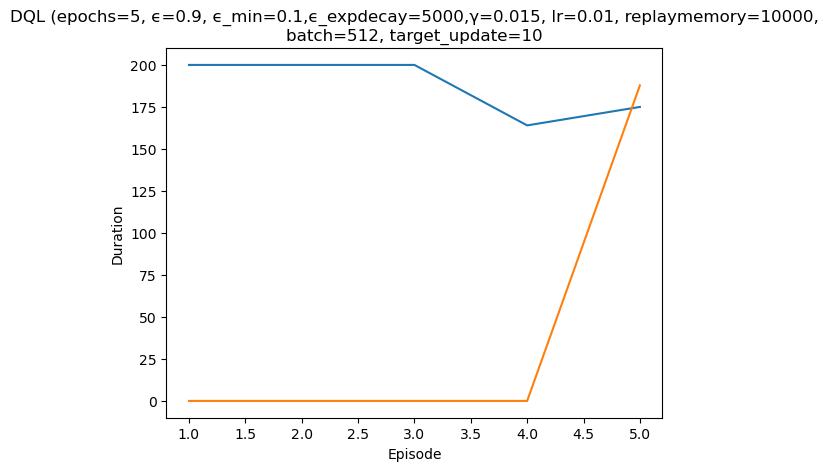

In [9]:
# Run Deep Q-learning
# 0.015
best_dqn_learning_run_10 = learner.epsilon_greedy_search(
    cyberbattle_gym_env=cyberbattlechain_10,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(ep=ep, gamma=0.015, replay_memory_size=10000, target_update=10, batch_size=512, learning_rate=0.01),  # torch default is 1e-2
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    # epsilon_multdecay=0.75,  # 0.999,
    epsilon_exponential_decay=5000,  # 10000
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="DQL",
)

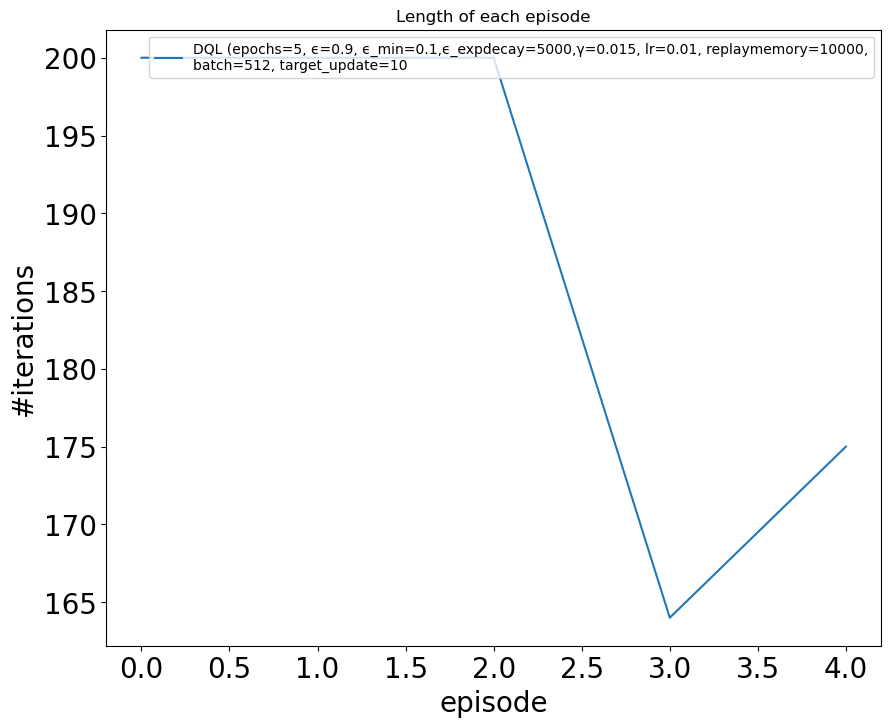

In [10]:
p.plot_episodes_length([best_dqn_learning_run_10])

###### Exploiting DQL
Learning with: episode_count=2,iteration_count=200,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/2 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||


Episode 1|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:03||


Episode 1|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:03||


Episode 1|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:05||


Episode 1|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:05||


Episode 1|Iteration 4|reward:  132.0|last_reward_at:    3|Elapsed Time: 0:00:06||


Episode 1|Iteration 4|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:06||


Episode 1|Iteration 5|reward:  232.0|last_reward_at:    4|Elapsed Time: 0:00:09||


Episode 1|Iteration 5|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:09||


Episode 1|Iteration 6|reward:  246.0|last_reward_at:    5|Elapsed Time: 0:00:10||


Episode 1|Iteration 6|reward:  246.0|last_reward_at:    6|Elapsed Time: 0:00:10||


Episode 1|Iteration 7|reward:  346.0|last_reward_at:    6|Elapsed Time: 0:00:12||


Episode 1|Iteration 7|reward:  346.0|last_reward_at:    7|Elapsed Time: 0:00:12||


Episode 1|Iteration 8|reward:  360.0|last_reward_at:    7|Elapsed Time: 0:00:14||


Episode 1|Iteration 8|reward:  360.0|last_reward_at:    8|Elapsed Time: 0:00:14||


Episode 1|Iteration 9|reward:  460.0|last_reward_at:    8|Elapsed Time: 0:00:16||


Episode 1|Iteration 9|reward:  460.0|last_reward_at:    9|Elapsed Time: 0:00:16||


Episode 1|Iteration 10|reward:  474.0|last_reward_at:    9|Elapsed Time: 0:00:18||


Episode 1|Iteration 10|reward:  474.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 1|Iteration 11|reward:  574.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 1|Iteration 11|reward:  574.0|last_reward_at:   11|Elapsed Time: 0:00:19||


Episode 1|Iteration 12|reward:  588.0|last_reward_at:   11|Elapsed Time: 0:00:21||


Episode 1|Iteration 12|reward:  588.0|last_reward_at:   12|Elapsed Time: 0:00:21||


Episode 1|Iteration 13|reward:  688.0|last_reward_at:   12|Elapsed Time: 0:00:23||


Episode 1|Iteration 13|reward:  688.0|last_reward_at:   13|Elapsed Time: 0:00:23||


Episode 1|Iteration 14|reward:  702.0|last_reward_at:   13|Elapsed Time: 0:00:24||


Episode 1|Iteration 14|reward:  702.0|last_reward_at:   14|Elapsed Time: 0:00:24||


Episode 1|Iteration 15|reward:  802.0|last_reward_at:   14|Elapsed Time: 0:00:26||


Episode 1|Iteration 15|reward:  802.0|last_reward_at:   15|Elapsed Time: 0:00:26||


Episode 1|Iteration 16|reward:  816.0|last_reward_at:   15|Elapsed Time: 0:00:28||


Episode 1|Iteration 16|reward:  816.0|last_reward_at:   16|Elapsed Time: 0:00:28||


Episode 1|Iteration 17|reward:  916.0|last_reward_at:   16|Elapsed Time: 0:00:30||


Episode 1|Iteration 17|reward:  916.0|last_reward_at:   17|Elapsed Time: 0:00:30||


Episode 1|Iteration 18|reward:  930.0|last_reward_at:   17|Elapsed Time: 0:00:32||


Episode 1|Iteration 18|reward:  930.0|last_reward_at:   18|Elapsed Time: 0:00:32||


Episode 1|Iteration 19|reward: 1030.0|last_reward_at:   18|Elapsed Time: 0:00:34||


Episode 1|Iteration 19|reward: 1030.0|last_reward_at:   19|Elapsed Time: 0:00:34||


Episode 1|Iteration 20|reward: 1044.0|last_reward_at:   19|Elapsed Time: 0:00:36||


Episode 1|Iteration 20|reward: 1044.0|last_reward_at:   20|Elapsed Time: 0:00:36||


Episode 1|Iteration 21|reward: 1144.0|last_reward_at:   20|Elapsed Time: 0:00:38||


Episode 1|Iteration 21|reward: 1144.0|last_reward_at:   21|Elapsed Time: 0:00:38||


Episode 1|Iteration 22|reward: 1158.0|last_reward_at:   21|Elapsed Time: 0:00:40||


Episode 1|Iteration 22|reward: 1158.0|last_reward_at:   22|Elapsed Time: 0:00:40||


Episode 1|Iteration 23|reward: 6158.0|last_reward_at:   22|Elapsed Time: 0:00:42||


Episode 1|Iteration 23|reward: 6158.0|last_reward_at:   23|Elapsed Time: 0:00:42||

  Episode 1 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 2/2 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 2|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:04||


Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:06||


Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:06||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:06||


Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:08||


Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:08||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:08||


Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:10||


Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:10||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:10||


Episode 2|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:12||


Episode 2|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:12||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:12||


Episode 2|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:14||


Episode 2|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:14||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:14||


Episode 2|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:16||


Episode 2|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:16||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 8|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:16||


Episode 2|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:18||


Episode 2|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:18||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 9|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:19||


Episode 2|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:20||


Episode 2|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:20||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 10|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:21||


Episode 2|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:23||


Episode 2|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:23||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 11|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 2|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 2|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:25||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 12|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:25||


Episode 2|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:27||


Episode 2|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:27||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 13|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:27||


Episode 2|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:29||


Episode 2|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:29||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 14|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:29||


Episode 2|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:31||


Episode 2|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:31||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 15|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:31||


Episode 2|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:33||


Episode 2|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:33||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
8_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 16|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:34||


Episode 2|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:35||


Episode 2|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:35||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 17|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:36||


Episode 2|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:38||


Episode 2|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:38||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 18|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:38||


Episode 2|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:40||


Episode 2|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:40||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 19|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:40||


Episode 2|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:42||


Episode 2|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:42||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 20|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:42||


Episode 2|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:44||


Episode 2|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:44||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 21|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:45||


Episode 2|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:46||


Episode 2|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:46||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"



Episode 2|Iteration 22|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:47||


Episode 2|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:49||


Episode 2|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:49||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeLinux, ProbeWindows]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"


  Episode 2 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


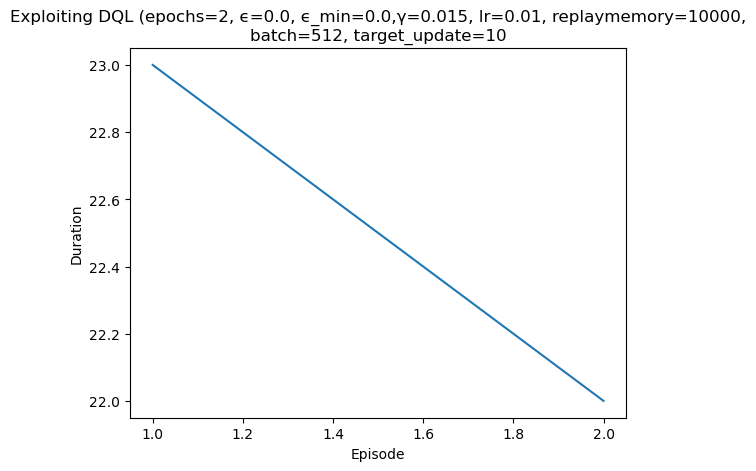

In [12]:
dql_exploit_run = learner.epsilon_greedy_search(
    cyberbattlechain_10,
    ep,
    learner=best_dqn_learning_run_10["learner"],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,  # 0.35,
    render=False,
    render_last_episode_rewards_to=os.path.join(plots_dir, "dql_transfer-chain10"),
    title="Exploiting DQL",
    verbosity=Verbosity.Quiet,
)

###### Random search
Learning with: episode_count=2,iteration_count=200,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/2 'Random search' ϵ=1.0000, 



Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 19|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 19|reward:   14.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 1|Iteration 25|reward:   16.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 1|Iteration 25|reward:   16.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 1|Iteration 31|reward:   20.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 1|Iteration 31|reward:   20.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 1|Iteration 41|reward:  120.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 1|Iteration 41|reward:  120.0|last_reward_at:   41|Elapsed Time: 0:00:00||


Episode 1|Iteration 65|reward:  134.0|last_reward_at:   41|Elapsed Time: 0:00:00||


Episode 1|Iteration 65|reward:  134.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 1|Iteration 72|reward:  140.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 1|Iteration 72|reward:  140.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 1|Iteration 86|reward:  148.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 1|Iteration 86|reward:  148.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 1|Iteration 106|reward:  154.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 1|Iteration 106|reward:  154.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 1|Iteration 160|reward:  154.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 1|Iteration 167|reward:  254.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 1|Iteration 167|reward:  254.0|last_reward_at:  167|Elapsed Time: 0:00:00||


Episode 1|Iteration 171|reward:  265.0|last_reward_at:  167|Elapsed Time: 0:00:00||


Episode 1|Iteration 171|reward:  265.0|last_reward_at:  171|Elapsed Time: 0:00:00||


Episode 1|Iteration 173|reward:  274.0|last_reward_at:  171|Elapsed Time: 0:00:00||


Episode 1|Iteration 173|reward:  274.0|last_reward_at:  173|Elapsed Time: 0:00:00||


Episode 1|Iteration 179|reward:  276.0|last_reward_at:  173|Elapsed Time: 0:00:00||


Episode 1|Iteration 179|reward:  276.0|last_reward_at:  179|Elapsed Time: 0:00:00||


Episode 1|Iteration 200|reward:  276.0|last_reward_at:  179|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/48 (0.09)
    explore-remote: 5/78 (0.06)
    explore-connect: 2/62 (0.03)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/2 'Random search' ϵ=1.0000, 



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 2|Iteration 3|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 2|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 10|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 10|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 2|Iteration 71|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 2|Iteration 82|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 2|Iteration 82|reward:  120.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 2|Iteration 94|reward:  131.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 2|Iteration 94|reward:  131.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 2|Iteration 98|reward:  140.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 2|Iteration 98|reward:  140.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 2|Iteration 107|reward:  146.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 2|Iteration 107|reward:  146.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 2|Iteration 138|reward:  154.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 2|Iteration 138|reward:  154.0|last_reward_at:  138|Elapsed Time: 0:00:00||


Episode 2|Iteration 183|reward:  154.0|last_reward_at:  138|Elapsed Time: 0:00:00||


Episode 2|Iteration 200|reward:  154.0|last_reward_at:  138|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/27 (0.10)
    explore-remote: 4/78 (0.05)
    explore-connect: 1/87 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


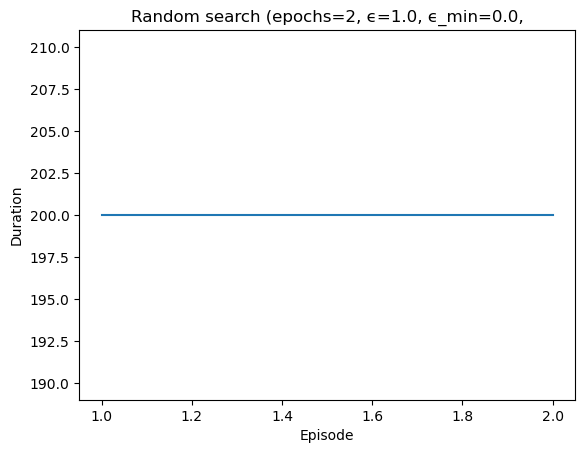

In [13]:
random_run = learner.epsilon_greedy_search(
    cyberbattlechain_10,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    title="Random search",
)

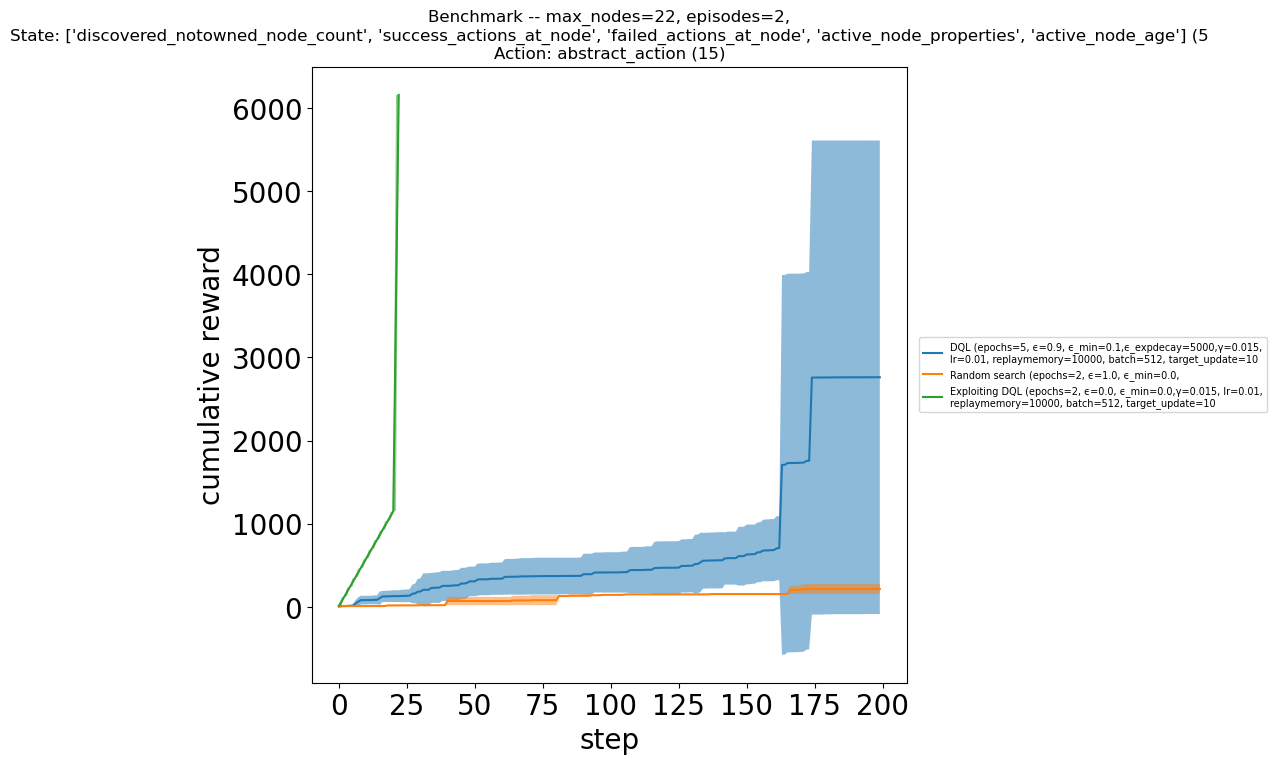

In [14]:
# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=[best_dqn_learning_run_10, random_run, dql_exploit_run],
    title=f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n"
    f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
    f"({len(themodel.state_space.feature_selection)}\n"
    f"Action: abstract_action ({themodel.action_space.flat_size()})",
)

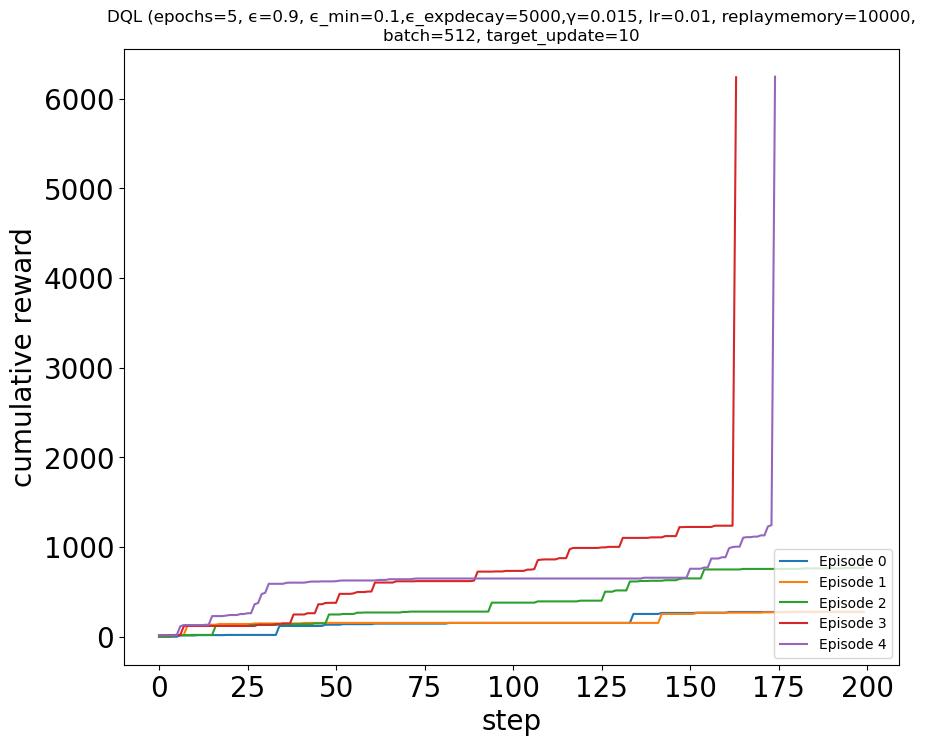

In [15]:
# plot cumulative rewards for all episodes
p.plot_all_episodes(best_dqn_learning_run_10)


##################################################

###### DQL
Learning with: episode_count=5,iteration_count=200,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5
  ## Episode: 1/5 'DQL' ϵ=0.9000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 11|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 11|reward:   14.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 1|Iteration 14|reward:   16.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 1|Iteration 14|reward:   16.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 1|Iteration 43|reward:  116.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 1|Iteration 43|reward:  116.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 1|Iteration 47|reward:  118.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 1|Iteration 47|reward:  118.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 1|Iteration 51|reward:  118.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 1|Iteration 56|reward:  118.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 1|Iteration 66|reward:  118.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 1|Iteration 76|reward:  132.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 1|Iteration 76|reward:  132.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 1|Iteration 78|reward:  140.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 1|Iteration 78|reward:  140.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 1|Iteration 80|reward:  240.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 1|Iteration 80|reward:  240.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 1|Iteration 81|reward:  251.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 1|Iteration 81|reward:  251.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 1|Iteration 89|reward:  257.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 1|Iteration 89|reward:  257.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 1|Iteration 91|reward:  261.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 1|Iteration 91|reward:  261.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 1|Iteration 98|reward:  267.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 1|Iteration 98|reward:  267.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 1|Iteration 99|reward:  269.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 1|Iteration 99|reward:  269.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 1|Iteration 114|reward:  269.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 1|Iteration 127|reward:  269.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 1|Iteration 150|reward:  269.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 1|Iteration 155|reward:  278.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 1|Iteration 155|reward:  278.0|last_reward_at:  155|Elapsed Time: 0:00:00||


Episode 1|Iteration 160|reward:  278.0|last_reward_at:  155|Elapsed Time: 0:00:00||


Episode 1|Iteration 173|reward:  278.0|last_reward_at:  155|Elapsed Time: 0:00:00||


Episode 1|Iteration 178|reward:  278.0|last_reward_at:  155|Elapsed Time: 0:00:01||


Episode 1|Iteration 183|reward:  278.0|last_reward_at:  155|Elapsed Time: 0:00:01||


Episode 1|Iteration 198|reward:  278.0|last_reward_at:  155|Elapsed Time: 0:00:01||


Episode 1|Iteration 200|reward:  278.0|last_reward_at:  155|Elapsed Time: 0:00:01||

  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/30 (0.14)
    explore-remote: 6/82 (0.07)
    explore-connect: 1/65 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/10 (0.09)
  exploit deflected to exploration: 18
  ## Episode: 2/5 'DQL' ϵ=0.8688, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 2|Iteration 8|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:03||


Episode 2|Iteration 8|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:03||


Episode 2|Iteration 9|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:04||


Episode 2|Iteration 10|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:05||


Episode 2|Iteration 11|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:07||


Episode 2|Iteration 11|reward:  114.0|last_reward_at:   11|Elapsed Time: 0:00:07||


Episode 2|Iteration 12|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:00:08||


Episode 2|Iteration 12|reward:  116.0|last_reward_at:   12|Elapsed Time: 0:00:08||


Episode 2|Iteration 13|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:00:09||


Episode 2|Iteration 13|reward:  130.0|last_reward_at:   13|Elapsed Time: 0:00:09||


Episode 2|Iteration 14|reward:  130.0|last_reward_at:   13|Elapsed Time: 0:00:11||


Episode 2|Iteration 15|reward:  130.0|last_reward_at:   13|Elapsed Time: 0:00:12||


Episode 2|Iteration 16|reward:  132.0|last_reward_at:   13|Elapsed Time: 0:00:13||


Episode 2|Iteration 16|reward:  132.0|last_reward_at:   16|Elapsed Time: 0:00:13||


Episode 2|Iteration 17|reward:  132.0|last_reward_at:   16|Elapsed Time: 0:00:15||


Episode 2|Iteration 18|reward:  138.0|last_reward_at:   16|Elapsed Time: 0:00:16||


Episode 2|Iteration 18|reward:  138.0|last_reward_at:   18|Elapsed Time: 0:00:16||


Episode 2|Iteration 19|reward:  138.0|last_reward_at:   18|Elapsed Time: 0:00:18||


Episode 2|Iteration 20|reward:  138.0|last_reward_at:   18|Elapsed Time: 0:00:19||


Episode 2|Iteration 21|reward:  138.0|last_reward_at:   18|Elapsed Time: 0:00:20||


Episode 2|Iteration 22|reward:  146.0|last_reward_at:   18|Elapsed Time: 0:00:22||


Episode 2|Iteration 22|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:22||


Episode 2|Iteration 23|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:23||


Episode 2|Iteration 24|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:25||


Episode 2|Iteration 25|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:26||


Episode 2|Iteration 26|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:28||


Episode 2|Iteration 27|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:29||


Episode 2|Iteration 28|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:34||


Episode 2|Iteration 29|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:36||


Episode 2|Iteration 30|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:37||


Episode 2|Iteration 31|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:38||


Episode 2|Iteration 32|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:40||


Episode 2|Iteration 33|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:41||


Episode 2|Iteration 34|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:43||


Episode 2|Iteration 35|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:44||


Episode 2|Iteration 36|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:46||


Episode 2|Iteration 37|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:48||


Episode 2|Iteration 38|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:49||


Episode 2|Iteration 39|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:51||


Episode 2|Iteration 40|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:52||


Episode 2|Iteration 41|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:54||


Episode 2|Iteration 42|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:56||


Episode 2|Iteration 43|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:57||


Episode 2|Iteration 44|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:58||


Episode 2|Iteration 45|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:01:00||


Episode 2|Iteration 46|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:01:01||


Episode 2|Iteration 47|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:01:03||


Episode 2|Iteration 48|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:01:04||


Episode 2|Iteration 49|reward:  152.0|last_reward_at:   22|Elapsed Time: 0:01:06||


Episode 2|Iteration 49|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:06||


Episode 2|Iteration 50|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:07||


Episode 2|Iteration 51|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:09||


Episode 2|Iteration 52|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:11||


Episode 2|Iteration 53|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:12||


Episode 2|Iteration 54|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:14||


Episode 2|Iteration 55|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:17||


Episode 2|Iteration 56|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:18||


Episode 2|Iteration 57|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:20||


Episode 2|Iteration 58|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:21||


Episode 2|Iteration 59|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:23||


Episode 2|Iteration 60|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:24||


Episode 2|Iteration 61|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:25||


Episode 2|Iteration 62|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:27||


Episode 2|Iteration 63|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:28||


Episode 2|Iteration 64|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:30||


Episode 2|Iteration 65|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:32||


Episode 2|Iteration 66|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:36||


Episode 2|Iteration 67|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:38||


Episode 2|Iteration 68|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:42||


Episode 2|Iteration 69|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:44||


Episode 2|Iteration 70|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:46||


Episode 2|Iteration 71|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:47||


Episode 2|Iteration 72|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:48||


Episode 2|Iteration 73|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:50||


Episode 2|Iteration 74|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:51||


Episode 2|Iteration 75|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:53||


Episode 2|Iteration 76|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:54||


Episode 2|Iteration 77|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:56||


Episode 2|Iteration 78|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:57||


Episode 2|Iteration 79|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:01:58||


Episode 2|Iteration 80|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:00||


Episode 2|Iteration 81|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:01||


Episode 2|Iteration 82|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:04||


Episode 2|Iteration 83|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:06||


Episode 2|Iteration 84|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:07||


Episode 2|Iteration 85|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:09||


Episode 2|Iteration 86|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:10||


Episode 2|Iteration 87|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:12||


Episode 2|Iteration 88|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:13||


Episode 2|Iteration 89|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:15||


Episode 2|Iteration 90|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:17||


Episode 2|Iteration 91|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:18||


Episode 2|Iteration 92|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:19||


Episode 2|Iteration 93|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:21||


Episode 2|Iteration 94|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:22||


Episode 2|Iteration 95|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:24||


Episode 2|Iteration 96|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:27||


Episode 2|Iteration 97|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:28||


Episode 2|Iteration 98|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:30||


Episode 2|Iteration 99|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:31||


Episode 2|Iteration 100|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:33||


Episode 2|Iteration 101|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:34||


Episode 2|Iteration 102|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:36||


Episode 2|Iteration 103|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:37||


Episode 2|Iteration 104|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:39||


Episode 2|Iteration 105|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:40||


Episode 2|Iteration 106|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:42||


Episode 2|Iteration 107|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:44||


Episode 2|Iteration 108|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:45||


Episode 2|Iteration 109|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:46||


Episode 2|Iteration 110|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:46||


Episode 2|Iteration 111|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:48||


Episode 2|Iteration 112|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:49||


Episode 2|Iteration 113|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:51||


Episode 2|Iteration 114|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:52||


Episode 2|Iteration 115|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:54||


Episode 2|Iteration 116|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:55||


Episode 2|Iteration 117|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:57||


Episode 2|Iteration 118|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:02:58||


Episode 2|Iteration 119|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:03:00||


Episode 2|Iteration 120|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:03:01||


Episode 2|Iteration 121|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:03:02||


Episode 2|Iteration 122|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:03:04||


Episode 2|Iteration 123|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:03:05||


Episode 2|Iteration 124|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:03:07||


Episode 2|Iteration 125|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:03:08||


Episode 2|Iteration 126|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:03:09||


Episode 2|Iteration 127|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:03:11||


Episode 2|Iteration 128|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:03:12||


Episode 2|Iteration 129|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:03:14||


Episode 2|Iteration 130|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:03:15||


Episode 2|Iteration 131|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:03:16||


Episode 2|Iteration 132|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:03:18||


Episode 2|Iteration 133|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:03:19||


Episode 2|Iteration 134|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:03:21||


Episode 2|Iteration 135|reward:  152.0|last_reward_at:   49|Elapsed Time: 0:03:23||


Episode 2|Iteration 136|reward:  252.0|last_reward_at:   49|Elapsed Time: 0:03:24||


Episode 2|Iteration 136|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:24||


Episode 2|Iteration 137|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:26||


Episode 2|Iteration 138|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:27||


Episode 2|Iteration 139|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:28||


Episode 2|Iteration 140|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:30||


Episode 2|Iteration 141|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:31||


Episode 2|Iteration 142|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:33||


Episode 2|Iteration 143|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:34||


Episode 2|Iteration 144|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:36||


Episode 2|Iteration 145|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:42||


Episode 2|Iteration 146|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:43||


Episode 2|Iteration 147|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:45||


Episode 2|Iteration 148|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:46||


Episode 2|Iteration 149|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:48||


Episode 2|Iteration 150|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:49||


Episode 2|Iteration 151|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:50||


Episode 2|Iteration 152|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:52||


Episode 2|Iteration 153|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:54||


Episode 2|Iteration 154|reward:  252.0|last_reward_at:  136|Elapsed Time: 0:03:55||


Episode 2|Iteration 155|reward:  266.0|last_reward_at:  136|Elapsed Time: 0:03:57||


Episode 2|Iteration 155|reward:  266.0|last_reward_at:  155|Elapsed Time: 0:03:57||


Episode 2|Iteration 156|reward:  266.0|last_reward_at:  155|Elapsed Time: 0:03:58||


Episode 2|Iteration 157|reward:  266.0|last_reward_at:  155|Elapsed Time: 0:03:59||


Episode 2|Iteration 158|reward:  266.0|last_reward_at:  155|Elapsed Time: 0:04:01||


Episode 2|Iteration 159|reward:  266.0|last_reward_at:  155|Elapsed Time: 0:04:02||


Episode 2|Iteration 160|reward:  366.0|last_reward_at:  155|Elapsed Time: 0:04:04||


Episode 2|Iteration 160|reward:  366.0|last_reward_at:  160|Elapsed Time: 0:04:04||


Episode 2|Iteration 161|reward:  366.0|last_reward_at:  160|Elapsed Time: 0:04:05||


Episode 2|Iteration 162|reward:  368.0|last_reward_at:  160|Elapsed Time: 0:04:07||


Episode 2|Iteration 162|reward:  368.0|last_reward_at:  162|Elapsed Time: 0:04:07||


Episode 2|Iteration 163|reward:  368.0|last_reward_at:  162|Elapsed Time: 0:04:09||


Episode 2|Iteration 164|reward:  368.0|last_reward_at:  162|Elapsed Time: 0:04:10||


Episode 2|Iteration 165|reward:  368.0|last_reward_at:  162|Elapsed Time: 0:04:12||


Episode 2|Iteration 166|reward:  370.0|last_reward_at:  162|Elapsed Time: 0:04:13||


Episode 2|Iteration 166|reward:  370.0|last_reward_at:  166|Elapsed Time: 0:04:13||


Episode 2|Iteration 167|reward:  370.0|last_reward_at:  166|Elapsed Time: 0:04:14||


Episode 2|Iteration 168|reward:  370.0|last_reward_at:  166|Elapsed Time: 0:04:16||


Episode 2|Iteration 169|reward:  384.0|last_reward_at:  166|Elapsed Time: 0:04:19||


Episode 2|Iteration 169|reward:  384.0|last_reward_at:  169|Elapsed Time: 0:04:19||


Episode 2|Iteration 170|reward:  384.0|last_reward_at:  169|Elapsed Time: 0:04:21||


Episode 2|Iteration 171|reward:  384.0|last_reward_at:  169|Elapsed Time: 0:04:22||


Episode 2|Iteration 172|reward:  384.0|last_reward_at:  169|Elapsed Time: 0:04:24||


Episode 2|Iteration 173|reward:  390.0|last_reward_at:  169|Elapsed Time: 0:04:25||


Episode 2|Iteration 173|reward:  390.0|last_reward_at:  173|Elapsed Time: 0:04:25||


Episode 2|Iteration 174|reward:  390.0|last_reward_at:  173|Elapsed Time: 0:04:27||


Episode 2|Iteration 175|reward:  390.0|last_reward_at:  173|Elapsed Time: 0:04:28||


Episode 2|Iteration 176|reward:  390.0|last_reward_at:  173|Elapsed Time: 0:04:30||


Episode 2|Iteration 177|reward:  390.0|last_reward_at:  173|Elapsed Time: 0:04:31||


Episode 2|Iteration 178|reward:  390.0|last_reward_at:  173|Elapsed Time: 0:04:32||


Episode 2|Iteration 179|reward:  390.0|last_reward_at:  173|Elapsed Time: 0:04:34||


Episode 2|Iteration 180|reward:  390.0|last_reward_at:  173|Elapsed Time: 0:04:36||


Episode 2|Iteration 181|reward:  390.0|last_reward_at:  173|Elapsed Time: 0:04:37||


Episode 2|Iteration 182|reward:  390.0|last_reward_at:  173|Elapsed Time: 0:04:39||


Episode 2|Iteration 183|reward:  390.0|last_reward_at:  173|Elapsed Time: 0:04:40||


Episode 2|Iteration 184|reward:  490.0|last_reward_at:  173|Elapsed Time: 0:04:42||


Episode 2|Iteration 184|reward:  490.0|last_reward_at:  184|Elapsed Time: 0:04:42||


Episode 2|Iteration 185|reward:  490.0|last_reward_at:  184|Elapsed Time: 0:04:43||


Episode 2|Iteration 186|reward:  490.0|last_reward_at:  184|Elapsed Time: 0:04:44||


Episode 2|Iteration 187|reward:  490.0|last_reward_at:  184|Elapsed Time: 0:04:46||


Episode 2|Iteration 188|reward:  490.0|last_reward_at:  184|Elapsed Time: 0:04:47||


Episode 2|Iteration 189|reward:  490.0|last_reward_at:  184|Elapsed Time: 0:04:49||


Episode 2|Iteration 190|reward:  496.0|last_reward_at:  184|Elapsed Time: 0:04:52||


Episode 2|Iteration 190|reward:  496.0|last_reward_at:  190|Elapsed Time: 0:04:52||


Episode 2|Iteration 191|reward:  496.0|last_reward_at:  190|Elapsed Time: 0:04:53||


Episode 2|Iteration 192|reward:  496.0|last_reward_at:  190|Elapsed Time: 0:04:54||


Episode 2|Iteration 193|reward:  496.0|last_reward_at:  190|Elapsed Time: 0:04:56||


Episode 2|Iteration 194|reward:  496.0|last_reward_at:  190|Elapsed Time: 0:04:57||


Episode 2|Iteration 195|reward:  496.0|last_reward_at:  190|Elapsed Time: 0:04:59||


Episode 2|Iteration 196|reward:  496.0|last_reward_at:  190|Elapsed Time: 0:05:01||


Episode 2|Iteration 197|reward:  496.0|last_reward_at:  190|Elapsed Time: 0:05:02||


Episode 2|Iteration 198|reward:  496.0|last_reward_at:  190|Elapsed Time: 0:05:04||


Episode 2|Iteration 199|reward:  496.0|last_reward_at:  190|Elapsed Time: 0:05:06||


Episode 2|Iteration 200|reward:  496.0|last_reward_at:  190|Elapsed Time: 0:05:07||


Episode 2|Iteration 200|reward:  496.0|last_reward_at:  190|Elapsed Time: 0:05:07||

  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/39 (0.05)
    explore-remote: 6/54 (0.10)
    explore-connect: 3/68 (0.04)
    exploit-local: 4/12 (0.25)
    exploit-remote: 1/5 (0.17)
    exploit-connect: 1/5 (0.17)
  exploit deflected to exploration: 5
  ## Episode: 3/5 'DQL' ϵ=0.8386, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:02||


Episode 3|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:04||


Episode 3|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:06||


Episode 3|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:08||


Episode 3|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:10||


Episode 3|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:11||


Episode 3|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:13||


Episode 3|Iteration 8|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:15||


Episode 3|Iteration 9|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:16||


Episode 3|Iteration 10|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:18||


Episode 3|Iteration 11|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:19||


Episode 3|Iteration 12|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:20||


Episode 3|Iteration 13|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:22||


Episode 3|Iteration 14|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:23||


Episode 3|Iteration 15|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:27||


Episode 3|Iteration 16|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:28||


Episode 3|Iteration 17|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:29||


Episode 3|Iteration 18|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:31||


Episode 3|Iteration 19|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:32||


Episode 3|Iteration 20|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:34||


Episode 3|Iteration 21|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:35||


Episode 3|Iteration 22|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:37||


Episode 3|Iteration 23|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:38||


Episode 3|Iteration 24|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:39||


Episode 3|Iteration 25|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:41||


Episode 3|Iteration 26|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:43||


Episode 3|Iteration 27|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:44||


Episode 3|Iteration 28|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:48||


Episode 3|Iteration 29|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:49||


Episode 3|Iteration 30|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:51||


Episode 3|Iteration 31|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:52||


Episode 3|Iteration 32|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:54||


Episode 3|Iteration 32|reward:   14.0|last_reward_at:   32|Elapsed Time: 0:00:54||


Episode 3|Iteration 33|reward:   14.0|last_reward_at:   32|Elapsed Time: 0:00:55||


Episode 3|Iteration 34|reward:   14.0|last_reward_at:   32|Elapsed Time: 0:00:57||


Episode 3|Iteration 35|reward:  114.0|last_reward_at:   32|Elapsed Time: 0:00:58||


Episode 3|Iteration 35|reward:  114.0|last_reward_at:   35|Elapsed Time: 0:00:58||


Episode 3|Iteration 36|reward:  114.0|last_reward_at:   35|Elapsed Time: 0:01:00||


Episode 3|Iteration 37|reward:  128.0|last_reward_at:   35|Elapsed Time: 0:01:01||


Episode 3|Iteration 37|reward:  128.0|last_reward_at:   37|Elapsed Time: 0:01:01||


Episode 3|Iteration 38|reward:  134.0|last_reward_at:   37|Elapsed Time: 0:01:03||


Episode 3|Iteration 38|reward:  134.0|last_reward_at:   38|Elapsed Time: 0:01:03||


Episode 3|Iteration 39|reward:  134.0|last_reward_at:   38|Elapsed Time: 0:01:04||


Episode 3|Iteration 40|reward:  134.0|last_reward_at:   38|Elapsed Time: 0:01:05||


Episode 3|Iteration 41|reward:  142.0|last_reward_at:   38|Elapsed Time: 0:01:07||


Episode 3|Iteration 41|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:01:07||


Episode 3|Iteration 42|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:01:08||


Episode 3|Iteration 43|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:01:11||


Episode 3|Iteration 44|reward:  148.0|last_reward_at:   41|Elapsed Time: 0:01:12||


Episode 3|Iteration 44|reward:  148.0|last_reward_at:   44|Elapsed Time: 0:01:12||


Episode 3|Iteration 45|reward:  148.0|last_reward_at:   44|Elapsed Time: 0:01:14||


Episode 3|Iteration 46|reward:  148.0|last_reward_at:   44|Elapsed Time: 0:01:15||


Episode 3|Iteration 47|reward:  148.0|last_reward_at:   44|Elapsed Time: 0:01:18||


Episode 3|Iteration 48|reward:  150.0|last_reward_at:   44|Elapsed Time: 0:01:20||


Episode 3|Iteration 48|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:20||


Episode 3|Iteration 49|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:21||


Episode 3|Iteration 50|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:23||


Episode 3|Iteration 51|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:24||


Episode 3|Iteration 52|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:26||


Episode 3|Iteration 53|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:27||


Episode 3|Iteration 54|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:29||


Episode 3|Iteration 55|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:30||


Episode 3|Iteration 56|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:32||


Episode 3|Iteration 57|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:34||


Episode 3|Iteration 58|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:35||


Episode 3|Iteration 59|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:37||


Episode 3|Iteration 60|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:39||


Episode 3|Iteration 61|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:40||


Episode 3|Iteration 62|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:42||


Episode 3|Iteration 63|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:43||


Episode 3|Iteration 64|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:45||


Episode 3|Iteration 65|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:46||


Episode 3|Iteration 66|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:48||


Episode 3|Iteration 67|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:49||


Episode 3|Iteration 68|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:51||


Episode 3|Iteration 69|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:52||


Episode 3|Iteration 70|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:54||


Episode 3|Iteration 71|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:55||


Episode 3|Iteration 72|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:57||


Episode 3|Iteration 73|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:01:58||


Episode 3|Iteration 74|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:02:00||


Episode 3|Iteration 75|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:02:01||


Episode 3|Iteration 76|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:02:03||


Episode 3|Iteration 77|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:02:04||


Episode 3|Iteration 78|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:02:06||


Episode 3|Iteration 79|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:02:08||


Episode 3|Iteration 80|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:02:09||


Episode 3|Iteration 81|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:02:11||


Episode 3|Iteration 82|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:02:13||


Episode 3|Iteration 83|reward:  150.0|last_reward_at:   48|Elapsed Time: 0:02:14||


Episode 3|Iteration 84|reward:  152.0|last_reward_at:   48|Elapsed Time: 0:02:16||


Episode 3|Iteration 84|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:16||


Episode 3|Iteration 85|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:17||


Episode 3|Iteration 86|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:19||


Episode 3|Iteration 87|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:21||


Episode 3|Iteration 88|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:22||


Episode 3|Iteration 89|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:24||


Episode 3|Iteration 90|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:26||


Episode 3|Iteration 91|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:27||


Episode 3|Iteration 92|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:29||


Episode 3|Iteration 93|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:31||


Episode 3|Iteration 94|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:32||


Episode 3|Iteration 95|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:34||


Episode 3|Iteration 96|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:35||


Episode 3|Iteration 97|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:37||


Episode 3|Iteration 98|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:38||


Episode 3|Iteration 99|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:40||


Episode 3|Iteration 100|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:42||


Episode 3|Iteration 101|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:43||


Episode 3|Iteration 102|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:45||


Episode 3|Iteration 103|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:46||


Episode 3|Iteration 104|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:48||


Episode 3|Iteration 105|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:49||


Episode 3|Iteration 106|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:51||


Episode 3|Iteration 107|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:52||


Episode 3|Iteration 108|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:54||


Episode 3|Iteration 109|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:55||


Episode 3|Iteration 110|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:57||


Episode 3|Iteration 111|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:02:58||


Episode 3|Iteration 112|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:00||


Episode 3|Iteration 113|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:01||


Episode 3|Iteration 114|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:03||


Episode 3|Iteration 115|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:05||


Episode 3|Iteration 116|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:06||


Episode 3|Iteration 117|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:08||


Episode 3|Iteration 118|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:09||


Episode 3|Iteration 119|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:11||


Episode 3|Iteration 120|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:12||


Episode 3|Iteration 121|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:14||


Episode 3|Iteration 122|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:15||


Episode 3|Iteration 123|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:17||


Episode 3|Iteration 124|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:19||


Episode 3|Iteration 125|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:20||


Episode 3|Iteration 126|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:22||


Episode 3|Iteration 127|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:23||


Episode 3|Iteration 128|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:25||


Episode 3|Iteration 129|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:26||


Episode 3|Iteration 130|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:03:28||


Episode 3|Iteration 131|reward:  252.0|last_reward_at:   84|Elapsed Time: 0:03:29||


Episode 3|Iteration 131|reward:  252.0|last_reward_at:  131|Elapsed Time: 0:03:29||


Episode 3|Iteration 132|reward:  252.0|last_reward_at:  131|Elapsed Time: 0:03:31||


Episode 3|Iteration 133|reward:  252.0|last_reward_at:  131|Elapsed Time: 0:03:32||


Episode 3|Iteration 134|reward:  252.0|last_reward_at:  131|Elapsed Time: 0:03:33||


Episode 3|Iteration 135|reward:  252.0|last_reward_at:  131|Elapsed Time: 0:03:36||


Episode 3|Iteration 136|reward:  252.0|last_reward_at:  131|Elapsed Time: 0:03:39||


Episode 3|Iteration 137|reward:  252.0|last_reward_at:  131|Elapsed Time: 0:03:40||


Episode 3|Iteration 138|reward:  252.0|last_reward_at:  131|Elapsed Time: 0:03:42||


Episode 3|Iteration 139|reward:  252.0|last_reward_at:  131|Elapsed Time: 0:03:43||


Episode 3|Iteration 140|reward:  252.0|last_reward_at:  131|Elapsed Time: 0:03:45||


Episode 3|Iteration 141|reward:  252.0|last_reward_at:  131|Elapsed Time: 0:03:46||


Episode 3|Iteration 142|reward:  252.0|last_reward_at:  131|Elapsed Time: 0:03:48||


Episode 3|Iteration 143|reward:  252.0|last_reward_at:  131|Elapsed Time: 0:03:49||


Episode 3|Iteration 144|reward:  252.0|last_reward_at:  131|Elapsed Time: 0:03:51||


Episode 3|Iteration 145|reward:  252.0|last_reward_at:  131|Elapsed Time: 0:03:52||


Episode 3|Iteration 146|reward:  252.0|last_reward_at:  131|Elapsed Time: 0:03:54||


Episode 3|Iteration 147|reward:  252.0|last_reward_at:  131|Elapsed Time: 0:03:55||


Episode 3|Iteration 148|reward:  263.0|last_reward_at:  131|Elapsed Time: 0:03:57||


Episode 3|Iteration 148|reward:  263.0|last_reward_at:  148|Elapsed Time: 0:03:57||


Episode 3|Iteration 149|reward:  263.0|last_reward_at:  148|Elapsed Time: 0:03:58||


Episode 3|Iteration 150|reward:  263.0|last_reward_at:  148|Elapsed Time: 0:03:59||


Episode 3|Iteration 151|reward:  263.0|last_reward_at:  148|Elapsed Time: 0:04:01||


Episode 3|Iteration 152|reward:  263.0|last_reward_at:  148|Elapsed Time: 0:04:02||


Episode 3|Iteration 153|reward:  263.0|last_reward_at:  148|Elapsed Time: 0:04:04||


Episode 3|Iteration 154|reward:  263.0|last_reward_at:  148|Elapsed Time: 0:04:05||


Episode 3|Iteration 155|reward:  263.0|last_reward_at:  148|Elapsed Time: 0:04:09||


Episode 3|Iteration 156|reward:  263.0|last_reward_at:  148|Elapsed Time: 0:04:11||


Episode 3|Iteration 157|reward:  265.0|last_reward_at:  148|Elapsed Time: 0:04:12||


Episode 3|Iteration 157|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:12||


Episode 3|Iteration 158|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:14||


Episode 3|Iteration 159|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:15||


Episode 3|Iteration 160|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:17||


Episode 3|Iteration 161|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:18||


Episode 3|Iteration 162|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:20||


Episode 3|Iteration 163|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:21||


Episode 3|Iteration 164|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:23||


Episode 3|Iteration 165|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:24||


Episode 3|Iteration 166|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:26||


Episode 3|Iteration 167|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:27||


Episode 3|Iteration 168|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:29||


Episode 3|Iteration 169|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:31||


Episode 3|Iteration 170|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:32||


Episode 3|Iteration 171|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:34||


Episode 3|Iteration 172|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:39||


Episode 3|Iteration 173|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:40||


Episode 3|Iteration 174|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:42||


Episode 3|Iteration 175|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:43||


Episode 3|Iteration 176|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:45||


Episode 3|Iteration 177|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:46||


Episode 3|Iteration 178|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:48||


Episode 3|Iteration 179|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:49||


Episode 3|Iteration 180|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:51||


Episode 3|Iteration 181|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:52||


Episode 3|Iteration 182|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:53||


Episode 3|Iteration 183|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:55||


Episode 3|Iteration 184|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:57||


Episode 3|Iteration 185|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:04:58||


Episode 3|Iteration 186|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:05:03||


Episode 3|Iteration 187|reward:  265.0|last_reward_at:  157|Elapsed Time: 0:05:05||


Episode 3|Iteration 188|reward:  269.0|last_reward_at:  157|Elapsed Time: 0:05:06||


Episode 3|Iteration 188|reward:  269.0|last_reward_at:  188|Elapsed Time: 0:05:06||


Episode 3|Iteration 189|reward:  269.0|last_reward_at:  188|Elapsed Time: 0:05:08||


Episode 3|Iteration 190|reward:  269.0|last_reward_at:  188|Elapsed Time: 0:05:09||


Episode 3|Iteration 191|reward:  269.0|last_reward_at:  188|Elapsed Time: 0:05:11||


Episode 3|Iteration 192|reward:  269.0|last_reward_at:  188|Elapsed Time: 0:05:12||


Episode 3|Iteration 193|reward:  269.0|last_reward_at:  188|Elapsed Time: 0:05:14||


Episode 3|Iteration 194|reward:  269.0|last_reward_at:  188|Elapsed Time: 0:05:15||


Episode 3|Iteration 195|reward:  269.0|last_reward_at:  188|Elapsed Time: 0:05:17||


Episode 3|Iteration 196|reward:  278.0|last_reward_at:  188|Elapsed Time: 0:05:19||


Episode 3|Iteration 196|reward:  278.0|last_reward_at:  196|Elapsed Time: 0:05:19||


Episode 3|Iteration 197|reward:  278.0|last_reward_at:  196|Elapsed Time: 0:05:20||


Episode 3|Iteration 198|reward:  278.0|last_reward_at:  196|Elapsed Time: 0:05:22||


Episode 3|Iteration 199|reward:  278.0|last_reward_at:  196|Elapsed Time: 0:05:23||


Episode 3|Iteration 200|reward:  278.0|last_reward_at:  196|Elapsed Time: 0:05:25||


Episode 3|Iteration 200|reward:  278.0|last_reward_at:  196|Elapsed Time: 0:05:25||

  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/25 (0.11)
    explore-remote: 5/85 (0.06)
    explore-connect: 1/53 (0.02)
    exploit-local: 2/10 (0.17)
    exploit-remote: 1/13 (0.07)
    exploit-connect: 1/1 (0.50)
  exploit deflected to exploration: 4
  ## Episode: 4/5 'DQL' ϵ=0.8097, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 4|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:05||


Episode 4|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:05||


Episode 4|Iteration 3|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:06||


Episode 4|Iteration 4|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:07||


Episode 4|Iteration 5|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:09||


Episode 4|Iteration 6|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:10||


Episode 4|Iteration 7|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:12||


Episode 4|Iteration 8|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:13||


Episode 4|Iteration 8|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:13||


Episode 4|Iteration 9|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:17||


Episode 4|Iteration 10|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:18||


Episode 4|Iteration 11|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:20||


Episode 4|Iteration 12|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:22||


Episode 4|Iteration 13|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:23||


Episode 4|Iteration 14|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:25||


Episode 4|Iteration 15|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:26||


Episode 4|Iteration 16|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:28||


Episode 4|Iteration 17|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:29||


Episode 4|Iteration 18|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:31||


Episode 4|Iteration 19|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:34||


Episode 4|Iteration 20|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:35||


Episode 4|Iteration 20|reward:  118.0|last_reward_at:   20|Elapsed Time: 0:00:35||


Episode 4|Iteration 21|reward:  118.0|last_reward_at:   20|Elapsed Time: 0:00:37||


Episode 4|Iteration 22|reward:  118.0|last_reward_at:   20|Elapsed Time: 0:00:38||


Episode 4|Iteration 23|reward:  118.0|last_reward_at:   20|Elapsed Time: 0:00:40||


Episode 4|Iteration 24|reward:  120.0|last_reward_at:   20|Elapsed Time: 0:00:41||


Episode 4|Iteration 24|reward:  120.0|last_reward_at:   24|Elapsed Time: 0:00:41||


Episode 4|Iteration 25|reward:  120.0|last_reward_at:   24|Elapsed Time: 0:00:43||


Episode 4|Iteration 26|reward:  120.0|last_reward_at:   24|Elapsed Time: 0:00:45||


Episode 4|Iteration 27|reward:  120.0|last_reward_at:   24|Elapsed Time: 0:00:46||


Episode 4|Iteration 28|reward:  120.0|last_reward_at:   24|Elapsed Time: 0:00:48||


Episode 4|Iteration 29|reward:  120.0|last_reward_at:   24|Elapsed Time: 0:00:49||


Episode 4|Iteration 30|reward:  120.0|last_reward_at:   24|Elapsed Time: 0:00:51||


Episode 4|Iteration 31|reward:  120.0|last_reward_at:   24|Elapsed Time: 0:00:53||


Episode 4|Iteration 32|reward:  134.0|last_reward_at:   24|Elapsed Time: 0:00:54||


Episode 4|Iteration 32|reward:  134.0|last_reward_at:   32|Elapsed Time: 0:00:54||


Episode 4|Iteration 33|reward:  134.0|last_reward_at:   32|Elapsed Time: 0:00:56||


Episode 4|Iteration 34|reward:  134.0|last_reward_at:   32|Elapsed Time: 0:00:58||


Episode 4|Iteration 35|reward:  134.0|last_reward_at:   32|Elapsed Time: 0:00:59||


Episode 4|Iteration 36|reward:  140.0|last_reward_at:   32|Elapsed Time: 0:01:01||


Episode 4|Iteration 36|reward:  140.0|last_reward_at:   36|Elapsed Time: 0:01:01||


Episode 4|Iteration 37|reward:  146.0|last_reward_at:   36|Elapsed Time: 0:01:02||


Episode 4|Iteration 37|reward:  146.0|last_reward_at:   37|Elapsed Time: 0:01:02||


Episode 4|Iteration 38|reward:  146.0|last_reward_at:   37|Elapsed Time: 0:01:04||


Episode 4|Iteration 39|reward:  146.0|last_reward_at:   37|Elapsed Time: 0:01:05||


Episode 4|Iteration 40|reward:  146.0|last_reward_at:   37|Elapsed Time: 0:01:07||


Episode 4|Iteration 41|reward:  146.0|last_reward_at:   37|Elapsed Time: 0:01:08||


Episode 4|Iteration 42|reward:  146.0|last_reward_at:   37|Elapsed Time: 0:01:10||


Episode 4|Iteration 43|reward:  146.0|last_reward_at:   37|Elapsed Time: 0:01:11||


Episode 4|Iteration 44|reward:  146.0|last_reward_at:   37|Elapsed Time: 0:01:13||


Episode 4|Iteration 45|reward:  146.0|last_reward_at:   37|Elapsed Time: 0:01:14||


Episode 4|Iteration 46|reward:  146.0|last_reward_at:   37|Elapsed Time: 0:01:15||


Episode 4|Iteration 47|reward:  154.0|last_reward_at:   37|Elapsed Time: 0:01:16||


Episode 4|Iteration 47|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:16||


Episode 4|Iteration 48|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:17||


Episode 4|Iteration 49|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:18||


Episode 4|Iteration 50|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:20||


Episode 4|Iteration 51|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:21||


Episode 4|Iteration 52|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:22||


Episode 4|Iteration 53|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:24||


Episode 4|Iteration 54|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:25||


Episode 4|Iteration 55|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:27||


Episode 4|Iteration 56|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:28||


Episode 4|Iteration 57|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:30||


Episode 4|Iteration 58|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:31||


Episode 4|Iteration 59|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:33||


Episode 4|Iteration 60|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:34||


Episode 4|Iteration 61|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:36||


Episode 4|Iteration 62|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:38||


Episode 4|Iteration 63|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:39||


Episode 4|Iteration 64|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:40||


Episode 4|Iteration 65|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:42||


Episode 4|Iteration 66|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:43||


Episode 4|Iteration 67|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:45||


Episode 4|Iteration 68|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:46||


Episode 4|Iteration 69|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:48||


Episode 4|Iteration 70|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:49||


Episode 4|Iteration 71|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:51||


Episode 4|Iteration 72|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:52||


Episode 4|Iteration 73|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:54||


Episode 4|Iteration 74|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:55||


Episode 4|Iteration 75|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:56||


Episode 4|Iteration 76|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:01:58||


Episode 4|Iteration 77|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:02:00||


Episode 4|Iteration 78|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:02:01||


Episode 4|Iteration 79|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:02:02||


Episode 4|Iteration 80|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:02:04||


Episode 4|Iteration 81|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:02:06||


Episode 4|Iteration 82|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:02:07||


Episode 4|Iteration 83|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:02:08||


Episode 4|Iteration 84|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:02:10||


Episode 4|Iteration 85|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:02:11||


Episode 4|Iteration 86|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:02:13||


Episode 4|Iteration 87|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:02:14||


Episode 4|Iteration 88|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:02:16||


Episode 4|Iteration 89|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:02:17||


Episode 4|Iteration 90|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:02:19||


Episode 4|Iteration 91|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:02:20||


Episode 4|Iteration 92|reward:  254.0|last_reward_at:   47|Elapsed Time: 0:02:22||


Episode 4|Iteration 92|reward:  254.0|last_reward_at:   92|Elapsed Time: 0:02:22||


Episode 4|Iteration 93|reward:  254.0|last_reward_at:   92|Elapsed Time: 0:02:23||


Episode 4|Iteration 94|reward:  254.0|last_reward_at:   92|Elapsed Time: 0:02:25||


Episode 4|Iteration 95|reward:  268.0|last_reward_at:   92|Elapsed Time: 0:02:26||


Episode 4|Iteration 95|reward:  268.0|last_reward_at:   95|Elapsed Time: 0:02:26||


Episode 4|Iteration 96|reward:  268.0|last_reward_at:   95|Elapsed Time: 0:02:27||


Episode 4|Iteration 97|reward:  268.0|last_reward_at:   95|Elapsed Time: 0:02:29||


Episode 4|Iteration 98|reward:  268.0|last_reward_at:   95|Elapsed Time: 0:02:30||


Episode 4|Iteration 99|reward:  270.0|last_reward_at:   95|Elapsed Time: 0:02:32||


Episode 4|Iteration 99|reward:  270.0|last_reward_at:   99|Elapsed Time: 0:02:32||


Episode 4|Iteration 100|reward:  270.0|last_reward_at:   99|Elapsed Time: 0:02:33||


Episode 4|Iteration 101|reward:  270.0|last_reward_at:   99|Elapsed Time: 0:02:35||


Episode 4|Iteration 102|reward:  270.0|last_reward_at:   99|Elapsed Time: 0:02:36||


Episode 4|Iteration 103|reward:  270.0|last_reward_at:   99|Elapsed Time: 0:02:38||


Episode 4|Iteration 104|reward:  270.0|last_reward_at:   99|Elapsed Time: 0:02:39||


Episode 4|Iteration 105|reward:  270.0|last_reward_at:   99|Elapsed Time: 0:02:41||


Episode 4|Iteration 106|reward:  270.0|last_reward_at:   99|Elapsed Time: 0:02:42||


Episode 4|Iteration 107|reward:  270.0|last_reward_at:   99|Elapsed Time: 0:02:44||


Episode 4|Iteration 108|reward:  270.0|last_reward_at:   99|Elapsed Time: 0:02:45||


Episode 4|Iteration 109|reward:  270.0|last_reward_at:   99|Elapsed Time: 0:02:47||


Episode 4|Iteration 110|reward:  270.0|last_reward_at:   99|Elapsed Time: 0:02:48||


Episode 4|Iteration 111|reward:  370.0|last_reward_at:   99|Elapsed Time: 0:02:50||


Episode 4|Iteration 111|reward:  370.0|last_reward_at:  111|Elapsed Time: 0:02:50||


Episode 4|Iteration 112|reward:  370.0|last_reward_at:  111|Elapsed Time: 0:02:51||


Episode 4|Iteration 113|reward:  370.0|last_reward_at:  111|Elapsed Time: 0:02:53||


Episode 4|Iteration 114|reward:  384.0|last_reward_at:  111|Elapsed Time: 0:02:54||


Episode 4|Iteration 114|reward:  384.0|last_reward_at:  114|Elapsed Time: 0:02:54||


Episode 4|Iteration 115|reward:  384.0|last_reward_at:  114|Elapsed Time: 0:02:56||


Episode 4|Iteration 116|reward:  384.0|last_reward_at:  114|Elapsed Time: 0:02:57||


Episode 4|Iteration 117|reward:  390.0|last_reward_at:  114|Elapsed Time: 0:02:58||


Episode 4|Iteration 117|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:02:58||


Episode 4|Iteration 118|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:02:59||


Episode 4|Iteration 119|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:03:01||


Episode 4|Iteration 120|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:03:02||


Episode 4|Iteration 121|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:03:04||


Episode 4|Iteration 122|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:03:05||


Episode 4|Iteration 123|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:03:07||


Episode 4|Iteration 124|reward:  490.0|last_reward_at:  117|Elapsed Time: 0:03:08||


Episode 4|Iteration 124|reward:  490.0|last_reward_at:  124|Elapsed Time: 0:03:08||


Episode 4|Iteration 125|reward:  490.0|last_reward_at:  124|Elapsed Time: 0:03:09||


Episode 4|Iteration 126|reward:  496.0|last_reward_at:  124|Elapsed Time: 0:03:11||


Episode 4|Iteration 126|reward:  496.0|last_reward_at:  126|Elapsed Time: 0:03:11||


Episode 4|Iteration 127|reward:  496.0|last_reward_at:  126|Elapsed Time: 0:03:12||


Episode 4|Iteration 128|reward:  496.0|last_reward_at:  126|Elapsed Time: 0:03:17||


Episode 4|Iteration 129|reward:  496.0|last_reward_at:  126|Elapsed Time: 0:03:19||


Episode 4|Iteration 130|reward:  510.0|last_reward_at:  126|Elapsed Time: 0:03:20||


Episode 4|Iteration 130|reward:  510.0|last_reward_at:  130|Elapsed Time: 0:03:20||


Episode 4|Iteration 131|reward:  510.0|last_reward_at:  130|Elapsed Time: 0:03:22||


Episode 4|Iteration 132|reward:  510.0|last_reward_at:  130|Elapsed Time: 0:03:23||


Episode 4|Iteration 133|reward:  510.0|last_reward_at:  130|Elapsed Time: 0:03:25||


Episode 4|Iteration 134|reward:  510.0|last_reward_at:  130|Elapsed Time: 0:03:26||


Episode 4|Iteration 135|reward:  512.0|last_reward_at:  130|Elapsed Time: 0:03:28||


Episode 4|Iteration 135|reward:  512.0|last_reward_at:  135|Elapsed Time: 0:03:28||


Episode 4|Iteration 136|reward:  512.0|last_reward_at:  135|Elapsed Time: 0:03:29||


Episode 4|Iteration 137|reward:  512.0|last_reward_at:  135|Elapsed Time: 0:03:31||


Episode 4|Iteration 138|reward:  512.0|last_reward_at:  135|Elapsed Time: 0:03:33||


Episode 4|Iteration 139|reward:  512.0|last_reward_at:  135|Elapsed Time: 0:03:34||


Episode 4|Iteration 140|reward:  512.0|last_reward_at:  135|Elapsed Time: 0:03:36||


Episode 4|Iteration 141|reward:  512.0|last_reward_at:  135|Elapsed Time: 0:03:37||


Episode 4|Iteration 142|reward:  512.0|last_reward_at:  135|Elapsed Time: 0:03:39||


Episode 4|Iteration 143|reward:  512.0|last_reward_at:  135|Elapsed Time: 0:03:40||


Episode 4|Iteration 144|reward:  512.0|last_reward_at:  135|Elapsed Time: 0:03:42||


Episode 4|Iteration 145|reward:  512.0|last_reward_at:  135|Elapsed Time: 0:03:43||


Episode 4|Iteration 146|reward:  512.0|last_reward_at:  135|Elapsed Time: 0:03:45||


Episode 4|Iteration 147|reward:  512.0|last_reward_at:  135|Elapsed Time: 0:03:46||


Episode 4|Iteration 148|reward:  512.0|last_reward_at:  135|Elapsed Time: 0:03:48||


Episode 4|Iteration 149|reward:  512.0|last_reward_at:  135|Elapsed Time: 0:03:49||


Episode 4|Iteration 150|reward:  512.0|last_reward_at:  135|Elapsed Time: 0:03:51||


Episode 4|Iteration 151|reward:  518.0|last_reward_at:  135|Elapsed Time: 0:03:52||


Episode 4|Iteration 151|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:03:52||


Episode 4|Iteration 152|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:03:53||


Episode 4|Iteration 153|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:03:55||


Episode 4|Iteration 154|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:03:56||


Episode 4|Iteration 155|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:03:58||


Episode 4|Iteration 156|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:03:59||


Episode 4|Iteration 157|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:00||


Episode 4|Iteration 158|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:02||


Episode 4|Iteration 159|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:03||


Episode 4|Iteration 160|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:04||


Episode 4|Iteration 161|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:06||


Episode 4|Iteration 162|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:07||


Episode 4|Iteration 163|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:09||


Episode 4|Iteration 164|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:10||


Episode 4|Iteration 165|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:12||


Episode 4|Iteration 166|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:13||


Episode 4|Iteration 167|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:15||


Episode 4|Iteration 168|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:16||


Episode 4|Iteration 169|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:18||


Episode 4|Iteration 170|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:19||


Episode 4|Iteration 171|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:20||


Episode 4|Iteration 172|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:21||


Episode 4|Iteration 173|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:23||


Episode 4|Iteration 174|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:24||


Episode 4|Iteration 175|reward:  518.0|last_reward_at:  151|Elapsed Time: 0:04:26||


Episode 4|Iteration 176|reward:  524.0|last_reward_at:  151|Elapsed Time: 0:04:27||


Episode 4|Iteration 176|reward:  524.0|last_reward_at:  176|Elapsed Time: 0:04:27||


Episode 4|Iteration 177|reward:  524.0|last_reward_at:  176|Elapsed Time: 0:04:28||


Episode 4|Iteration 178|reward:  524.0|last_reward_at:  176|Elapsed Time: 0:04:30||


Episode 4|Iteration 179|reward:  524.0|last_reward_at:  176|Elapsed Time: 0:04:31||


Episode 4|Iteration 180|reward:  524.0|last_reward_at:  176|Elapsed Time: 0:04:33||


Episode 4|Iteration 181|reward:  524.0|last_reward_at:  176|Elapsed Time: 0:04:34||


Episode 4|Iteration 182|reward:  524.0|last_reward_at:  176|Elapsed Time: 0:04:36||


Episode 4|Iteration 183|reward:  524.0|last_reward_at:  176|Elapsed Time: 0:04:38||


Episode 4|Iteration 184|reward:  524.0|last_reward_at:  176|Elapsed Time: 0:04:39||


Episode 4|Iteration 185|reward:  524.0|last_reward_at:  176|Elapsed Time: 0:04:41||


Episode 4|Iteration 186|reward:  524.0|last_reward_at:  176|Elapsed Time: 0:04:42||


Episode 4|Iteration 187|reward:  524.0|last_reward_at:  176|Elapsed Time: 0:04:44||


Episode 4|Iteration 188|reward:  524.0|last_reward_at:  176|Elapsed Time: 0:04:45||


Episode 4|Iteration 189|reward:  530.0|last_reward_at:  176|Elapsed Time: 0:04:47||


Episode 4|Iteration 189|reward:  530.0|last_reward_at:  189|Elapsed Time: 0:04:47||


Episode 4|Iteration 190|reward:  530.0|last_reward_at:  189|Elapsed Time: 0:04:49||


Episode 4|Iteration 191|reward:  530.0|last_reward_at:  189|Elapsed Time: 0:04:50||


Episode 4|Iteration 192|reward: 5530.0|last_reward_at:  189|Elapsed Time: 0:04:52||


Episode 4|Iteration 192|reward: 5530.0|last_reward_at:  192|Elapsed Time: 0:04:52||

  Episode 4 ended at t=192 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/31 (0.09)
    explore-remote: 8/47 (0.15)
    explore-connect: 1/72 (0.01)
    exploit-local: 6/4 (0.60)
    exploit-remote: 0/10 (0.00)
    exploit-connect: 4/6 (0.40)
  exploit deflected to exploration: 3
  ## Episode: 5/5 'DQL' ϵ=0.7829, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 5|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:03||


Episode 5|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:04||


Episode 5|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:05||


Episode 5|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:07||


Episode 5|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:08||


Episode 5|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:08||


Episode 5|Iteration 7|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:10||


Episode 5|Iteration 7|reward:   18.0|last_reward_at:    7|Elapsed Time: 0:00:10||


Episode 5|Iteration 8|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:11||


Episode 5|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:11||


Episode 5|Iteration 9|reward:  129.0|last_reward_at:    8|Elapsed Time: 0:00:12||


Episode 5|Iteration 9|reward:  129.0|last_reward_at:    9|Elapsed Time: 0:00:12||


Episode 5|Iteration 10|reward:  129.0|last_reward_at:    9|Elapsed Time: 0:00:14||


Episode 5|Iteration 11|reward:  129.0|last_reward_at:    9|Elapsed Time: 0:00:15||


Episode 5|Iteration 12|reward:  129.0|last_reward_at:    9|Elapsed Time: 0:00:16||


Episode 5|Iteration 13|reward:  129.0|last_reward_at:    9|Elapsed Time: 0:00:18||


Episode 5|Iteration 14|reward:  129.0|last_reward_at:    9|Elapsed Time: 0:00:21||


Episode 5|Iteration 15|reward:  129.0|last_reward_at:    9|Elapsed Time: 0:00:23||


Episode 5|Iteration 16|reward:  129.0|last_reward_at:    9|Elapsed Time: 0:00:24||


Episode 5|Iteration 17|reward:  135.0|last_reward_at:    9|Elapsed Time: 0:00:26||


Episode 5|Iteration 17|reward:  135.0|last_reward_at:   17|Elapsed Time: 0:00:26||


Episode 5|Iteration 18|reward:  135.0|last_reward_at:   17|Elapsed Time: 0:00:28||


Episode 5|Iteration 19|reward:  143.0|last_reward_at:   17|Elapsed Time: 0:00:29||


Episode 5|Iteration 19|reward:  143.0|last_reward_at:   19|Elapsed Time: 0:00:29||


Episode 5|Iteration 20|reward:  143.0|last_reward_at:   19|Elapsed Time: 0:00:30||


Episode 5|Iteration 21|reward:  145.0|last_reward_at:   19|Elapsed Time: 0:00:32||


Episode 5|Iteration 21|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:00:32||


Episode 5|Iteration 22|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:00:33||


Episode 5|Iteration 23|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:00:34||


Episode 5|Iteration 24|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:00:36||


Episode 5|Iteration 25|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:00:40||


Episode 5|Iteration 26|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:00:42||


Episode 5|Iteration 27|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:00:44||


Episode 5|Iteration 28|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:00:45||


Episode 5|Iteration 29|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:00:47||


Episode 5|Iteration 30|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:00:51||


Episode 5|Iteration 31|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:00:52||


Episode 5|Iteration 32|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:00:54||


Episode 5|Iteration 33|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:00:58||


Episode 5|Iteration 34|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:00:59||


Episode 5|Iteration 35|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:04||


Episode 5|Iteration 36|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:07||


Episode 5|Iteration 37|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:10||


Episode 5|Iteration 38|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:11||


Episode 5|Iteration 39|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:13||


Episode 5|Iteration 40|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:14||


Episode 5|Iteration 41|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:15||


Episode 5|Iteration 42|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:19||


Episode 5|Iteration 43|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:21||


Episode 5|Iteration 44|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:22||


Episode 5|Iteration 45|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:25||


Episode 5|Iteration 46|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:26||


Episode 5|Iteration 47|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:27||


Episode 5|Iteration 48|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:28||


Episode 5|Iteration 49|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:30||


Episode 5|Iteration 50|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:31||


Episode 5|Iteration 51|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:33||


Episode 5|Iteration 52|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:34||


Episode 5|Iteration 53|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:35||


Episode 5|Iteration 54|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:36||


Episode 5|Iteration 55|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:38||


Episode 5|Iteration 56|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:41||


Episode 5|Iteration 57|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:42||


Episode 5|Iteration 58|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:43||


Episode 5|Iteration 59|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:46||


Episode 5|Iteration 60|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:47||


Episode 5|Iteration 61|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:48||


Episode 5|Iteration 62|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:50||


Episode 5|Iteration 63|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:51||


Episode 5|Iteration 64|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:53||


Episode 5|Iteration 65|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:54||


Episode 5|Iteration 66|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:01:56||


Episode 5|Iteration 67|reward:  154.0|last_reward_at:   21|Elapsed Time: 0:01:57||


Episode 5|Iteration 67|reward:  154.0|last_reward_at:   67|Elapsed Time: 0:01:57||


Episode 5|Iteration 68|reward:  154.0|last_reward_at:   67|Elapsed Time: 0:01:59||


Episode 5|Iteration 69|reward:  154.0|last_reward_at:   67|Elapsed Time: 0:02:00||


Episode 5|Iteration 70|reward:  154.0|last_reward_at:   67|Elapsed Time: 0:02:01||


Episode 5|Iteration 71|reward:  154.0|last_reward_at:   67|Elapsed Time: 0:02:02||


Episode 5|Iteration 72|reward:  154.0|last_reward_at:   67|Elapsed Time: 0:02:03||


Episode 5|Iteration 73|reward:  154.0|last_reward_at:   67|Elapsed Time: 0:02:05||


Episode 5|Iteration 74|reward:  154.0|last_reward_at:   67|Elapsed Time: 0:02:06||


Episode 5|Iteration 75|reward:  154.0|last_reward_at:   67|Elapsed Time: 0:02:07||


Episode 5|Iteration 76|reward:  154.0|last_reward_at:   67|Elapsed Time: 0:02:09||


Episode 5|Iteration 77|reward:  154.0|last_reward_at:   67|Elapsed Time: 0:02:10||


Episode 5|Iteration 78|reward:  154.0|last_reward_at:   67|Elapsed Time: 0:02:11||


Episode 5|Iteration 79|reward:  154.0|last_reward_at:   67|Elapsed Time: 0:02:13||


Episode 5|Iteration 80|reward:  154.0|last_reward_at:   67|Elapsed Time: 0:02:14||


Episode 5|Iteration 81|reward:  254.0|last_reward_at:   67|Elapsed Time: 0:02:16||


Episode 5|Iteration 81|reward:  254.0|last_reward_at:   81|Elapsed Time: 0:02:16||


Episode 5|Iteration 82|reward:  254.0|last_reward_at:   81|Elapsed Time: 0:02:17||


Episode 5|Iteration 83|reward:  254.0|last_reward_at:   81|Elapsed Time: 0:02:18||


Episode 5|Iteration 84|reward:  268.0|last_reward_at:   81|Elapsed Time: 0:02:20||


Episode 5|Iteration 84|reward:  268.0|last_reward_at:   84|Elapsed Time: 0:02:20||


Episode 5|Iteration 85|reward:  272.0|last_reward_at:   84|Elapsed Time: 0:02:21||


Episode 5|Iteration 85|reward:  272.0|last_reward_at:   85|Elapsed Time: 0:02:21||


Episode 5|Iteration 86|reward:  272.0|last_reward_at:   85|Elapsed Time: 0:02:23||


Episode 5|Iteration 87|reward:  272.0|last_reward_at:   85|Elapsed Time: 0:02:24||


Episode 5|Iteration 88|reward:  272.0|last_reward_at:   85|Elapsed Time: 0:02:26||


Episode 5|Iteration 89|reward:  272.0|last_reward_at:   85|Elapsed Time: 0:02:27||


Episode 5|Iteration 90|reward:  272.0|last_reward_at:   85|Elapsed Time: 0:02:28||


Episode 5|Iteration 91|reward:  272.0|last_reward_at:   85|Elapsed Time: 0:02:30||


Episode 5|Iteration 92|reward:  272.0|last_reward_at:   85|Elapsed Time: 0:02:31||


Episode 5|Iteration 93|reward:  272.0|last_reward_at:   85|Elapsed Time: 0:02:32||


Episode 5|Iteration 94|reward:  272.0|last_reward_at:   85|Elapsed Time: 0:02:34||


Episode 5|Iteration 95|reward:  272.0|last_reward_at:   85|Elapsed Time: 0:02:35||


Episode 5|Iteration 96|reward:  272.0|last_reward_at:   85|Elapsed Time: 0:02:37||


Episode 5|Iteration 97|reward:  272.0|last_reward_at:   85|Elapsed Time: 0:02:38||


Episode 5|Iteration 98|reward:  272.0|last_reward_at:   85|Elapsed Time: 0:02:39||


Episode 5|Iteration 99|reward:  372.0|last_reward_at:   85|Elapsed Time: 0:02:41||


Episode 5|Iteration 99|reward:  372.0|last_reward_at:   99|Elapsed Time: 0:02:41||


Episode 5|Iteration 100|reward:  372.0|last_reward_at:   99|Elapsed Time: 0:02:42||


Episode 5|Iteration 101|reward:  372.0|last_reward_at:   99|Elapsed Time: 0:02:44||


Episode 5|Iteration 102|reward:  372.0|last_reward_at:   99|Elapsed Time: 0:02:46||


Episode 5|Iteration 103|reward:  372.0|last_reward_at:   99|Elapsed Time: 0:02:46||


Episode 5|Iteration 104|reward:  372.0|last_reward_at:   99|Elapsed Time: 0:02:48||


Episode 5|Iteration 105|reward:  386.0|last_reward_at:   99|Elapsed Time: 0:02:50||


Episode 5|Iteration 105|reward:  386.0|last_reward_at:  105|Elapsed Time: 0:02:50||


Episode 5|Iteration 106|reward:  386.0|last_reward_at:  105|Elapsed Time: 0:02:50||


Episode 5|Iteration 107|reward:  386.0|last_reward_at:  105|Elapsed Time: 0:02:51||


Episode 5|Iteration 108|reward:  386.0|last_reward_at:  105|Elapsed Time: 0:02:52||


Episode 5|Iteration 109|reward:  392.0|last_reward_at:  105|Elapsed Time: 0:02:53||


Episode 5|Iteration 109|reward:  392.0|last_reward_at:  109|Elapsed Time: 0:02:53||


Episode 5|Iteration 110|reward:  400.0|last_reward_at:  109|Elapsed Time: 0:02:54||


Episode 5|Iteration 110|reward:  400.0|last_reward_at:  110|Elapsed Time: 0:02:54||


Episode 5|Iteration 111|reward:  400.0|last_reward_at:  110|Elapsed Time: 0:02:55||


Episode 5|Iteration 112|reward:  400.0|last_reward_at:  110|Elapsed Time: 0:02:57||


Episode 5|Iteration 113|reward:  400.0|last_reward_at:  110|Elapsed Time: 0:02:58||


Episode 5|Iteration 114|reward:  400.0|last_reward_at:  110|Elapsed Time: 0:02:59||


Episode 5|Iteration 115|reward:  400.0|last_reward_at:  110|Elapsed Time: 0:03:01||


Episode 5|Iteration 116|reward:  400.0|last_reward_at:  110|Elapsed Time: 0:03:02||


Episode 5|Iteration 117|reward:  406.0|last_reward_at:  110|Elapsed Time: 0:03:03||


Episode 5|Iteration 117|reward:  406.0|last_reward_at:  117|Elapsed Time: 0:03:04||


Episode 5|Iteration 118|reward:  406.0|last_reward_at:  117|Elapsed Time: 0:03:05||


Episode 5|Iteration 119|reward:  406.0|last_reward_at:  117|Elapsed Time: 0:03:06||


Episode 5|Iteration 120|reward:  406.0|last_reward_at:  117|Elapsed Time: 0:03:08||


Episode 5|Iteration 121|reward:  406.0|last_reward_at:  117|Elapsed Time: 0:03:09||


Episode 5|Iteration 122|reward:  406.0|last_reward_at:  117|Elapsed Time: 0:03:11||


Episode 5|Iteration 123|reward:  406.0|last_reward_at:  117|Elapsed Time: 0:03:12||


Episode 5|Iteration 124|reward:  406.0|last_reward_at:  117|Elapsed Time: 0:03:14||


Episode 5|Iteration 125|reward:  406.0|last_reward_at:  117|Elapsed Time: 0:03:15||


Episode 5|Iteration 126|reward:  406.0|last_reward_at:  117|Elapsed Time: 0:03:17||


Episode 5|Iteration 127|reward:  406.0|last_reward_at:  117|Elapsed Time: 0:03:18||


Episode 5|Iteration 128|reward:  506.0|last_reward_at:  117|Elapsed Time: 0:03:19||


Episode 5|Iteration 128|reward:  506.0|last_reward_at:  128|Elapsed Time: 0:03:19||


Episode 5|Iteration 129|reward:  506.0|last_reward_at:  128|Elapsed Time: 0:03:21||


Episode 5|Iteration 130|reward:  506.0|last_reward_at:  128|Elapsed Time: 0:03:22||


Episode 5|Iteration 131|reward:  520.0|last_reward_at:  128|Elapsed Time: 0:03:24||


Episode 5|Iteration 131|reward:  520.0|last_reward_at:  131|Elapsed Time: 0:03:24||


Episode 5|Iteration 132|reward:  520.0|last_reward_at:  131|Elapsed Time: 0:03:25||


Episode 5|Iteration 133|reward:  520.0|last_reward_at:  131|Elapsed Time: 0:03:27||


Episode 5|Iteration 134|reward:  520.0|last_reward_at:  131|Elapsed Time: 0:03:28||


Episode 5|Iteration 135|reward:  520.0|last_reward_at:  131|Elapsed Time: 0:03:30||


Episode 5|Iteration 136|reward:  526.0|last_reward_at:  131|Elapsed Time: 0:03:31||


Episode 5|Iteration 136|reward:  526.0|last_reward_at:  136|Elapsed Time: 0:03:31||


Episode 5|Iteration 137|reward:  526.0|last_reward_at:  136|Elapsed Time: 0:03:33||


Episode 5|Iteration 138|reward:  526.0|last_reward_at:  136|Elapsed Time: 0:03:34||


Episode 5|Iteration 139|reward:  526.0|last_reward_at:  136|Elapsed Time: 0:03:36||


Episode 5|Iteration 140|reward:  532.0|last_reward_at:  136|Elapsed Time: 0:03:37||


Episode 5|Iteration 140|reward:  532.0|last_reward_at:  140|Elapsed Time: 0:03:37||


Episode 5|Iteration 141|reward:  532.0|last_reward_at:  140|Elapsed Time: 0:03:38||


Episode 5|Iteration 142|reward:  532.0|last_reward_at:  140|Elapsed Time: 0:03:40||


Episode 5|Iteration 143|reward: 5532.0|last_reward_at:  140|Elapsed Time: 0:03:41||


Episode 5|Iteration 143|reward: 5532.0|last_reward_at:  143|Elapsed Time: 0:03:41||

  Episode 5 ended at t=143 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/19 (0.21)
    explore-remote: 5/40 (0.11)
    explore-connect: 1/42 (0.02)
    exploit-local: 4/6 (0.40)
    exploit-remote: 2/13 (0.13)
    exploit-connect: 4/2 (0.67)
  exploit deflected to exploration: 6
simulation ended


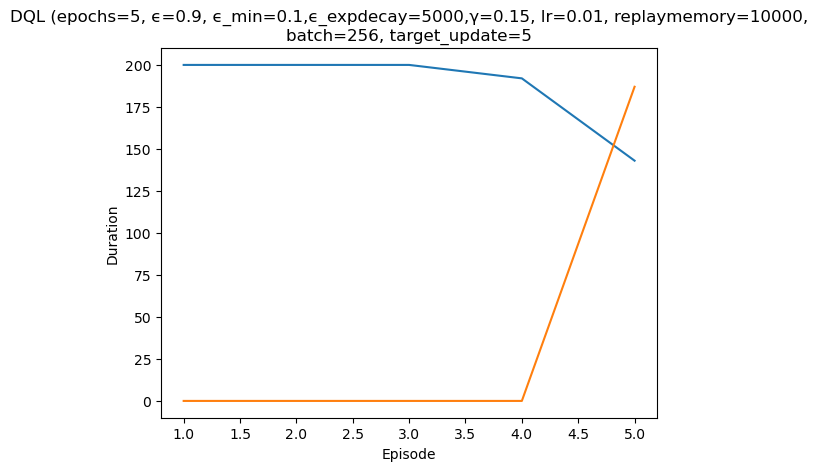

In [16]:
best_dqn_4 = learner.epsilon_greedy_search(
    cyberbattle_gym_env=cyberbattlechain_4,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(ep=ep, gamma=0.15, replay_memory_size=10000, target_update=5, batch_size=256, learning_rate=0.01),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="DQL",
)

###### One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10
Learning with: episode_count=2,iteration_count=200,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/2 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||


Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:03||


Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:03||


Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:05||


Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:05||


Episode 1|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:07||


Episode 1|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:07||


Episode 1|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:08||


Episode 1|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:08||


Episode 1|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:10||


Episode 1|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:10||


Episode 1|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:12||


Episode 1|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:12||


Episode 1|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:13||


Episode 1|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:13||


Episode 1|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:15||


Episode 1|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:15||


Episode 1|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:17||


Episode 1|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 1|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 1|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:19||


Episode 1|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:20||


Episode 1|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:20||


Episode 1|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:22||


Episode 1|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:22||


Episode 1|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:24||


Episode 1|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:24||


Episode 1|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:26||


Episode 1|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:26||


Episode 1|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:28||


Episode 1|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:28||


Episode 1|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:30||


Episode 1|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:30||


Episode 1|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:31||


Episode 1|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:31||


Episode 1|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:33||


Episode 1|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:33||


Episode 1|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:35||


Episode 1|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:35||


Episode 1|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:37||


Episode 1|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:37||


Episode 1|Iteration 22|reward: 1254.0|last_reward_at:   21|Elapsed Time: 0:00:39||


Episode 1|Iteration 22|reward: 1254.0|last_reward_at:   22|Elapsed Time: 0:00:39||


Episode 1|Iteration 23|reward: 1268.0|last_reward_at:   22|Elapsed Time: 0:00:41||


Episode 1|Iteration 23|reward: 1268.0|last_reward_at:   23|Elapsed Time: 0:00:41||


Episode 1|Iteration 24|reward: 1368.0|last_reward_at:   23|Elapsed Time: 0:00:43||


Episode 1|Iteration 24|reward: 1368.0|last_reward_at:   24|Elapsed Time: 0:00:43||


Episode 1|Iteration 25|reward: 1382.0|last_reward_at:   24|Elapsed Time: 0:00:45||


Episode 1|Iteration 25|reward: 1382.0|last_reward_at:   25|Elapsed Time: 0:00:45||


Episode 1|Iteration 26|reward: 1482.0|last_reward_at:   25|Elapsed Time: 0:00:47||


Episode 1|Iteration 26|reward: 1482.0|last_reward_at:   26|Elapsed Time: 0:00:47||


Episode 1|Iteration 27|reward: 1496.0|last_reward_at:   26|Elapsed Time: 0:00:49||


Episode 1|Iteration 27|reward: 1496.0|last_reward_at:   27|Elapsed Time: 0:00:49||


Episode 1|Iteration 28|reward: 1596.0|last_reward_at:   27|Elapsed Time: 0:00:51||


Episode 1|Iteration 28|reward: 1596.0|last_reward_at:   28|Elapsed Time: 0:00:51||


Episode 1|Iteration 29|reward: 1610.0|last_reward_at:   28|Elapsed Time: 0:00:53||


Episode 1|Iteration 29|reward: 1610.0|last_reward_at:   29|Elapsed Time: 0:00:53||


Episode 1|Iteration 30|reward: 1710.0|last_reward_at:   29|Elapsed Time: 0:00:55||


Episode 1|Iteration 30|reward: 1710.0|last_reward_at:   30|Elapsed Time: 0:00:55||


Episode 1|Iteration 31|reward: 1724.0|last_reward_at:   30|Elapsed Time: 0:00:57||


Episode 1|Iteration 31|reward: 1724.0|last_reward_at:   31|Elapsed Time: 0:00:57||


Episode 1|Iteration 32|reward: 1824.0|last_reward_at:   31|Elapsed Time: 0:00:59||


Episode 1|Iteration 32|reward: 1824.0|last_reward_at:   32|Elapsed Time: 0:00:59||


Episode 1|Iteration 33|reward: 1838.0|last_reward_at:   32|Elapsed Time: 0:01:00||


Episode 1|Iteration 33|reward: 1838.0|last_reward_at:   33|Elapsed Time: 0:01:00||


Episode 1|Iteration 34|reward: 1938.0|last_reward_at:   33|Elapsed Time: 0:01:02||


Episode 1|Iteration 34|reward: 1938.0|last_reward_at:   34|Elapsed Time: 0:01:02||


Episode 1|Iteration 35|reward: 1952.0|last_reward_at:   34|Elapsed Time: 0:01:04||


Episode 1|Iteration 35|reward: 1952.0|last_reward_at:   35|Elapsed Time: 0:01:04||


Episode 1|Iteration 36|reward: 2052.0|last_reward_at:   35|Elapsed Time: 0:01:06||


Episode 1|Iteration 36|reward: 2052.0|last_reward_at:   36|Elapsed Time: 0:01:06||


Episode 1|Iteration 37|reward: 2066.0|last_reward_at:   36|Elapsed Time: 0:01:08||


Episode 1|Iteration 37|reward: 2066.0|last_reward_at:   37|Elapsed Time: 0:01:08||


Episode 1|Iteration 38|reward: 2166.0|last_reward_at:   37|Elapsed Time: 0:01:10||


Episode 1|Iteration 38|reward: 2166.0|last_reward_at:   38|Elapsed Time: 0:01:10||


Episode 1|Iteration 39|reward: 2180.0|last_reward_at:   38|Elapsed Time: 0:01:12||


Episode 1|Iteration 39|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:01:12||


Episode 1|Iteration 40|reward: 2280.0|last_reward_at:   39|Elapsed Time: 0:01:13||


Episode 1|Iteration 40|reward: 2280.0|last_reward_at:   40|Elapsed Time: 0:01:13||


Episode 1|Iteration 41|reward: 2294.0|last_reward_at:   40|Elapsed Time: 0:01:15||


Episode 1|Iteration 41|reward: 2294.0|last_reward_at:   41|Elapsed Time: 0:01:16||


Episode 1|Iteration 42|reward: 7294.0|last_reward_at:   41|Elapsed Time: 0:01:17||


Episode 1|Iteration 42|reward: 7294.0|last_reward_at:   42|Elapsed Time: 0:01:17||

  Episode 1 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 2/2 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||


Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:03||


Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:03||


Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:04||


Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:04||


Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:06||


Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:06||


Episode 2|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:08||


Episode 2|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:08||


Episode 2|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:10||


Episode 2|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:10||


Episode 2|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:11||


Episode 2|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:11||


Episode 2|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:13||


Episode 2|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:13||


Episode 2|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:15||


Episode 2|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:15||


Episode 2|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:17||


Episode 2|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 2|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 2|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:19||


Episode 2|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:20||


Episode 2|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:20||


Episode 2|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:22||


Episode 2|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:22||


Episode 2|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:24||


Episode 2|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:24||


Episode 2|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:26||


Episode 2|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:26||


Episode 2|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:27||


Episode 2|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:27||


Episode 2|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:29||


Episode 2|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:29||


Episode 2|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:31||


Episode 2|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:31||


Episode 2|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:33||


Episode 2|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:33||


Episode 2|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:35||


Episode 2|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:35||


Episode 2|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:37||


Episode 2|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:37||


Episode 2|Iteration 22|reward: 1254.0|last_reward_at:   21|Elapsed Time: 0:00:38||


Episode 2|Iteration 22|reward: 1254.0|last_reward_at:   22|Elapsed Time: 0:00:38||


Episode 2|Iteration 23|reward: 1268.0|last_reward_at:   22|Elapsed Time: 0:00:40||


Episode 2|Iteration 23|reward: 1268.0|last_reward_at:   23|Elapsed Time: 0:00:40||


Episode 2|Iteration 24|reward: 1368.0|last_reward_at:   23|Elapsed Time: 0:00:42||


Episode 2|Iteration 24|reward: 1368.0|last_reward_at:   24|Elapsed Time: 0:00:42||


Episode 2|Iteration 25|reward: 1382.0|last_reward_at:   24|Elapsed Time: 0:00:44||


Episode 2|Iteration 25|reward: 1382.0|last_reward_at:   25|Elapsed Time: 0:00:44||


Episode 2|Iteration 26|reward: 1482.0|last_reward_at:   25|Elapsed Time: 0:00:46||


Episode 2|Iteration 26|reward: 1482.0|last_reward_at:   26|Elapsed Time: 0:00:46||


Episode 2|Iteration 27|reward: 1496.0|last_reward_at:   26|Elapsed Time: 0:00:48||


Episode 2|Iteration 27|reward: 1496.0|last_reward_at:   27|Elapsed Time: 0:00:48||


Episode 2|Iteration 28|reward: 1596.0|last_reward_at:   27|Elapsed Time: 0:00:50||


Episode 2|Iteration 28|reward: 1596.0|last_reward_at:   28|Elapsed Time: 0:00:50||


Episode 2|Iteration 29|reward: 1610.0|last_reward_at:   28|Elapsed Time: 0:00:52||


Episode 2|Iteration 29|reward: 1610.0|last_reward_at:   29|Elapsed Time: 0:00:52||


Episode 2|Iteration 30|reward: 1710.0|last_reward_at:   29|Elapsed Time: 0:00:54||


Episode 2|Iteration 30|reward: 1710.0|last_reward_at:   30|Elapsed Time: 0:00:54||


Episode 2|Iteration 31|reward: 1724.0|last_reward_at:   30|Elapsed Time: 0:00:55||


Episode 2|Iteration 31|reward: 1724.0|last_reward_at:   31|Elapsed Time: 0:00:55||


Episode 2|Iteration 32|reward: 1824.0|last_reward_at:   31|Elapsed Time: 0:00:57||


Episode 2|Iteration 32|reward: 1824.0|last_reward_at:   32|Elapsed Time: 0:00:57||


Episode 2|Iteration 33|reward: 1838.0|last_reward_at:   32|Elapsed Time: 0:00:59||


Episode 2|Iteration 33|reward: 1838.0|last_reward_at:   33|Elapsed Time: 0:00:59||


Episode 2|Iteration 34|reward: 1938.0|last_reward_at:   33|Elapsed Time: 0:01:01||


Episode 2|Iteration 34|reward: 1938.0|last_reward_at:   34|Elapsed Time: 0:01:01||


Episode 2|Iteration 35|reward: 1952.0|last_reward_at:   34|Elapsed Time: 0:01:03||


Episode 2|Iteration 35|reward: 1952.0|last_reward_at:   35|Elapsed Time: 0:01:03||


Episode 2|Iteration 36|reward: 2052.0|last_reward_at:   35|Elapsed Time: 0:01:05||


Episode 2|Iteration 36|reward: 2052.0|last_reward_at:   36|Elapsed Time: 0:01:05||


Episode 2|Iteration 37|reward: 2066.0|last_reward_at:   36|Elapsed Time: 0:01:08||


Episode 2|Iteration 37|reward: 2066.0|last_reward_at:   37|Elapsed Time: 0:01:08||


Episode 2|Iteration 38|reward: 2166.0|last_reward_at:   37|Elapsed Time: 0:01:09||


Episode 2|Iteration 38|reward: 2166.0|last_reward_at:   38|Elapsed Time: 0:01:09||


Episode 2|Iteration 39|reward: 2180.0|last_reward_at:   38|Elapsed Time: 0:01:11||


Episode 2|Iteration 39|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:01:11||


Episode 2|Iteration 40|reward: 2280.0|last_reward_at:   39|Elapsed Time: 0:01:13||


Episode 2|Iteration 40|reward: 2280.0|last_reward_at:   40|Elapsed Time: 0:01:13||


Episode 2|Iteration 41|reward: 2294.0|last_reward_at:   40|Elapsed Time: 0:01:15||


Episode 2|Iteration 41|reward: 2294.0|last_reward_at:   41|Elapsed Time: 0:01:15||


Episode 2|Iteration 42|reward: 7294.0|last_reward_at:   41|Elapsed Time: 0:01:17||


Episode 2|Iteration 42|reward: 7294.0|last_reward_at:   42|Elapsed Time: 0:01:17||

  Episode 2 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


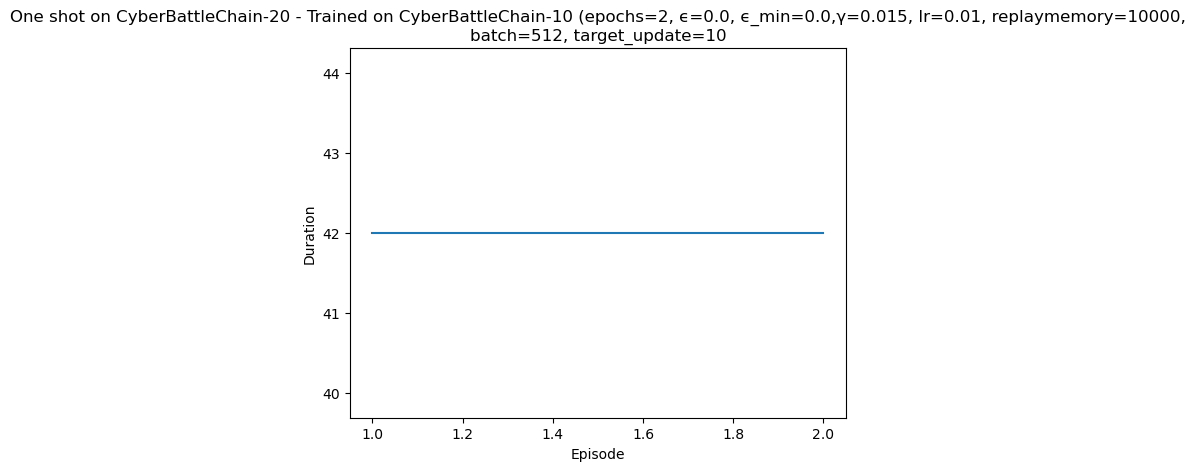

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=2,iteration_count=200,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/2 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 



Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 1|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 1|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 1|Iteration 10|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 1|Iteration 10|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 1|Iteration 15|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 1|Iteration 15|reward:  120.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 1|Iteration 18|reward:  134.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 1|Iteration 18|reward:  134.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 1|Iteration 19|reward:  140.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 1|Iteration 19|reward:  140.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 1|Iteration 20|reward:  148.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 1|Iteration 20|reward:  148.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 1|Iteration 23|reward:  248.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 1|Iteration 23|reward:  248.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 1|Iteration 27|reward:  262.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 1|Iteration 27|reward:  262.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 1|Iteration 32|reward:  268.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 1|Iteration 32|reward:  268.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 1|Iteration 36|reward:  272.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 1|Iteration 36|reward:  272.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 1|Iteration 41|reward:  274.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 1|Iteration 41|reward:  274.0|last_reward_at:   41|Elapsed Time: 0:00:00||


Episode 1|Iteration 42|reward:  374.0|last_reward_at:   41|Elapsed Time: 0:00:00||


Episode 1|Iteration 42|reward:  374.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 1|Iteration 56|reward:  380.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 1|Iteration 56|reward:  380.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 1|Iteration 92|reward:  380.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 1|Iteration 98|reward:  394.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 1|Iteration 98|reward:  394.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 1|Iteration 101|reward:  402.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 1|Iteration 101|reward:  402.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 1|Iteration 104|reward:  408.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 1|Iteration 104|reward:  408.0|last_reward_at:  104|Elapsed Time: 0:00:00||


Episode 1|Iteration 106|reward:  414.0|last_reward_at:  104|Elapsed Time: 0:00:00||


Episode 1|Iteration 106|reward:  414.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 1|Iteration 110|reward:  514.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 1|Iteration 110|reward:  514.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 1|Iteration 134|reward:  528.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 1|Iteration 134|reward:  528.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 1|Iteration 137|reward:  628.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 1|Iteration 137|reward:  628.0|last_reward_at:  137|Elapsed Time: 0:00:00||


Episode 1|Iteration 140|reward:  642.0|last_reward_at:  137|Elapsed Time: 0:00:00||


Episode 1|Iteration 140|reward:  642.0|last_reward_at:  140|Elapsed Time: 0:00:00||


Episode 1|Iteration 142|reward:  742.0|last_reward_at:  140|Elapsed Time: 0:00:00||


Episode 1|Iteration 142|reward:  742.0|last_reward_at:  142|Elapsed Time: 0:00:00||


Episode 1|Iteration 144|reward:  748.0|last_reward_at:  142|Elapsed Time: 0:00:00||


Episode 1|Iteration 144|reward:  748.0|last_reward_at:  144|Elapsed Time: 0:00:00||


Episode 1|Iteration 152|reward:  762.0|last_reward_at:  144|Elapsed Time: 0:00:00||


Episode 1|Iteration 152|reward:  762.0|last_reward_at:  152|Elapsed Time: 0:00:00||


Episode 1|Iteration 153|reward:  764.0|last_reward_at:  152|Elapsed Time: 0:00:00||


Episode 1|Iteration 153|reward:  764.0|last_reward_at:  153|Elapsed Time: 0:00:00||


Episode 1|Iteration 154|reward:  768.0|last_reward_at:  153|Elapsed Time: 0:00:00||


Episode 1|Iteration 154|reward:  768.0|last_reward_at:  154|Elapsed Time: 0:00:00||


Episode 1|Iteration 155|reward:  868.0|last_reward_at:  154|Elapsed Time: 0:00:00||


Episode 1|Iteration 155|reward:  868.0|last_reward_at:  155|Elapsed Time: 0:00:00||


Episode 1|Iteration 156|reward:  882.0|last_reward_at:  155|Elapsed Time: 0:00:00||


Episode 1|Iteration 156|reward:  882.0|last_reward_at:  156|Elapsed Time: 0:00:00||


Episode 1|Iteration 157|reward:  888.0|last_reward_at:  156|Elapsed Time: 0:00:00||


Episode 1|Iteration 157|reward:  888.0|last_reward_at:  157|Elapsed Time: 0:00:00||


Episode 1|Iteration 158|reward:  894.0|last_reward_at:  157|Elapsed Time: 0:00:00||


Episode 1|Iteration 158|reward:  894.0|last_reward_at:  158|Elapsed Time: 0:00:00||


Episode 1|Iteration 164|reward:  900.0|last_reward_at:  158|Elapsed Time: 0:00:00||


Episode 1|Iteration 164|reward:  900.0|last_reward_at:  164|Elapsed Time: 0:00:00||


Episode 1|Iteration 169|reward:  906.0|last_reward_at:  164|Elapsed Time: 0:00:00||


Episode 1|Iteration 169|reward:  906.0|last_reward_at:  169|Elapsed Time: 0:00:00||


Episode 1|Iteration 170|reward:  908.0|last_reward_at:  169|Elapsed Time: 0:00:00||


Episode 1|Iteration 170|reward:  908.0|last_reward_at:  170|Elapsed Time: 0:00:00||


Episode 1|Iteration 175|reward: 1008.0|last_reward_at:  170|Elapsed Time: 0:00:00||


Episode 1|Iteration 175|reward: 1008.0|last_reward_at:  175|Elapsed Time: 0:00:00||


Episode 1|Iteration 185|reward: 1008.0|last_reward_at:  175|Elapsed Time: 0:00:00||


Episode 1|Iteration 187|reward: 1014.0|last_reward_at:  175|Elapsed Time: 0:00:00||


Episode 1|Iteration 187|reward: 1014.0|last_reward_at:  187|Elapsed Time: 0:00:00||


Episode 1|Iteration 195|reward: 1014.0|last_reward_at:  187|Elapsed Time: 0:00:00||


Episode 1|Iteration 200|reward: 1014.0|last_reward_at:  187|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/75 (0.16)
    explore-remote: 14/89 (0.14)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 8/0 (1.00)
  exploit deflected to exploration: 19
  ## Episode: 2/2 'Credential lookups (ϵ-greedy)' ϵ=0.8842, 



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 2|Iteration 6|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 2|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 2|Iteration 7|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 2|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 2|Iteration 8|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 2|Iteration 8|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 2|Iteration 9|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 2|Iteration 9|reward:  136.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 2|Iteration 10|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 2|Iteration 10|reward:  236.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 2|Iteration 13|reward:  250.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 2|Iteration 13|reward:  250.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 2|Iteration 16|reward:  256.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 2|Iteration 16|reward:  256.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 2|Iteration 20|reward:  356.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 2|Iteration 20|reward:  356.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 2|Iteration 21|reward:  358.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 2|Iteration 21|reward:  358.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 2|Iteration 26|reward:  369.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 2|Iteration 26|reward:  369.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 2|Iteration 27|reward:  375.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 2|Iteration 27|reward:  375.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 2|Iteration 31|reward:  377.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 2|Iteration 31|reward:  377.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 2|Iteration 34|reward:  383.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 2|Iteration 34|reward:  383.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 2|Iteration 35|reward:  391.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 2|Iteration 35|reward:  391.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 2|Iteration 56|reward:  400.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 2|Iteration 56|reward:  400.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 2|Iteration 58|reward:  406.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 2|Iteration 58|reward:  406.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 2|Iteration 61|reward:  506.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 2|Iteration 61|reward:  506.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 2|Iteration 69|reward:  520.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 2|Iteration 69|reward:  520.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 2|Iteration 70|reward:  620.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 2|Iteration 70|reward:  620.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 2|Iteration 71|reward:  622.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 2|Iteration 71|reward:  622.0|last_reward_at:   71|Elapsed Time: 0:00:00||


Episode 2|Iteration 74|reward:  624.0|last_reward_at:   71|Elapsed Time: 0:00:00||


Episode 2|Iteration 74|reward:  624.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 2|Iteration 82|reward:  638.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 2|Iteration 82|reward:  638.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 2|Iteration 86|reward:  644.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 2|Iteration 86|reward:  644.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 2|Iteration 94|reward:  744.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 2|Iteration 94|reward:  744.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 2|Iteration 106|reward:  755.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 2|Iteration 106|reward:  755.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 2|Iteration 115|reward:  759.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 2|Iteration 115|reward:  759.0|last_reward_at:  115|Elapsed Time: 0:00:00||


Episode 2|Iteration 120|reward:  765.0|last_reward_at:  115|Elapsed Time: 0:00:00||


Episode 2|Iteration 120|reward:  765.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 2|Iteration 130|reward:  771.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 2|Iteration 130|reward:  771.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 2|Iteration 136|reward:  773.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 2|Iteration 136|reward:  773.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 2|Iteration 147|reward:  773.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 2|Iteration 160|reward:  773.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 2|Iteration 173|reward:  773.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 2|Iteration 173|reward:  779.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 2|Iteration 173|reward:  779.0|last_reward_at:  173|Elapsed Time: 0:00:00||


Episode 2|Iteration 181|reward:  781.0|last_reward_at:  173|Elapsed Time: 0:00:00||


Episode 2|Iteration 181|reward:  781.0|last_reward_at:  181|Elapsed Time: 0:00:00||


Episode 2|Iteration 195|reward:  781.0|last_reward_at:  181|Elapsed Time: 0:00:00||


Episode 2|Iteration 200|reward:  781.0|last_reward_at:  181|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/71 (0.14)
    explore-remote: 14/97 (0.13)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/0 (1.00)
  exploit deflected to exploration: 13
simulation ended


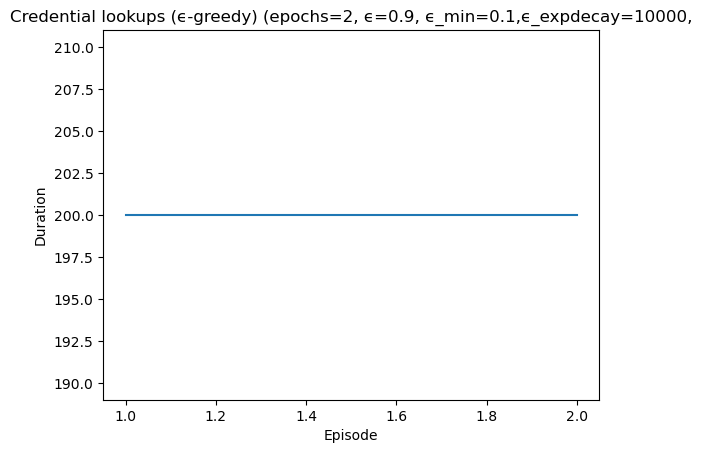

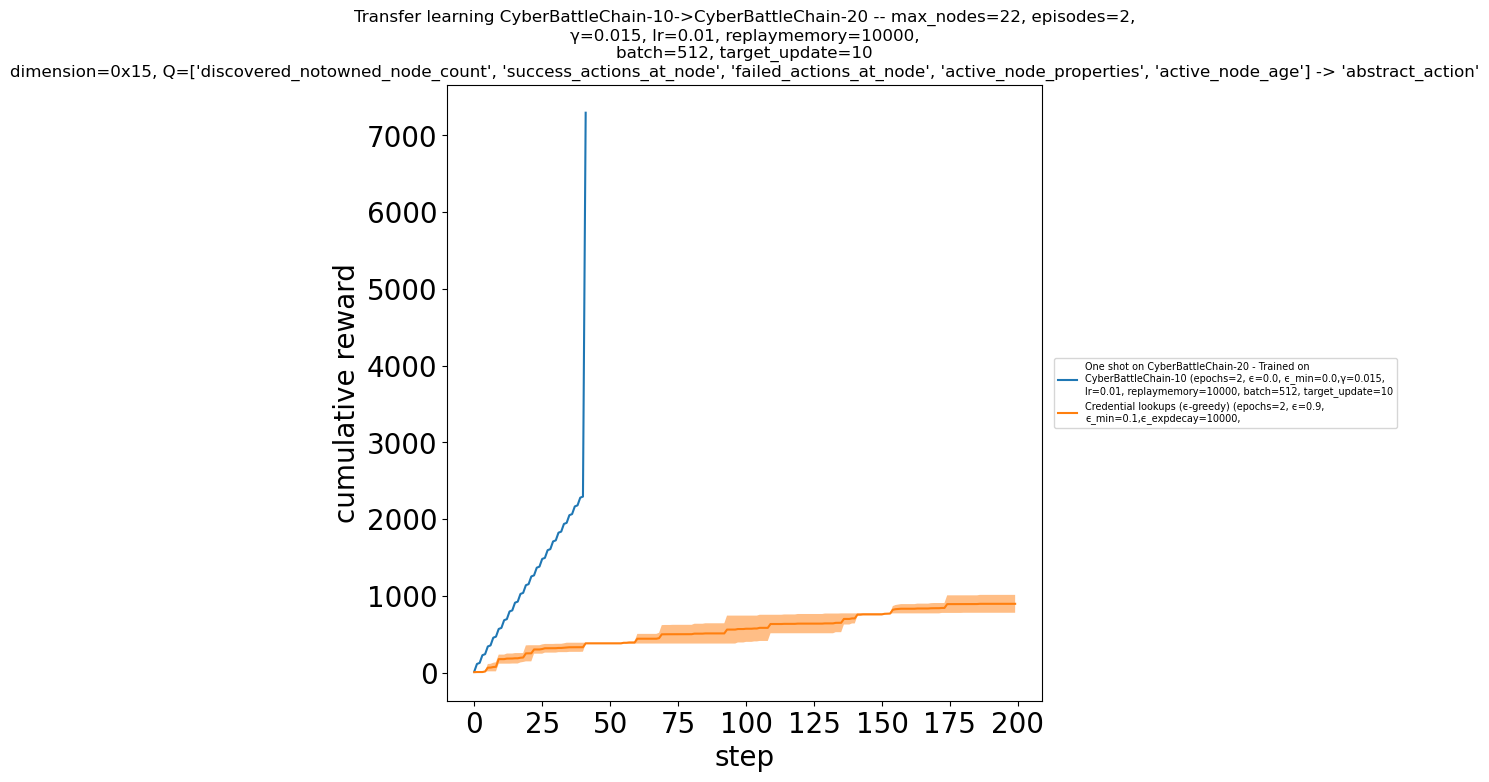

###### One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4
Learning with: episode_count=2,iteration_count=200,ϵ=0.0,ϵ_min=0.0, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5
  ## Episode: 1/2 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||


Episode 1|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:02||


Episode 1|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:02||


Episode 1|Iteration 3|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:04||


Episode 1|Iteration 4|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:05||


Episode 1|Iteration 5|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:07||


Episode 1|Iteration 6|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:08||


Episode 1|Iteration 7|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:10||


Episode 1|Iteration 8|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:11||


Episode 1|Iteration 9|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:12||


Episode 1|Iteration 10|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:14||


Episode 1|Iteration 11|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:15||


Episode 1|Iteration 12|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:17||


Episode 1|Iteration 13|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:20||


Episode 1|Iteration 14|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:21||


Episode 1|Iteration 15|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:23||


Episode 1|Iteration 16|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:24||


Episode 1|Iteration 16|reward:  118.0|last_reward_at:   16|Elapsed Time: 0:00:24||


Episode 1|Iteration 17|reward:  132.0|last_reward_at:   16|Elapsed Time: 0:00:26||


Episode 1|Iteration 17|reward:  132.0|last_reward_at:   17|Elapsed Time: 0:00:26||


Episode 1|Iteration 18|reward:  138.0|last_reward_at:   17|Elapsed Time: 0:00:27||


Episode 1|Iteration 18|reward:  138.0|last_reward_at:   18|Elapsed Time: 0:00:27||


Episode 1|Iteration 19|reward:  138.0|last_reward_at:   18|Elapsed Time: 0:00:28||


Episode 1|Iteration 20|reward:  138.0|last_reward_at:   18|Elapsed Time: 0:00:31||


Episode 1|Iteration 21|reward:  138.0|last_reward_at:   18|Elapsed Time: 0:00:33||


Episode 1|Iteration 22|reward:  138.0|last_reward_at:   18|Elapsed Time: 0:00:34||


Episode 1|Iteration 23|reward:  238.0|last_reward_at:   18|Elapsed Time: 0:00:36||


Episode 1|Iteration 23|reward:  238.0|last_reward_at:   23|Elapsed Time: 0:00:36||


Episode 1|Iteration 24|reward:  252.0|last_reward_at:   23|Elapsed Time: 0:00:37||


Episode 1|Iteration 24|reward:  252.0|last_reward_at:   24|Elapsed Time: 0:00:37||


Episode 1|Iteration 25|reward:  258.0|last_reward_at:   24|Elapsed Time: 0:00:38||


Episode 1|Iteration 25|reward:  258.0|last_reward_at:   25|Elapsed Time: 0:00:38||


Episode 1|Iteration 26|reward:  258.0|last_reward_at:   25|Elapsed Time: 0:00:41||


Episode 1|Iteration 27|reward:  258.0|last_reward_at:   25|Elapsed Time: 0:00:43||


Episode 1|Iteration 28|reward:  358.0|last_reward_at:   25|Elapsed Time: 0:00:44||


Episode 1|Iteration 28|reward:  358.0|last_reward_at:   28|Elapsed Time: 0:00:44||


Episode 1|Iteration 29|reward:  372.0|last_reward_at:   28|Elapsed Time: 0:00:46||


Episode 1|Iteration 29|reward:  372.0|last_reward_at:   29|Elapsed Time: 0:00:46||


Episode 1|Iteration 30|reward:  378.0|last_reward_at:   29|Elapsed Time: 0:00:47||


Episode 1|Iteration 30|reward:  378.0|last_reward_at:   30|Elapsed Time: 0:00:47||


Episode 1|Iteration 31|reward:  478.0|last_reward_at:   30|Elapsed Time: 0:00:49||


Episode 1|Iteration 31|reward:  478.0|last_reward_at:   31|Elapsed Time: 0:00:49||


Episode 1|Iteration 32|reward:  492.0|last_reward_at:   31|Elapsed Time: 0:00:50||


Episode 1|Iteration 32|reward:  492.0|last_reward_at:   32|Elapsed Time: 0:00:50||


Episode 1|Iteration 33|reward:  498.0|last_reward_at:   32|Elapsed Time: 0:00:52||


Episode 1|Iteration 33|reward:  498.0|last_reward_at:   33|Elapsed Time: 0:00:52||


Episode 1|Iteration 34|reward:  498.0|last_reward_at:   33|Elapsed Time: 0:00:53||


Episode 1|Iteration 35|reward:  504.0|last_reward_at:   33|Elapsed Time: 0:00:55||


Episode 1|Iteration 35|reward:  504.0|last_reward_at:   35|Elapsed Time: 0:00:55||


Episode 1|Iteration 36|reward:  504.0|last_reward_at:   35|Elapsed Time: 0:00:56||


Episode 1|Iteration 37|reward:  604.0|last_reward_at:   35|Elapsed Time: 0:00:58||


Episode 1|Iteration 37|reward:  604.0|last_reward_at:   37|Elapsed Time: 0:00:58||


Episode 1|Iteration 38|reward:  618.0|last_reward_at:   37|Elapsed Time: 0:00:59||


Episode 1|Iteration 38|reward:  618.0|last_reward_at:   38|Elapsed Time: 0:00:59||


Episode 1|Iteration 39|reward:  624.0|last_reward_at:   38|Elapsed Time: 0:01:01||


Episode 1|Iteration 39|reward:  624.0|last_reward_at:   39|Elapsed Time: 0:01:01||


Episode 1|Iteration 40|reward:  624.0|last_reward_at:   39|Elapsed Time: 0:01:03||


Episode 1|Iteration 41|reward:  624.0|last_reward_at:   39|Elapsed Time: 0:01:04||


Episode 1|Iteration 42|reward:  624.0|last_reward_at:   39|Elapsed Time: 0:01:06||


Episode 1|Iteration 43|reward:  624.0|last_reward_at:   39|Elapsed Time: 0:01:07||


Episode 1|Iteration 44|reward:  624.0|last_reward_at:   39|Elapsed Time: 0:01:09||


Episode 1|Iteration 45|reward:  630.0|last_reward_at:   39|Elapsed Time: 0:01:10||


Episode 1|Iteration 45|reward:  630.0|last_reward_at:   45|Elapsed Time: 0:01:10||


Episode 1|Iteration 46|reward:  630.0|last_reward_at:   45|Elapsed Time: 0:01:12||


Episode 1|Iteration 47|reward:  630.0|last_reward_at:   45|Elapsed Time: 0:01:14||


Episode 1|Iteration 48|reward:  630.0|last_reward_at:   45|Elapsed Time: 0:01:15||


Episode 1|Iteration 49|reward:  730.0|last_reward_at:   45|Elapsed Time: 0:01:17||


Episode 1|Iteration 49|reward:  730.0|last_reward_at:   49|Elapsed Time: 0:01:17||


Episode 1|Iteration 50|reward:  744.0|last_reward_at:   49|Elapsed Time: 0:01:19||


Episode 1|Iteration 50|reward:  744.0|last_reward_at:   50|Elapsed Time: 0:01:19||


Episode 1|Iteration 51|reward:  844.0|last_reward_at:   50|Elapsed Time: 0:01:21||


Episode 1|Iteration 51|reward:  844.0|last_reward_at:   51|Elapsed Time: 0:01:21||


Episode 1|Iteration 52|reward:  858.0|last_reward_at:   51|Elapsed Time: 0:01:22||


Episode 1|Iteration 52|reward:  858.0|last_reward_at:   52|Elapsed Time: 0:01:22||


Episode 1|Iteration 53|reward:  864.0|last_reward_at:   52|Elapsed Time: 0:01:24||


Episode 1|Iteration 53|reward:  864.0|last_reward_at:   53|Elapsed Time: 0:01:24||


Episode 1|Iteration 54|reward:  864.0|last_reward_at:   53|Elapsed Time: 0:01:25||


Episode 1|Iteration 55|reward:  964.0|last_reward_at:   53|Elapsed Time: 0:01:27||


Episode 1|Iteration 55|reward:  964.0|last_reward_at:   55|Elapsed Time: 0:01:27||


Episode 1|Iteration 56|reward:  978.0|last_reward_at:   55|Elapsed Time: 0:01:28||


Episode 1|Iteration 56|reward:  978.0|last_reward_at:   56|Elapsed Time: 0:01:28||


Episode 1|Iteration 57|reward:  978.0|last_reward_at:   56|Elapsed Time: 0:01:30||


Episode 1|Iteration 58|reward:  982.0|last_reward_at:   56|Elapsed Time: 0:01:32||


Episode 1|Iteration 58|reward:  982.0|last_reward_at:   58|Elapsed Time: 0:01:32||


Episode 1|Iteration 59|reward:  982.0|last_reward_at:   58|Elapsed Time: 0:01:33||


Episode 1|Iteration 60|reward:  982.0|last_reward_at:   58|Elapsed Time: 0:01:35||


Episode 1|Iteration 61|reward:  982.0|last_reward_at:   58|Elapsed Time: 0:01:37||


Episode 1|Iteration 62|reward:  982.0|last_reward_at:   58|Elapsed Time: 0:01:38||


Episode 1|Iteration 63|reward:  982.0|last_reward_at:   58|Elapsed Time: 0:01:40||


Episode 1|Iteration 64|reward:  982.0|last_reward_at:   58|Elapsed Time: 0:01:41||


Episode 1|Iteration 65|reward:  982.0|last_reward_at:   58|Elapsed Time: 0:01:43||


Episode 1|Iteration 66|reward:  982.0|last_reward_at:   58|Elapsed Time: 0:01:44||


Episode 1|Iteration 67|reward:  982.0|last_reward_at:   58|Elapsed Time: 0:01:46||


Episode 1|Iteration 68|reward:  982.0|last_reward_at:   58|Elapsed Time: 0:01:47||


Episode 1|Iteration 69|reward:  988.0|last_reward_at:   58|Elapsed Time: 0:01:49||


Episode 1|Iteration 69|reward:  988.0|last_reward_at:   69|Elapsed Time: 0:01:49||


Episode 1|Iteration 70|reward:  988.0|last_reward_at:   69|Elapsed Time: 0:01:51||


Episode 1|Iteration 71|reward:  988.0|last_reward_at:   69|Elapsed Time: 0:01:52||


Episode 1|Iteration 72|reward:  988.0|last_reward_at:   69|Elapsed Time: 0:01:54||


Episode 1|Iteration 73|reward:  990.0|last_reward_at:   69|Elapsed Time: 0:01:56||


Episode 1|Iteration 73|reward:  990.0|last_reward_at:   73|Elapsed Time: 0:01:56||


Episode 1|Iteration 74|reward:  990.0|last_reward_at:   73|Elapsed Time: 0:01:58||


Episode 1|Iteration 75|reward: 1090.0|last_reward_at:   73|Elapsed Time: 0:01:59||


Episode 1|Iteration 75|reward: 1090.0|last_reward_at:   75|Elapsed Time: 0:01:59||


Episode 1|Iteration 76|reward: 1104.0|last_reward_at:   75|Elapsed Time: 0:02:01||


Episode 1|Iteration 76|reward: 1104.0|last_reward_at:   76|Elapsed Time: 0:02:01||


Episode 1|Iteration 77|reward: 1104.0|last_reward_at:   76|Elapsed Time: 0:02:03||


Episode 1|Iteration 78|reward: 1104.0|last_reward_at:   76|Elapsed Time: 0:02:04||


Episode 1|Iteration 79|reward: 1104.0|last_reward_at:   76|Elapsed Time: 0:02:06||


Episode 1|Iteration 80|reward: 1104.0|last_reward_at:   76|Elapsed Time: 0:02:08||


Episode 1|Iteration 81|reward: 1104.0|last_reward_at:   76|Elapsed Time: 0:02:09||


Episode 1|Iteration 82|reward: 1110.0|last_reward_at:   76|Elapsed Time: 0:02:11||


Episode 1|Iteration 82|reward: 1110.0|last_reward_at:   82|Elapsed Time: 0:02:11||


Episode 1|Iteration 83|reward: 1210.0|last_reward_at:   82|Elapsed Time: 0:02:13||


Episode 1|Iteration 83|reward: 1210.0|last_reward_at:   83|Elapsed Time: 0:02:13||


Episode 1|Iteration 84|reward: 1224.0|last_reward_at:   83|Elapsed Time: 0:02:14||


Episode 1|Iteration 84|reward: 1224.0|last_reward_at:   84|Elapsed Time: 0:02:14||


Episode 1|Iteration 85|reward: 1224.0|last_reward_at:   84|Elapsed Time: 0:02:16||


Episode 1|Iteration 86|reward: 1230.0|last_reward_at:   84|Elapsed Time: 0:02:18||


Episode 1|Iteration 86|reward: 1230.0|last_reward_at:   86|Elapsed Time: 0:02:18||


Episode 1|Iteration 87|reward: 1230.0|last_reward_at:   86|Elapsed Time: 0:02:19||


Episode 1|Iteration 88|reward: 1236.0|last_reward_at:   86|Elapsed Time: 0:02:21||


Episode 1|Iteration 88|reward: 1236.0|last_reward_at:   88|Elapsed Time: 0:02:21||


Episode 1|Iteration 89|reward: 1236.0|last_reward_at:   88|Elapsed Time: 0:02:23||


Episode 1|Iteration 90|reward: 1236.0|last_reward_at:   88|Elapsed Time: 0:02:24||


Episode 1|Iteration 91|reward: 1236.0|last_reward_at:   88|Elapsed Time: 0:02:26||


Episode 1|Iteration 92|reward: 1236.0|last_reward_at:   88|Elapsed Time: 0:02:27||


Episode 1|Iteration 93|reward: 1236.0|last_reward_at:   88|Elapsed Time: 0:02:29||


Episode 1|Iteration 94|reward: 1236.0|last_reward_at:   88|Elapsed Time: 0:02:31||


Episode 1|Iteration 95|reward: 1236.0|last_reward_at:   88|Elapsed Time: 0:02:32||


Episode 1|Iteration 96|reward: 1236.0|last_reward_at:   88|Elapsed Time: 0:02:34||


Episode 1|Iteration 97|reward: 1236.0|last_reward_at:   88|Elapsed Time: 0:02:35||


Episode 1|Iteration 98|reward: 1236.0|last_reward_at:   88|Elapsed Time: 0:02:37||


Episode 1|Iteration 99|reward: 6236.0|last_reward_at:   88|Elapsed Time: 0:02:39||


Episode 1|Iteration 99|reward: 6236.0|last_reward_at:   99|Elapsed Time: 0:02:39||

  Episode 1 ended at t=99 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 19/9 (0.68)
    exploit-remote: 7/25 (0.22)
    exploit-connect: 11/27 (0.29)
  exploit deflected to exploration: 1
  ## Episode: 2/2 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||


Episode 2|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:02||


Episode 2|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:02||


Episode 2|Iteration 3|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:04||


Episode 2|Iteration 4|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:05||


Episode 2|Iteration 5|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:07||


Episode 2|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:07||


Episode 2|Iteration 6|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:08||


Episode 2|Iteration 6|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:08||


Episode 2|Iteration 7|reward:  138.0|last_reward_at:    6|Elapsed Time: 0:00:10||


Episode 2|Iteration 7|reward:  138.0|last_reward_at:    7|Elapsed Time: 0:00:10||


Episode 2|Iteration 8|reward:  238.0|last_reward_at:    7|Elapsed Time: 0:00:11||


Episode 2|Iteration 8|reward:  238.0|last_reward_at:    8|Elapsed Time: 0:00:11||


Episode 2|Iteration 9|reward:  252.0|last_reward_at:    8|Elapsed Time: 0:00:13||


Episode 2|Iteration 9|reward:  252.0|last_reward_at:    9|Elapsed Time: 0:00:13||


Episode 2|Iteration 10|reward:  258.0|last_reward_at:    9|Elapsed Time: 0:00:14||


Episode 2|Iteration 10|reward:  258.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 2|Iteration 11|reward:  258.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 2|Iteration 12|reward:  258.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 2|Iteration 13|reward:  258.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 2|Iteration 14|reward:  358.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 2|Iteration 14|reward:  358.0|last_reward_at:   14|Elapsed Time: 0:00:20||


Episode 2|Iteration 15|reward:  372.0|last_reward_at:   14|Elapsed Time: 0:00:22||


Episode 2|Iteration 15|reward:  372.0|last_reward_at:   15|Elapsed Time: 0:00:22||


Episode 2|Iteration 16|reward:  472.0|last_reward_at:   15|Elapsed Time: 0:00:23||


Episode 2|Iteration 16|reward:  472.0|last_reward_at:   16|Elapsed Time: 0:00:23||


Episode 2|Iteration 17|reward:  486.0|last_reward_at:   16|Elapsed Time: 0:00:26||


Episode 2|Iteration 17|reward:  486.0|last_reward_at:   17|Elapsed Time: 0:00:26||


Episode 2|Iteration 18|reward:  492.0|last_reward_at:   17|Elapsed Time: 0:00:28||


Episode 2|Iteration 18|reward:  492.0|last_reward_at:   18|Elapsed Time: 0:00:28||


Episode 2|Iteration 19|reward:  498.0|last_reward_at:   18|Elapsed Time: 0:00:29||


Episode 2|Iteration 19|reward:  498.0|last_reward_at:   19|Elapsed Time: 0:00:29||


Episode 2|Iteration 20|reward:  598.0|last_reward_at:   19|Elapsed Time: 0:00:31||


Episode 2|Iteration 20|reward:  598.0|last_reward_at:   20|Elapsed Time: 0:00:31||


Episode 2|Iteration 21|reward:  612.0|last_reward_at:   20|Elapsed Time: 0:00:32||


Episode 2|Iteration 21|reward:  612.0|last_reward_at:   21|Elapsed Time: 0:00:32||


Episode 2|Iteration 22|reward:  618.0|last_reward_at:   21|Elapsed Time: 0:00:34||


Episode 2|Iteration 22|reward:  618.0|last_reward_at:   22|Elapsed Time: 0:00:34||


Episode 2|Iteration 23|reward:  718.0|last_reward_at:   22|Elapsed Time: 0:00:35||


Episode 2|Iteration 23|reward:  718.0|last_reward_at:   23|Elapsed Time: 0:00:35||


Episode 2|Iteration 24|reward:  732.0|last_reward_at:   23|Elapsed Time: 0:00:40||


Episode 2|Iteration 24|reward:  732.0|last_reward_at:   24|Elapsed Time: 0:00:40||


Episode 2|Iteration 25|reward:  732.0|last_reward_at:   24|Elapsed Time: 0:00:41||


Episode 2|Iteration 26|reward:  734.0|last_reward_at:   24|Elapsed Time: 0:00:43||


Episode 2|Iteration 26|reward:  734.0|last_reward_at:   26|Elapsed Time: 0:00:43||


Episode 2|Iteration 27|reward:  734.0|last_reward_at:   26|Elapsed Time: 0:00:44||


Episode 2|Iteration 28|reward:  740.0|last_reward_at:   26|Elapsed Time: 0:00:46||


Episode 2|Iteration 28|reward:  740.0|last_reward_at:   28|Elapsed Time: 0:00:46||


Episode 2|Iteration 29|reward:  740.0|last_reward_at:   28|Elapsed Time: 0:00:47||


Episode 2|Iteration 30|reward:  740.0|last_reward_at:   28|Elapsed Time: 0:00:49||


Episode 2|Iteration 31|reward:  740.0|last_reward_at:   28|Elapsed Time: 0:00:50||


Episode 2|Iteration 32|reward:  840.0|last_reward_at:   28|Elapsed Time: 0:00:52||


Episode 2|Iteration 32|reward:  840.0|last_reward_at:   32|Elapsed Time: 0:00:52||


Episode 2|Iteration 33|reward:  854.0|last_reward_at:   32|Elapsed Time: 0:00:57||


Episode 2|Iteration 33|reward:  854.0|last_reward_at:   33|Elapsed Time: 0:00:57||


Episode 2|Iteration 34|reward:  854.0|last_reward_at:   33|Elapsed Time: 0:00:58||


Episode 2|Iteration 35|reward:  854.0|last_reward_at:   33|Elapsed Time: 0:01:00||


Episode 2|Iteration 36|reward:  860.0|last_reward_at:   33|Elapsed Time: 0:01:02||


Episode 2|Iteration 36|reward:  860.0|last_reward_at:   36|Elapsed Time: 0:01:02||


Episode 2|Iteration 37|reward:  866.0|last_reward_at:   36|Elapsed Time: 0:01:03||


Episode 2|Iteration 37|reward:  866.0|last_reward_at:   37|Elapsed Time: 0:01:03||


Episode 2|Iteration 38|reward:  966.0|last_reward_at:   37|Elapsed Time: 0:01:05||


Episode 2|Iteration 38|reward:  966.0|last_reward_at:   38|Elapsed Time: 0:01:05||


Episode 2|Iteration 39|reward:  980.0|last_reward_at:   38|Elapsed Time: 0:01:07||


Episode 2|Iteration 39|reward:  980.0|last_reward_at:   39|Elapsed Time: 0:01:07||


Episode 2|Iteration 40|reward:  986.0|last_reward_at:   39|Elapsed Time: 0:01:08||


Episode 2|Iteration 40|reward:  986.0|last_reward_at:   40|Elapsed Time: 0:01:08||


Episode 2|Iteration 41|reward: 1086.0|last_reward_at:   40|Elapsed Time: 0:01:09||


Episode 2|Iteration 41|reward: 1086.0|last_reward_at:   41|Elapsed Time: 0:01:09||


Episode 2|Iteration 42|reward: 1100.0|last_reward_at:   41|Elapsed Time: 0:01:11||


Episode 2|Iteration 42|reward: 1100.0|last_reward_at:   42|Elapsed Time: 0:01:11||


Episode 2|Iteration 43|reward: 1106.0|last_reward_at:   42|Elapsed Time: 0:01:13||


Episode 2|Iteration 43|reward: 1106.0|last_reward_at:   43|Elapsed Time: 0:01:13||


Episode 2|Iteration 44|reward: 1206.0|last_reward_at:   43|Elapsed Time: 0:01:14||


Episode 2|Iteration 44|reward: 1206.0|last_reward_at:   44|Elapsed Time: 0:01:14||


Episode 2|Iteration 45|reward: 1220.0|last_reward_at:   44|Elapsed Time: 0:01:18||


Episode 2|Iteration 45|reward: 1220.0|last_reward_at:   45|Elapsed Time: 0:01:18||


Episode 2|Iteration 46|reward: 1222.0|last_reward_at:   45|Elapsed Time: 0:01:20||


Episode 2|Iteration 46|reward: 1222.0|last_reward_at:   46|Elapsed Time: 0:01:20||


Episode 2|Iteration 47|reward: 1228.0|last_reward_at:   46|Elapsed Time: 0:01:22||


Episode 2|Iteration 47|reward: 1228.0|last_reward_at:   47|Elapsed Time: 0:01:22||


Episode 2|Iteration 48|reward: 6228.0|last_reward_at:   47|Elapsed Time: 0:01:24||


Episode 2|Iteration 48|reward: 6228.0|last_reward_at:   48|Elapsed Time: 0:01:24||

  Episode 2 ended at t=48 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 20/3 (0.87)
    exploit-remote: 5/1 (0.83)
    exploit-connect: 11/8 (0.58)
  exploit deflected to exploration: 0
simulation ended


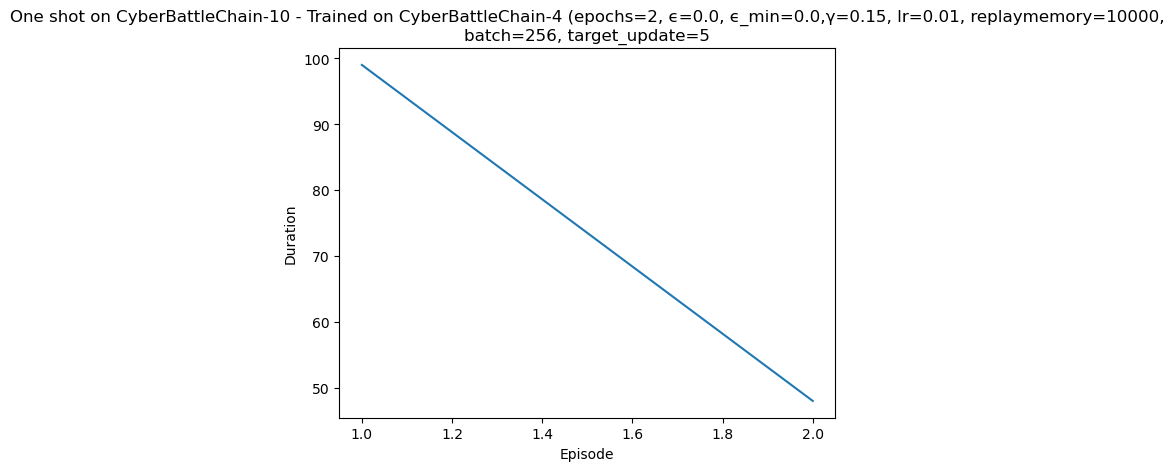

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=2,iteration_count=200,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/2 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 



Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 13|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 13|reward:   14.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 1|Iteration 14|reward:  114.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 1|Iteration 14|reward:  114.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 1|Iteration 15|reward:  116.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 1|Iteration 15|reward:  116.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 1|Iteration 22|reward:  118.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 1|Iteration 22|reward:  118.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 1|Iteration 28|reward:  132.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 1|Iteration 28|reward:  132.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 1|Iteration 35|reward:  140.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 1|Iteration 35|reward:  140.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 1|Iteration 39|reward:  146.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 1|Iteration 39|reward:  146.0|last_reward_at:   39|Elapsed Time: 0:00:00||


Episode 1|Iteration 46|reward:  246.0|last_reward_at:   39|Elapsed Time: 0:00:00||


Episode 1|Iteration 46|reward:  246.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 1|Iteration 52|reward:  257.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 1|Iteration 52|reward:  257.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 1|Iteration 57|reward:  263.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 1|Iteration 57|reward:  263.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 1|Iteration 60|reward:  267.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 1|Iteration 60|reward:  267.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 1|Iteration 87|reward:  267.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 1|Iteration 89|reward:  269.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 1|Iteration 89|reward:  269.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 1|Iteration 112|reward:  269.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 1|Iteration 112|reward:  278.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 1|Iteration 112|reward:  278.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 1|Iteration 130|reward:  378.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 1|Iteration 130|reward:  378.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 1|Iteration 156|reward:  389.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 1|Iteration 156|reward:  389.0|last_reward_at:  156|Elapsed Time: 0:00:00||


Episode 1|Iteration 165|reward:  397.0|last_reward_at:  156|Elapsed Time: 0:00:00||


Episode 1|Iteration 165|reward:  397.0|last_reward_at:  165|Elapsed Time: 0:00:00||


Episode 1|Iteration 166|reward:  403.0|last_reward_at:  165|Elapsed Time: 0:00:00||


Episode 1|Iteration 166|reward:  403.0|last_reward_at:  166|Elapsed Time: 0:00:00||


Episode 1|Iteration 188|reward:  403.0|last_reward_at:  166|Elapsed Time: 0:00:00||


Episode 1|Iteration 200|reward:  403.0|last_reward_at:  166|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/70 (0.08)
    explore-remote: 8/113 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/0 (1.00)
  exploit deflected to exploration: 20
  ## Episode: 2/2 'Credential lookups (ϵ-greedy)' ϵ=0.8842, 



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 2|Iteration 5|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 2|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 2|Iteration 11|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 2|Iteration 11|reward:  118.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 2|Iteration 14|reward:  129.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 2|Iteration 14|reward:  129.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 2|Iteration 15|reward:  137.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 2|Iteration 15|reward:  137.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 2|Iteration 34|reward:  146.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 2|Iteration 34|reward:  146.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 2|Iteration 35|reward:  246.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 2|Iteration 35|reward:  246.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 2|Iteration 41|reward:  252.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 2|Iteration 41|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:00:00||


Episode 2|Iteration 47|reward:  263.0|last_reward_at:   41|Elapsed Time: 0:00:00||


Episode 2|Iteration 47|reward:  263.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 2|Iteration 64|reward:  267.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 2|Iteration 64|reward:  267.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 2|Iteration 77|reward:  269.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 2|Iteration 77|reward:  269.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 2|Iteration 84|reward:  278.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 2|Iteration 84|reward:  278.0|last_reward_at:   84|Elapsed Time: 0:00:00||


Episode 2|Iteration 97|reward:  378.0|last_reward_at:   84|Elapsed Time: 0:00:00||


Episode 2|Iteration 97|reward:  378.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 2|Iteration 117|reward:  378.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 2|Iteration 123|reward:  389.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 2|Iteration 123|reward:  389.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 2|Iteration 125|reward:  397.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 2|Iteration 125|reward:  397.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 2|Iteration 126|reward:  403.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 2|Iteration 126|reward:  403.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 2|Iteration 137|reward:  412.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 2|Iteration 137|reward:  412.0|last_reward_at:  137|Elapsed Time: 0:00:00||


Episode 2|Iteration 147|reward:  512.0|last_reward_at:  137|Elapsed Time: 0:00:00||


Episode 2|Iteration 147|reward:  512.0|last_reward_at:  147|Elapsed Time: 0:00:00||


Episode 2|Iteration 161|reward:  523.0|last_reward_at:  147|Elapsed Time: 0:00:00||


Episode 2|Iteration 161|reward:  523.0|last_reward_at:  161|Elapsed Time: 0:00:00||


Episode 2|Iteration 167|reward:  525.0|last_reward_at:  161|Elapsed Time: 0:00:00||


Episode 2|Iteration 167|reward:  525.0|last_reward_at:  167|Elapsed Time: 0:00:00||


Episode 2|Iteration 188|reward:  525.0|last_reward_at:  167|Elapsed Time: 0:00:00||


Episode 2|Iteration 195|reward:  534.0|last_reward_at:  167|Elapsed Time: 0:00:00||


Episode 2|Iteration 195|reward:  534.0|last_reward_at:  195|Elapsed Time: 0:00:00||


Episode 2|Iteration 200|reward:  534.0|last_reward_at:  195|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/66 (0.12)
    explore-remote: 9/112 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 23
simulation ended


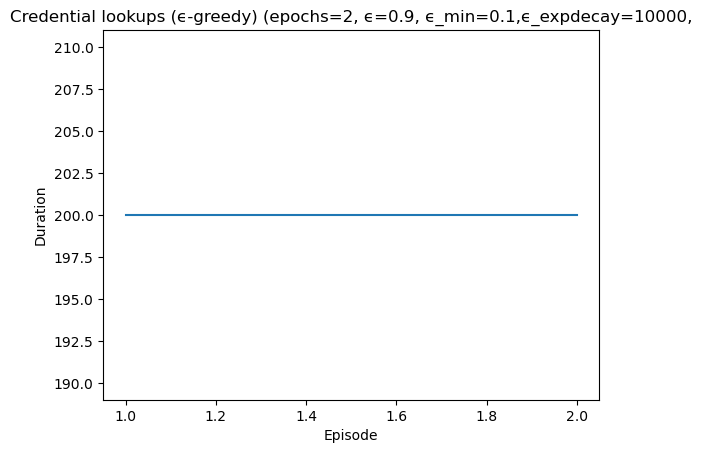

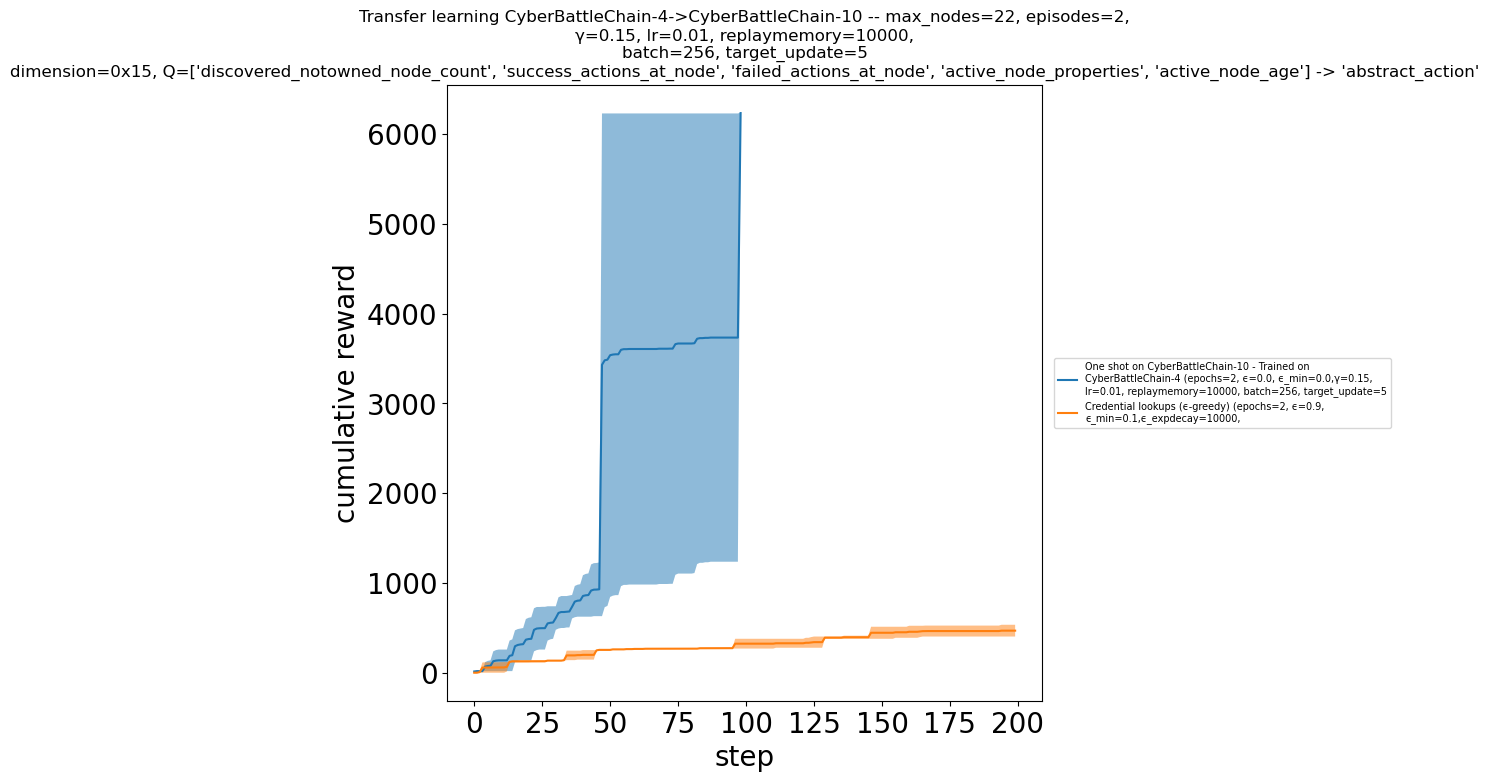

In [17]:
learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=best_dqn_learning_run_10,
    eval_env=cyberbattlechain_20,
    eval_epsilon=0.0,  # alternate with exploration to help generalization to bigger network
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count,
    benchmark_policy=rca.CredentialCacheExploiter(),
    benchmark_training_args={"epsilon": 0.90, "epsilon_exponential_decay": 10000, "epsilon_minimum": 0.10, "title": "Credential lookups (ϵ-greedy)"},
)
learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=best_dqn_4,
    eval_env=cyberbattlechain_10,
    eval_epsilon=0.0,  # exploit Q-matrix only
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count,
    benchmark_policy=rca.CredentialCacheExploiter(),
    benchmark_training_args={"epsilon": 0.90, "epsilon_exponential_decay": 10000, "epsilon_minimum": 0.10, "title": "Credential lookups (ϵ-greedy)"},
)

###### One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4
Learning with: episode_count=2,iteration_count=200,ϵ=0.0,ϵ_min=0.0, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5
  ## Episode: 1/2 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||


Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:02||


Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:02||


Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:05||


Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:05||


Episode 1|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:07||


Episode 1|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:07||


Episode 1|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:08||


Episode 1|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:08||


Episode 1|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:10||


Episode 1|Iteration 6|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:10||


Episode 1|Iteration 7|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:11||


Episode 1|Iteration 7|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:11||


Episode 1|Iteration 8|reward:  362.0|last_reward_at:    7|Elapsed Time: 0:00:13||


Episode 1|Iteration 8|reward:  362.0|last_reward_at:    8|Elapsed Time: 0:00:13||


Episode 1|Iteration 9|reward:  368.0|last_reward_at:    8|Elapsed Time: 0:00:14||


Episode 1|Iteration 9|reward:  368.0|last_reward_at:    9|Elapsed Time: 0:00:14||


Episode 1|Iteration 10|reward:  468.0|last_reward_at:    9|Elapsed Time: 0:00:16||


Episode 1|Iteration 10|reward:  468.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 1|Iteration 11|reward:  482.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 1|Iteration 11|reward:  482.0|last_reward_at:   11|Elapsed Time: 0:00:19||


Episode 1|Iteration 12|reward:  582.0|last_reward_at:   11|Elapsed Time: 0:00:21||


Episode 1|Iteration 12|reward:  582.0|last_reward_at:   12|Elapsed Time: 0:00:21||


Episode 1|Iteration 13|reward:  584.0|last_reward_at:   12|Elapsed Time: 0:00:24||


Episode 1|Iteration 13|reward:  584.0|last_reward_at:   13|Elapsed Time: 0:00:24||


Episode 1|Iteration 14|reward:  598.0|last_reward_at:   13|Elapsed Time: 0:00:25||


Episode 1|Iteration 14|reward:  598.0|last_reward_at:   14|Elapsed Time: 0:00:25||


Episode 1|Iteration 15|reward:  698.0|last_reward_at:   14|Elapsed Time: 0:00:27||


Episode 1|Iteration 15|reward:  698.0|last_reward_at:   15|Elapsed Time: 0:00:27||


Episode 1|Iteration 16|reward:  712.0|last_reward_at:   15|Elapsed Time: 0:00:29||


Episode 1|Iteration 16|reward:  712.0|last_reward_at:   16|Elapsed Time: 0:00:29||


Episode 1|Iteration 17|reward:  812.0|last_reward_at:   16|Elapsed Time: 0:00:30||


Episode 1|Iteration 17|reward:  812.0|last_reward_at:   17|Elapsed Time: 0:00:30||


Episode 1|Iteration 18|reward:  826.0|last_reward_at:   17|Elapsed Time: 0:00:33||


Episode 1|Iteration 18|reward:  826.0|last_reward_at:   18|Elapsed Time: 0:00:33||


Episode 1|Iteration 19|reward:  832.0|last_reward_at:   18|Elapsed Time: 0:00:35||


Episode 1|Iteration 19|reward:  832.0|last_reward_at:   19|Elapsed Time: 0:00:35||


Episode 1|Iteration 20|reward:  932.0|last_reward_at:   19|Elapsed Time: 0:00:36||


Episode 1|Iteration 20|reward:  932.0|last_reward_at:   20|Elapsed Time: 0:00:36||


Episode 1|Iteration 21|reward:  946.0|last_reward_at:   20|Elapsed Time: 0:00:38||


Episode 1|Iteration 21|reward:  946.0|last_reward_at:   21|Elapsed Time: 0:00:38||


Episode 1|Iteration 22|reward: 1046.0|last_reward_at:   21|Elapsed Time: 0:00:40||


Episode 1|Iteration 22|reward: 1046.0|last_reward_at:   22|Elapsed Time: 0:00:40||


Episode 1|Iteration 23|reward: 1060.0|last_reward_at:   22|Elapsed Time: 0:00:41||


Episode 1|Iteration 23|reward: 1060.0|last_reward_at:   23|Elapsed Time: 0:00:41||


Episode 1|Iteration 24|reward: 1160.0|last_reward_at:   23|Elapsed Time: 0:00:43||


Episode 1|Iteration 24|reward: 1160.0|last_reward_at:   24|Elapsed Time: 0:00:43||


Episode 1|Iteration 25|reward: 1174.0|last_reward_at:   24|Elapsed Time: 0:00:45||


Episode 1|Iteration 25|reward: 1174.0|last_reward_at:   25|Elapsed Time: 0:00:45||


Episode 1|Iteration 26|reward: 1274.0|last_reward_at:   25|Elapsed Time: 0:00:46||


Episode 1|Iteration 26|reward: 1274.0|last_reward_at:   26|Elapsed Time: 0:00:46||


Episode 1|Iteration 27|reward: 1288.0|last_reward_at:   26|Elapsed Time: 0:00:48||


Episode 1|Iteration 27|reward: 1288.0|last_reward_at:   27|Elapsed Time: 0:00:48||


Episode 1|Iteration 28|reward: 1388.0|last_reward_at:   27|Elapsed Time: 0:00:50||


Episode 1|Iteration 28|reward: 1388.0|last_reward_at:   28|Elapsed Time: 0:00:50||


Episode 1|Iteration 29|reward: 1402.0|last_reward_at:   28|Elapsed Time: 0:00:52||


Episode 1|Iteration 29|reward: 1402.0|last_reward_at:   29|Elapsed Time: 0:00:52||


Episode 1|Iteration 30|reward: 1502.0|last_reward_at:   29|Elapsed Time: 0:00:53||


Episode 1|Iteration 30|reward: 1502.0|last_reward_at:   30|Elapsed Time: 0:00:53||


Episode 1|Iteration 31|reward: 1504.0|last_reward_at:   30|Elapsed Time: 0:00:54||


Episode 1|Iteration 31|reward: 1504.0|last_reward_at:   31|Elapsed Time: 0:00:54||


Episode 1|Iteration 32|reward: 1518.0|last_reward_at:   31|Elapsed Time: 0:00:56||


Episode 1|Iteration 32|reward: 1518.0|last_reward_at:   32|Elapsed Time: 0:00:56||


Episode 1|Iteration 33|reward: 1618.0|last_reward_at:   32|Elapsed Time: 0:00:58||


Episode 1|Iteration 33|reward: 1618.0|last_reward_at:   33|Elapsed Time: 0:00:58||


Episode 1|Iteration 34|reward: 1632.0|last_reward_at:   33|Elapsed Time: 0:01:00||


Episode 1|Iteration 34|reward: 1632.0|last_reward_at:   34|Elapsed Time: 0:01:00||


Episode 1|Iteration 35|reward: 1732.0|last_reward_at:   34|Elapsed Time: 0:01:01||


Episode 1|Iteration 35|reward: 1732.0|last_reward_at:   35|Elapsed Time: 0:01:01||


Episode 1|Iteration 36|reward: 1746.0|last_reward_at:   35|Elapsed Time: 0:01:03||


Episode 1|Iteration 36|reward: 1746.0|last_reward_at:   36|Elapsed Time: 0:01:03||


Episode 1|Iteration 37|reward: 1846.0|last_reward_at:   36|Elapsed Time: 0:01:05||


Episode 1|Iteration 37|reward: 1846.0|last_reward_at:   37|Elapsed Time: 0:01:05||


Episode 1|Iteration 38|reward: 1860.0|last_reward_at:   37|Elapsed Time: 0:01:08||


Episode 1|Iteration 38|reward: 1860.0|last_reward_at:   38|Elapsed Time: 0:01:08||


Episode 1|Iteration 39|reward: 1960.0|last_reward_at:   38|Elapsed Time: 0:01:10||


Episode 1|Iteration 39|reward: 1960.0|last_reward_at:   39|Elapsed Time: 0:01:10||


Episode 1|Iteration 40|reward: 1974.0|last_reward_at:   39|Elapsed Time: 0:01:12||


Episode 1|Iteration 40|reward: 1974.0|last_reward_at:   40|Elapsed Time: 0:01:12||


Episode 1|Iteration 41|reward: 2074.0|last_reward_at:   40|Elapsed Time: 0:01:13||


Episode 1|Iteration 41|reward: 2074.0|last_reward_at:   41|Elapsed Time: 0:01:13||


Episode 1|Iteration 42|reward: 2088.0|last_reward_at:   41|Elapsed Time: 0:01:15||


Episode 1|Iteration 42|reward: 2088.0|last_reward_at:   42|Elapsed Time: 0:01:15||


Episode 1|Iteration 43|reward: 2188.0|last_reward_at:   42|Elapsed Time: 0:01:16||


Episode 1|Iteration 43|reward: 2188.0|last_reward_at:   43|Elapsed Time: 0:01:16||


Episode 1|Iteration 44|reward: 2202.0|last_reward_at:   43|Elapsed Time: 0:01:18||


Episode 1|Iteration 44|reward: 2202.0|last_reward_at:   44|Elapsed Time: 0:01:18||


Episode 1|Iteration 45|reward: 2302.0|last_reward_at:   44|Elapsed Time: 0:01:19||


Episode 1|Iteration 45|reward: 2302.0|last_reward_at:   45|Elapsed Time: 0:01:19||


Episode 1|Iteration 46|reward: 2313.0|last_reward_at:   45|Elapsed Time: 0:01:23||


Episode 1|Iteration 46|reward: 2313.0|last_reward_at:   46|Elapsed Time: 0:01:23||


Episode 1|Iteration 47|reward: 2319.0|last_reward_at:   46|Elapsed Time: 0:01:29||


Episode 1|Iteration 47|reward: 2319.0|last_reward_at:   47|Elapsed Time: 0:01:29||


Episode 1|Iteration 48|reward: 2325.0|last_reward_at:   47|Elapsed Time: 0:01:32||


Episode 1|Iteration 48|reward: 2325.0|last_reward_at:   48|Elapsed Time: 0:01:32||


Episode 1|Iteration 49|reward: 2331.0|last_reward_at:   48|Elapsed Time: 0:01:34||


Episode 1|Iteration 49|reward: 2331.0|last_reward_at:   49|Elapsed Time: 0:01:34||


Episode 1|Iteration 50|reward: 2337.0|last_reward_at:   49|Elapsed Time: 0:01:37||


Episode 1|Iteration 50|reward: 2337.0|last_reward_at:   50|Elapsed Time: 0:01:37||


Episode 1|Iteration 51|reward: 2343.0|last_reward_at:   50|Elapsed Time: 0:01:40||


Episode 1|Iteration 51|reward: 2343.0|last_reward_at:   51|Elapsed Time: 0:01:40||


Episode 1|Iteration 52|reward: 2349.0|last_reward_at:   51|Elapsed Time: 0:01:43||


Episode 1|Iteration 52|reward: 2349.0|last_reward_at:   52|Elapsed Time: 0:01:43||


Episode 1|Iteration 53|reward: 2351.0|last_reward_at:   52|Elapsed Time: 0:01:45||


Episode 1|Iteration 53|reward: 2351.0|last_reward_at:   53|Elapsed Time: 0:01:45||


Episode 1|Iteration 54|reward: 2357.0|last_reward_at:   53|Elapsed Time: 0:01:52||


Episode 1|Iteration 54|reward: 2357.0|last_reward_at:   54|Elapsed Time: 0:01:52||


Episode 1|Iteration 55|reward: 2357.0|last_reward_at:   54|Elapsed Time: 0:01:55||


Episode 1|Iteration 56|reward: 2357.0|last_reward_at:   54|Elapsed Time: 0:01:57||


Episode 1|Iteration 57|reward: 2357.0|last_reward_at:   54|Elapsed Time: 0:02:00||


Episode 1|Iteration 58|reward: 2357.0|last_reward_at:   54|Elapsed Time: 0:02:03||


Episode 1|Iteration 59|reward: 2363.0|last_reward_at:   54|Elapsed Time: 0:02:07||


Episode 1|Iteration 59|reward: 2363.0|last_reward_at:   59|Elapsed Time: 0:02:07||


Episode 1|Iteration 60|reward: 2363.0|last_reward_at:   59|Elapsed Time: 0:02:10||


Episode 1|Iteration 61|reward: 2369.0|last_reward_at:   59|Elapsed Time: 0:02:13||


Episode 1|Iteration 61|reward: 2369.0|last_reward_at:   61|Elapsed Time: 0:02:14||


Episode 1|Iteration 62|reward: 2369.0|last_reward_at:   61|Elapsed Time: 0:02:17||


Episode 1|Iteration 63|reward: 2378.0|last_reward_at:   61|Elapsed Time: 0:02:19||


Episode 1|Iteration 63|reward: 2378.0|last_reward_at:   63|Elapsed Time: 0:02:19||


Episode 1|Iteration 64|reward: 7378.0|last_reward_at:   63|Elapsed Time: 0:02:20||


Episode 1|Iteration 64|reward: 7378.0|last_reward_at:   64|Elapsed Time: 0:02:20||

  Episode 1 ended at t=64 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 29/1 (0.97)
    exploit-remote: 8/5 (0.62)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 2/2 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||


Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:03||


Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:03||


Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:04||


Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:04||


Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:05||


Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:05||


Episode 2|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:07||


Episode 2|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:07||


Episode 2|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:09||


Episode 2|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:09||


Episode 2|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:10||


Episode 2|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:10||


Episode 2|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:12||


Episode 2|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:12||


Episode 2|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:13||


Episode 2|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:13||


Episode 2|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:15||


Episode 2|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 2|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 2|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:16||


Episode 2|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:18||


Episode 2|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:18||


Episode 2|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:20||


Episode 2|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:20||


Episode 2|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:21||


Episode 2|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:21||


Episode 2|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:23||


Episode 2|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:23||


Episode 2|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:25||


Episode 2|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:25||


Episode 2|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:26||


Episode 2|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:26||


Episode 2|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:28||


Episode 2|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:28||


Episode 2|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:30||


Episode 2|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:30||


Episode 2|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:31||


Episode 2|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:31||


Episode 2|Iteration 21|reward: 1146.0|last_reward_at:   20|Elapsed Time: 0:00:33||


Episode 2|Iteration 21|reward: 1146.0|last_reward_at:   21|Elapsed Time: 0:00:33||


Episode 2|Iteration 22|reward: 1152.0|last_reward_at:   21|Elapsed Time: 0:00:35||


Episode 2|Iteration 22|reward: 1152.0|last_reward_at:   22|Elapsed Time: 0:00:35||


Episode 2|Iteration 23|reward: 1166.0|last_reward_at:   22|Elapsed Time: 0:00:36||


Episode 2|Iteration 23|reward: 1166.0|last_reward_at:   23|Elapsed Time: 0:00:36||


Episode 2|Iteration 24|reward: 1266.0|last_reward_at:   23|Elapsed Time: 0:00:38||


Episode 2|Iteration 24|reward: 1266.0|last_reward_at:   24|Elapsed Time: 0:00:38||


Episode 2|Iteration 25|reward: 1280.0|last_reward_at:   24|Elapsed Time: 0:00:40||


Episode 2|Iteration 25|reward: 1280.0|last_reward_at:   25|Elapsed Time: 0:00:40||


Episode 2|Iteration 26|reward: 1380.0|last_reward_at:   25|Elapsed Time: 0:00:41||


Episode 2|Iteration 26|reward: 1380.0|last_reward_at:   26|Elapsed Time: 0:00:41||


Episode 2|Iteration 27|reward: 1394.0|last_reward_at:   26|Elapsed Time: 0:00:43||


Episode 2|Iteration 27|reward: 1394.0|last_reward_at:   27|Elapsed Time: 0:00:43||


Episode 2|Iteration 28|reward: 1494.0|last_reward_at:   27|Elapsed Time: 0:00:45||


Episode 2|Iteration 28|reward: 1494.0|last_reward_at:   28|Elapsed Time: 0:00:45||


Episode 2|Iteration 29|reward: 1508.0|last_reward_at:   28|Elapsed Time: 0:00:47||


Episode 2|Iteration 29|reward: 1508.0|last_reward_at:   29|Elapsed Time: 0:00:47||


Episode 2|Iteration 30|reward: 1608.0|last_reward_at:   29|Elapsed Time: 0:00:48||


Episode 2|Iteration 30|reward: 1608.0|last_reward_at:   30|Elapsed Time: 0:00:48||


Episode 2|Iteration 31|reward: 1622.0|last_reward_at:   30|Elapsed Time: 0:00:50||


Episode 2|Iteration 31|reward: 1622.0|last_reward_at:   31|Elapsed Time: 0:00:50||


Episode 2|Iteration 32|reward: 1722.0|last_reward_at:   31|Elapsed Time: 0:00:52||


Episode 2|Iteration 32|reward: 1722.0|last_reward_at:   32|Elapsed Time: 0:00:52||


Episode 2|Iteration 33|reward: 1728.0|last_reward_at:   32|Elapsed Time: 0:00:54||


Episode 2|Iteration 33|reward: 1728.0|last_reward_at:   33|Elapsed Time: 0:00:55||


Episode 2|Iteration 34|reward: 1742.0|last_reward_at:   33|Elapsed Time: 0:00:58||


Episode 2|Iteration 34|reward: 1742.0|last_reward_at:   34|Elapsed Time: 0:00:58||


Episode 2|Iteration 35|reward: 1842.0|last_reward_at:   34|Elapsed Time: 0:01:00||


Episode 2|Iteration 35|reward: 1842.0|last_reward_at:   35|Elapsed Time: 0:01:00||


Episode 2|Iteration 36|reward: 1856.0|last_reward_at:   35|Elapsed Time: 0:01:01||


Episode 2|Iteration 36|reward: 1856.0|last_reward_at:   36|Elapsed Time: 0:01:01||


Episode 2|Iteration 37|reward: 1956.0|last_reward_at:   36|Elapsed Time: 0:01:03||


Episode 2|Iteration 37|reward: 1956.0|last_reward_at:   37|Elapsed Time: 0:01:03||


Episode 2|Iteration 38|reward: 1970.0|last_reward_at:   37|Elapsed Time: 0:01:05||


Episode 2|Iteration 38|reward: 1970.0|last_reward_at:   38|Elapsed Time: 0:01:05||


Episode 2|Iteration 39|reward: 2070.0|last_reward_at:   38|Elapsed Time: 0:01:07||


Episode 2|Iteration 39|reward: 2070.0|last_reward_at:   39|Elapsed Time: 0:01:07||


Episode 2|Iteration 40|reward: 2084.0|last_reward_at:   39|Elapsed Time: 0:01:08||


Episode 2|Iteration 40|reward: 2084.0|last_reward_at:   40|Elapsed Time: 0:01:08||


Episode 2|Iteration 41|reward: 2184.0|last_reward_at:   40|Elapsed Time: 0:01:10||


Episode 2|Iteration 41|reward: 2184.0|last_reward_at:   41|Elapsed Time: 0:01:10||


Episode 2|Iteration 42|reward: 2198.0|last_reward_at:   41|Elapsed Time: 0:01:12||


Episode 2|Iteration 42|reward: 2198.0|last_reward_at:   42|Elapsed Time: 0:01:12||


Episode 2|Iteration 43|reward: 2298.0|last_reward_at:   42|Elapsed Time: 0:01:14||


Episode 2|Iteration 43|reward: 2298.0|last_reward_at:   43|Elapsed Time: 0:01:14||


Episode 2|Iteration 44|reward: 2298.0|last_reward_at:   43|Elapsed Time: 0:01:17||


Episode 2|Iteration 45|reward: 2312.0|last_reward_at:   43|Elapsed Time: 0:01:18||


Episode 2|Iteration 45|reward: 2312.0|last_reward_at:   45|Elapsed Time: 0:01:18||


Episode 2|Iteration 46|reward: 7312.0|last_reward_at:   45|Elapsed Time: 0:01:20||


Episode 2|Iteration 46|reward: 7312.0|last_reward_at:   46|Elapsed Time: 0:01:20||

  Episode 2 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 24/1 (0.96)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


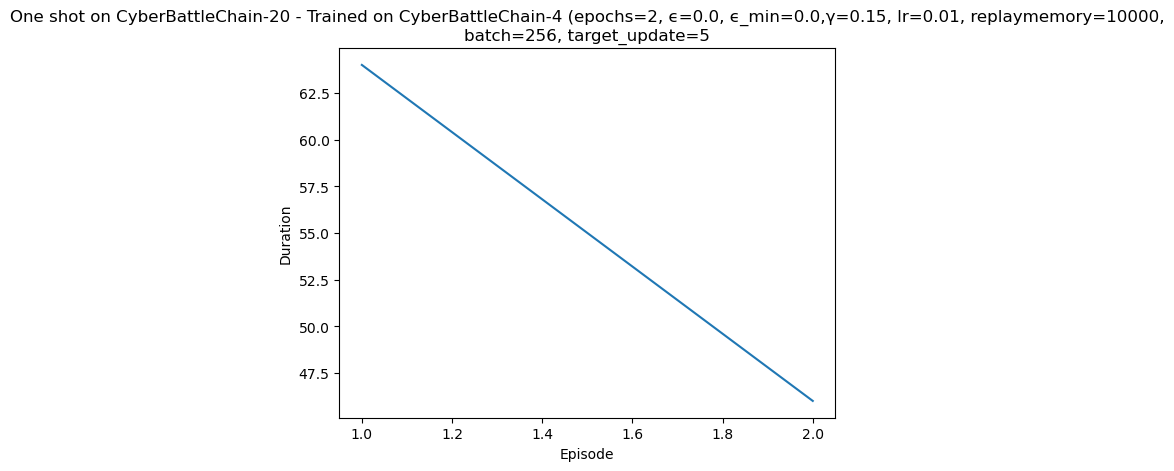

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=2,iteration_count=200,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/2 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 



Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 8|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 8|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 1|Iteration 9|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 1|Iteration 9|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 1|Iteration 11|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 1|Iteration 11|reward:   20.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 1|Iteration 43|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 1|Iteration 43|reward:  120.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 1|Iteration 52|reward:  131.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 1|Iteration 52|reward:  131.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 1|Iteration 55|reward:  137.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 1|Iteration 55|reward:  137.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 1|Iteration 66|reward:  145.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 1|Iteration 66|reward:  145.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 1|Iteration 68|reward:  154.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 1|Iteration 68|reward:  154.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 1|Iteration 71|reward:  254.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 1|Iteration 71|reward:  254.0|last_reward_at:   71|Elapsed Time: 0:00:00||


Episode 1|Iteration 78|reward:  268.0|last_reward_at:   71|Elapsed Time: 0:00:00||


Episode 1|Iteration 78|reward:  268.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 1|Iteration 79|reward:  272.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 1|Iteration 79|reward:  272.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 1|Iteration 86|reward:  274.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 1|Iteration 86|reward:  274.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 1|Iteration 119|reward:  374.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 1|Iteration 119|reward:  374.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 1|Iteration 132|reward:  388.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 1|Iteration 132|reward:  388.0|last_reward_at:  132|Elapsed Time: 0:00:00||


Episode 1|Iteration 133|reward:  488.0|last_reward_at:  132|Elapsed Time: 0:00:00||


Episode 1|Iteration 133|reward:  488.0|last_reward_at:  133|Elapsed Time: 0:00:00||


Episode 1|Iteration 140|reward:  502.0|last_reward_at:  133|Elapsed Time: 0:00:00||


Episode 1|Iteration 140|reward:  502.0|last_reward_at:  140|Elapsed Time: 0:00:00||


Episode 1|Iteration 151|reward:  602.0|last_reward_at:  140|Elapsed Time: 0:00:00||


Episode 1|Iteration 151|reward:  602.0|last_reward_at:  151|Elapsed Time: 0:00:00||


Episode 1|Iteration 153|reward:  604.0|last_reward_at:  151|Elapsed Time: 0:00:00||


Episode 1|Iteration 153|reward:  604.0|last_reward_at:  153|Elapsed Time: 0:00:00||


Episode 1|Iteration 155|reward:  610.0|last_reward_at:  153|Elapsed Time: 0:00:00||


Episode 1|Iteration 155|reward:  610.0|last_reward_at:  155|Elapsed Time: 0:00:00||


Episode 1|Iteration 156|reward:  616.0|last_reward_at:  155|Elapsed Time: 0:00:00||


Episode 1|Iteration 156|reward:  616.0|last_reward_at:  156|Elapsed Time: 0:00:00||


Episode 1|Iteration 159|reward:  622.0|last_reward_at:  156|Elapsed Time: 0:00:00||


Episode 1|Iteration 159|reward:  622.0|last_reward_at:  159|Elapsed Time: 0:00:00||


Episode 1|Iteration 164|reward:  628.0|last_reward_at:  159|Elapsed Time: 0:00:00||


Episode 1|Iteration 164|reward:  628.0|last_reward_at:  164|Elapsed Time: 0:00:00||


Episode 1|Iteration 165|reward:  642.0|last_reward_at:  164|Elapsed Time: 0:00:00||


Episode 1|Iteration 165|reward:  642.0|last_reward_at:  165|Elapsed Time: 0:00:00||


Episode 1|Iteration 172|reward:  648.0|last_reward_at:  165|Elapsed Time: 0:00:00||


Episode 1|Iteration 172|reward:  648.0|last_reward_at:  172|Elapsed Time: 0:00:00||


Episode 1|Iteration 176|reward:  654.0|last_reward_at:  172|Elapsed Time: 0:00:00||


Episode 1|Iteration 176|reward:  654.0|last_reward_at:  176|Elapsed Time: 0:00:00||


Episode 1|Iteration 179|reward:  660.0|last_reward_at:  176|Elapsed Time: 0:00:00||


Episode 1|Iteration 179|reward:  660.0|last_reward_at:  179|Elapsed Time: 0:00:00||


Episode 1|Iteration 182|reward:  662.0|last_reward_at:  179|Elapsed Time: 0:00:00||


Episode 1|Iteration 182|reward:  662.0|last_reward_at:  182|Elapsed Time: 0:00:00||


Episode 1|Iteration 183|reward:  762.0|last_reward_at:  182|Elapsed Time: 0:00:00||


Episode 1|Iteration 183|reward:  762.0|last_reward_at:  183|Elapsed Time: 0:00:00||


Episode 1|Iteration 185|reward:  768.0|last_reward_at:  183|Elapsed Time: 0:00:00||


Episode 1|Iteration 185|reward:  768.0|last_reward_at:  185|Elapsed Time: 0:00:00||


Episode 1|Iteration 200|reward:  768.0|last_reward_at:  185|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/72 (0.13)
    explore-remote: 12/99 (0.11)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/0 (1.00)
  exploit deflected to exploration: 10
  ## Episode: 2/2 'Credential lookups (ϵ-greedy)' ϵ=0.8842, 



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 4|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 2|Iteration 7|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 2|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 2|Iteration 12|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 2|Iteration 12|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 2|Iteration 16|reward:  134.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 2|Iteration 16|reward:  134.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 2|Iteration 17|reward:  140.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 2|Iteration 17|reward:  140.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 2|Iteration 19|reward:  240.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 2|Iteration 19|reward:  240.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 2|Iteration 20|reward:  246.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 2|Iteration 20|reward:  246.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 2|Iteration 23|reward:  252.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 2|Iteration 23|reward:  252.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 2|Iteration 26|reward:  266.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 2|Iteration 26|reward:  266.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 2|Iteration 34|reward:  270.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 2|Iteration 34|reward:  270.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 2|Iteration 40|reward:  370.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 2|Iteration 40|reward:  370.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 2|Iteration 54|reward:  372.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 2|Iteration 54|reward:  372.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 2|Iteration 55|reward:  378.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 2|Iteration 55|reward:  378.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 2|Iteration 69|reward:  389.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 2|Iteration 69|reward:  389.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 2|Iteration 73|reward:  397.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 2|Iteration 73|reward:  397.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 2|Iteration 80|reward:  403.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 2|Iteration 80|reward:  403.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 2|Iteration 83|reward:  412.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 2|Iteration 83|reward:  412.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 2|Iteration 87|reward:  512.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 2|Iteration 87|reward:  512.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 2|Iteration 98|reward:  523.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 2|Iteration 98|reward:  523.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 2|Iteration 103|reward:  525.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 2|Iteration 103|reward:  525.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 2|Iteration 113|reward:  534.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 2|Iteration 113|reward:  534.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 2|Iteration 122|reward:  634.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 2|Iteration 122|reward:  634.0|last_reward_at:  122|Elapsed Time: 0:00:00||


Episode 2|Iteration 124|reward:  636.0|last_reward_at:  122|Elapsed Time: 0:00:00||


Episode 2|Iteration 124|reward:  636.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 2|Iteration 137|reward:  647.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 2|Iteration 137|reward:  647.0|last_reward_at:  137|Elapsed Time: 0:00:00||


Episode 2|Iteration 141|reward:  653.0|last_reward_at:  137|Elapsed Time: 0:00:00||


Episode 2|Iteration 141|reward:  653.0|last_reward_at:  141|Elapsed Time: 0:00:00||


Episode 2|Iteration 161|reward:  662.0|last_reward_at:  141|Elapsed Time: 0:00:00||


Episode 2|Iteration 161|reward:  662.0|last_reward_at:  161|Elapsed Time: 0:00:00||


Episode 2|Iteration 170|reward:  762.0|last_reward_at:  161|Elapsed Time: 0:00:00||


Episode 2|Iteration 170|reward:  762.0|last_reward_at:  170|Elapsed Time: 0:00:00||


Episode 2|Iteration 171|reward:  768.0|last_reward_at:  170|Elapsed Time: 0:00:00||


Episode 2|Iteration 171|reward:  768.0|last_reward_at:  171|Elapsed Time: 0:00:00||


Episode 2|Iteration 187|reward:  782.0|last_reward_at:  171|Elapsed Time: 0:00:00||


Episode 2|Iteration 187|reward:  782.0|last_reward_at:  187|Elapsed Time: 0:00:00||


Episode 2|Iteration 193|reward:  882.0|last_reward_at:  187|Elapsed Time: 0:00:00||


Episode 2|Iteration 193|reward:  882.0|last_reward_at:  193|Elapsed Time: 0:00:00||


Episode 2|Iteration 196|reward:  896.0|last_reward_at:  193|Elapsed Time: 0:00:00||


Episode 2|Iteration 196|reward:  896.0|last_reward_at:  196|Elapsed Time: 0:00:00||


Episode 2|Iteration 198|reward:  898.0|last_reward_at:  196|Elapsed Time: 0:00:00||


Episode 2|Iteration 198|reward:  898.0|last_reward_at:  198|Elapsed Time: 0:00:00||


Episode 2|Iteration 199|reward:  904.0|last_reward_at:  198|Elapsed Time: 0:00:00||


Episode 2|Iteration 199|reward:  904.0|last_reward_at:  199|Elapsed Time: 0:00:00||


Episode 2|Iteration 200|reward:  904.0|last_reward_at:  199|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/60 (0.18)
    explore-remote: 14/106 (0.12)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 7/0 (1.00)
  exploit deflected to exploration: 12
simulation ended


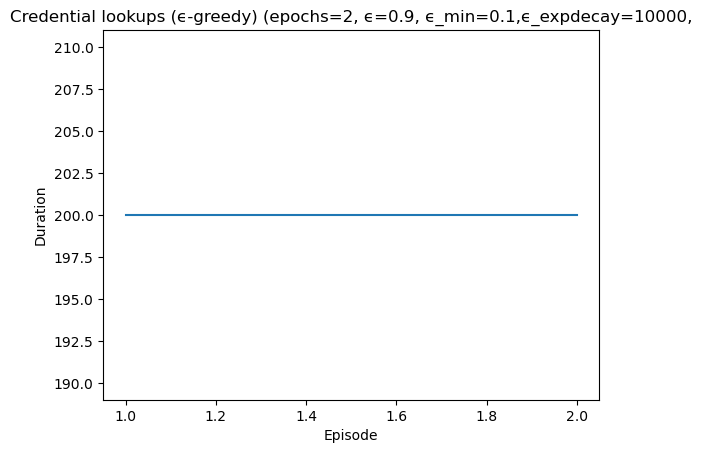

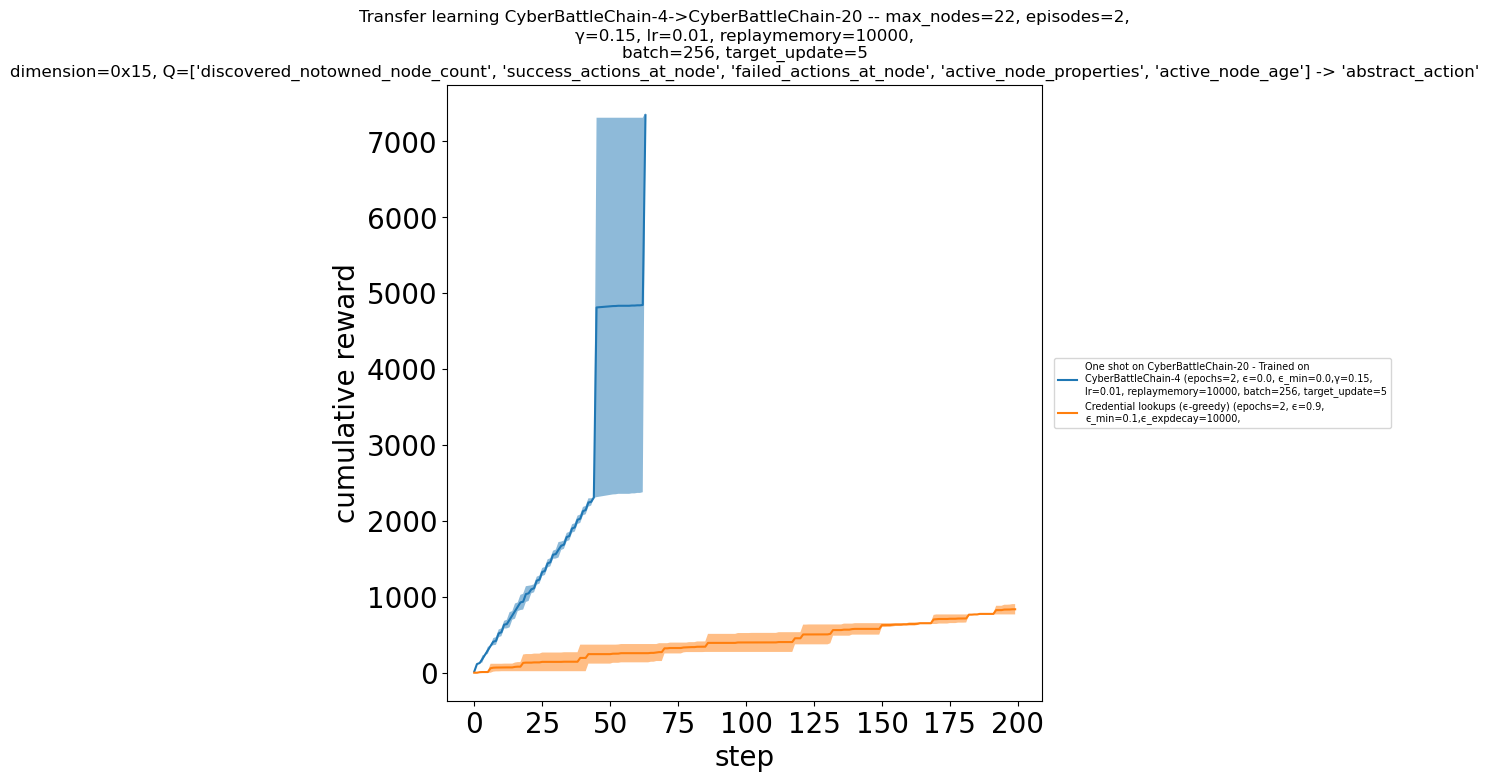

In [18]:
learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=best_dqn_4,
    eval_env=cyberbattlechain_20,
    eval_epsilon=0.0,  # exploit Q-matrix only
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count,
    benchmark_policy=rca.CredentialCacheExploiter(),
    benchmark_training_args={"epsilon": 0.90, "epsilon_exponential_decay": 10000, "epsilon_minimum": 0.10, "title": "Credential lookups (ϵ-greedy)"},
)